<a href="https://colab.research.google.com/github/Amany-alsayed/NLP_ITI/blob/main/Pytorch_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [ ]:
import torch
import numpy as np
import seaborn as sns
from torch import nn
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import mean_squared_error, mean_absolute_error
torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

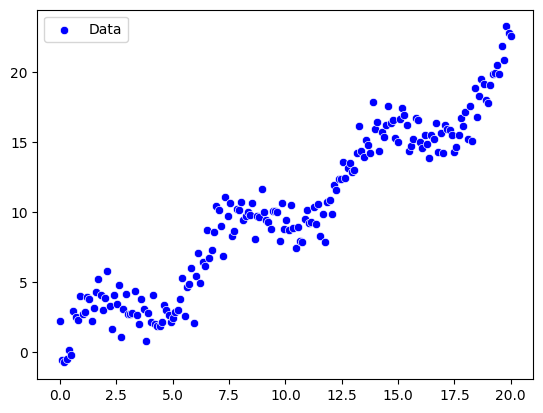

In [ ]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [ ]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [ ]:
df = Simple1DRegressionDataset(X,y)


In [ ]:
df[0]


(tensor([0.]), tensor([2.1993]))

In [ ]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [ ]:
data_point = next(iter(training_loader))
data_point


[tensor([[8.8442]]), tensor([[9.6808]])]

In [ ]:
class ComplexModel(nn.Module):
    def __init__(self,in_features,out_features):
        super(ComplexModel,self).__init__()
        self.l1 = nn.Linear(in_features,256)
        self.act1 = nn.ReLU()
        self.l2= nn.Linear(256,256)
        self.act2 = nn.ReLU()
        #self.drop=nn.Dropout(p=0.2)
        self.l3 = nn.Linear(256,out_features)

    def forward(self,x):
      x= self.l1(x)
      x = self.act1(x)
      x = self.l2(x)
      x = self.act2(x)
      #x = self.drop(x)
      x = self.l3(x)
      return x

In [ ]:
in_features = 1
out_features = 1
model_2 = ComplexModel(in_features,out_features)

In [ ]:
loss_fn = nn.MSELoss()

In [ ]:
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.1)

In [ ]:
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            print(running_loss)

In [ ]:
train_simple_network(model_2,loss_fn,training_loader,epochs=200)

Epochs:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

21.84193229675293
25.587771892547607
28.17898917198181
61.52164816856384
873.5225026607513
1092.882259130478
1161.2253758907318
1171.0574233531952
1172.8994314670563
1435.186723947525
1539.1888449192047
1544.8379428386688
1639.0910251140594
1853.6515414714813
1960.3074862957
3276.8525302410126
3286.903885602951
3294.1344916820526
3617.2748420238495
3631.7786481380463
3647.584622144699
3757.321980237961
3859.289341688156
3912.830082654953
3934.623425245285
3934.706626586616
3935.024813108146
3935.1835100725293
3941.7755792215466
3946.7925756052136
3947.6175174191594
3949.0352693274617
3950.6600592806935
3950.6991658881307
3957.258125372231
4075.4797821715474
4705.849105902016
4905.2393189147115
5002.80981452018
5020.557823248208
5101.849105902016
5606.134475775063
5904.040237493813
6039.846359319985
6298.487167425454
6313.259875364602
6315.682086534798
6390.982791490853
6393.634915180504
6622.882595844567
6754.695446796715
6884.584606952965
6981.003025837243
7483.66696626693
7506.271828

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.025767536833882332
110.39079591818154
110.71926614828408
112.85113784857094
191.74382278509438
192.8516242224723
388.030991287902
629.4583899695426
957.9561011511832
1000.1890189368278
1092.6879355628043
1146.8381163794547
1153.3752200324088
1212.1356036383659
1475.6629168707877
1690.937880249694
1742.3657786566764
1792.445074768737
1805.4435546118766
1805.4704130217433
1805.5325914509594
1856.0492960102856
2005.2101389057934
2214.5097147114575
2267.846018422395
2413.6410165913403
2458.5168634541333
2657.221148122102
2657.8941811807454
2804.0438393838704
2807.117677617818
2837.906022954732
2870.649370122701
2892.394584584981
2923.587566304952
2959.3338813073933
2965.8069571740925
3049.687221456319
3222.0940207727253
3343.6350669153035
3344.0768962092698
3527.2289500422776
3685.916297454387
3690.9989509768784
3875.6796608157456
3885.32792474702
3929.5146007724106
4074.412382144481
4101.342973727733
4121.431207675487
4491.186090487987
4663.661264438182
4832.047739047557
4840.5266380496

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

97.69139862060547
257.53759002685547
422.3055953979492
518.356201171875
535.3581066131592
696.3408794403076
815.9160976409912
838.8542537689209
855.290340423584
857.5150339603424
858.9360693693161
860.2290575504303
1062.870567560196
1064.3914587497711
1159.904627084732
1175.3610565662384
1257.0067932605743
1378.4200928211212
1561.7431976795197
1687.5523025989532
1689.0517897605896
1690.7962415218353
1751.3896596431732
1759.2292721271515
1766.6710412502289
1788.4160249233246
1789.8703570365906
1790.148963689804
1793.8236243724823
1905.583801984787
2022.5954673290253
2043.9812896251678
2170.177899122238
2176.314258337021
2194.3664090633392
2270.445205450058
2272.2689838409424
2418.422945022583
2435.740348815918
2447.3795824050903
2448.6419736146927
2455.6654039621353
2467.0285469293594
2473.2295147180557
2490.9381157159805
2517.709233880043
2529.772493004799
2611.2119232416153
2640.1953827142715
2693.6643768548965
2790.3903061151505
2814.060561776161
2912.509864449501
3010.021911263466
3

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

76.71324157714844
131.9967041015625
177.83445358276367
249.25683975219727
256.28414011001587
279.98763704299927
311.6099343299866
325.9488377571106
403.5799489021301
409.91388273239136
659.8267855644226
669.6775832176208
670.1504847109318
689.790438324213
704.791170746088
777.6912027895451
810.8380075991154
817.8467389643192
881.4799863398075
947.1963254511356
982.804628521204
1000.7929917871952
1076.7891923487186
1194.7503053247929
1249.6107064783573
1259.4314872324467
1260.2799522578716
1270.125484675169
1323.6843492686749
1436.462974756956
1496.6881181895733
1526.2979070842266
1543.5601236522198
1630.903576105833
1795.952861994505
1810.2497036159039
1957.1317836940289
2066.9945995509624
2068.2052204310894
2113.9006054103374
2360.181290835142
2381.3277675807476
2390.4301616847515
2393.9484355151653
2445.932390898466
2519.7042414844036
2530.366707533598
2542.6784856021404
2553.935410231352
2565.0982176959515
2701.8816344439983
2743.0205123126507
2803.4735495746136
2823.4715506732464
3

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

11.505888938903809
33.23489284515381
51.53090572357178
60.17514228820801
64.76371955871582
122.98735237121582
169.65772819519043
170.23447000980377
170.98241913318634
328.4021426439285
426.94650757312775
450.0395938158035
453.3077322244644
454.90555465221405
493.7381008863449
493.7443384206854
493.773078489583
494.69116263417527
494.7706030565314
499.315782900434
501.40709626255557
504.24783026752993
670.7044190126471
734.3777512270026
737.3268834310584
900.8214665609412
901.5658371406607
920.5395290809684
1024.1133434730582
1585.101319547277
1684.1756222206168
1686.5706615406089
1763.4529933887534
1894.1811428028159
1894.9943381506018
1895.7733424860053
1964.037945147138
1978.4299758630805
1981.4096175390296
1982.7907696920447
2008.5544854360633
2098.239223595243
2141.0118333059363
2169.3776742178015
2230.2878876882605
2438.9905701833777
2442.216735954862
2493.8577004629187
2495.896417255979
2508.71973478375
2525.1117712217383
2529.288953419309
2636.545011158567
2639.87136041699
2657.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

14.770748138427734
14.84951002895832
18.109755352139473
18.80993790924549
18.82177616469562
24.887470019981265
28.415378583595157
28.90870009176433
42.498383624479175
47.27755461446941
63.565081698819995
63.65781043283641
66.05799387209117
69.01560424081981
71.37535522691905
71.37987487344071
71.3960137697868
72.7861984106712
81.36900976626202
81.42150694830343
81.4309010845609
115.35168126644567
122.972483668942
125.62342742504552
138.27016929211095
169.84228423656896
194.10657218517736
371.5558977467008
499.39397147716954
520.2176180225797
520.5083750528283
523.8326810640283
568.9664930147119
702.9467634004541
760.2436460298486
774.7466205400415
919.7791217607446
994.2139209550805
998.6329273027368
1002.8472017091699
1013.2713369172998
1023.5595945161767
1055.3285154146142
1063.5553239625879
1067.4785145563073
1079.4068812173791
1138.2549914163537
1138.473515321035
1168.1399639141746
1168.4356951904483
1235.7582507324405
1243.0688610267825
1260.8120212745853
1273.2453632545657
1279.3

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

34.563331604003906
74.82579803466797
74.91747327893972
84.13008257001638
98.01667924970388
98.70151975005865
141.63449933379889
145.55694844573736
180.29975011199713
201.97074391692877
298.9362056478858
300.26066317409277
519.5351687893271
567.0974399074912
573.4319859966636
576.1394967064261
576.5045945569873
636.2919175550342
656.6119134351611
770.2620675489306
775.5101077482104
954.0015323087573
954.884048037231
969.8892531916499
984.4746385142207
989.3692064806819
1040.7296801134944
1084.4564142748713
1084.5341590121388
1098.6499674990773
1133.9712451174855
1191.8477824404836
1212.4996073916554
1213.5455759242177
1213.909520752728
1213.9210231816396
1214.327427974902
1217.4959510480985
1231.2657273923978
1234.82687460538
1235.4893792187795
1236.117421916686
1253.1446378743276
1258.003212264739
1307.2546618497
1348.1209223782644
1404.862285903655
1404.9278548872098
1446.2238258039579
1483.9174560224637
1485.1919003641233
1488.9661723291501
1498.3974486505613
1498.4383961586282
1500.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

35.58452606201172
40.824734687805176
110.24657154083252
111.42020463943481
149.486469745636
150.99508893489838
199.7285178899765
202.30989181995392
277.85431015491486
283.69208347797394
288.92663061618805
290.7411985397339
297.54942178726196
311.1554560661316
353.67777585983276
355.65728545188904
355.7169865258038
356.0242499001324
462.3173102028668
462.3212214312516
483.36780079221353
489.2280488810502
489.9960723123513
580.6298918924294
582.7085921964608
671.7469756803475
689.8589732847176
690.1405876479112
711.4956768355332
714.1890970072709
747.3837304911576
751.7340284190141
918.1460309824906
924.087362845894
925.0821644864045
941.4202782711945
941.5993237546645
941.713259359356
950.5747295818292
970.4829479656182
971.8957917890511
973.024649401661
980.2857554159127
983.2447970113717
986.9549420080148
1028.5400440893136
1052.5437786779366
1079.5583126745187
1080.1632672748528
1126.4345075092278
1133.4303080043755
1135.6687094173394
1136.9510203800164
1137.9128536782227
1138.092915

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.025497514754533768
37.551601488143206
38.067913848906755
38.362292159348726
39.333542574197054
40.94585036113858
46.178831089287996
64.68779181316495
72.12457178905606
122.58411310985684
126.32666300609708
126.46371744945645
127.33380894735456
132.20608096197248
132.28870960697532
169.85230823978782
170.11701127514243
173.59468051418662
180.44078465923667
180.69835897907615
204.67735525593162
227.55189939960837
301.6278271339834
303.8690695427358
318.5092587135732
336.9235062263906
377.43851324543357
409.68059393391013
411.6404513977468
414.2448420189321
414.2479857937433
415.20415396848693
418.00934763113037
420.9979743496515
432.5032128826715
436.11330385366455
437.11790580907837
456.50998230138794
457.03377856174484
471.1362470523454
471.24779818812385
493.02057765284553
506.5626852349378
506.7078713462688
550.0219430015422
554.4882716224529
554.5673898146488
562.6761392042972
711.4694894240238
748.1426919386722
891.5384591505863
907.5787900374271
909.1629414246418
944.74968764046

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.9440786838531494
10.696244955062866
22.067810773849487
23.293218851089478
24.9337819814682
28.487841963768005
36.02499234676361
41.060964941978455
44.48698890209198
44.60064124315977
45.58711742609739
92.50465893000364
93.68954109400511
109.6779844686389
132.25165580958128
134.19603013247252
136.2987370416522
150.22018670290709
169.0147023126483
197.9545159265399
244.1328148767352
244.82867573946714
253.46135567873716
360.8407883569598
362.2412874624133
367.41789554804564
387.1432220861316
391.13075398653746
391.31741520017385
394.97226639837027
406.794226847589
413.1503994092345
423.91392823308706
426.9661361798644
427.96674808114767
437.46572383493185
438.20746871083975
444.9619447812438
455.44982739537954
455.5594738572836
473.8981560319662
473.9721985757351
499.89282616972923
503.4317022264004
504.1045913398266
504.4711879193783
504.6307485550642
562.8692357987165
602.3951108902693
626.8037565201521
629.340228125453
641.492683455348
663.1450787037611
663.145481473417
663.81647408

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

17.21878433227539
18.314322352409363
42.02789580821991
42.61456823348999
42.61655548075214
54.284812240395695
54.36850947001949
54.87026136973873
56.69702380755916
138.92329639056697
139.34324982622638
145.3495788858272
152.97750142076984
166.31227543810382
166.95718929031864
180.35218784073368
188.50414725998417
202.92293426254764
204.9865297959186
209.04779383400455
209.45096945622936
246.73139929631725
253.7553026662208
275.67407059529796
278.0504257665016
281.68090772489086
293.17194318631664
300.8816833482124
306.1736631379463
317.0242605195381
331.1471853242256
332.9210276589729
353.03352880338207
372.2397608743049
403.20279264310375
441.44520139554515
449.1970014558174
449.387649922166
449.6588603244163
450.547214447055
482.3192748413421
482.33798374654725
487.4226437998004
605.6719418955036
641.2087956857868
645.696930069942
663.8785191965289
664.2777475905605
675.3421063018031
679.5274204802699
681.221110065002
682.0065601659007
811.3567493748851
813.686906893272
826.329877932

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

16.16025733947754
31.77101421356201
44.70796298980713
59.75287055969238
63.38884139060974
137.67726302146912
139.0542916059494
139.05752292717807
157.91915050591342
166.73874965752475
173.76242557610385
187.70334926689975
189.95771733368747
198.32443848694675
256.38015976990573
259.19140139664523
262.9101685627829
272.44449511612765
272.67748506809585
364.5298944308888
370.7022362544667
436.92168052936904
487.840797503246
502.8314400508534
504.60156663204543
514.0460027053487
517.3892224624287
573.5444043471944
575.562061388744
610.3081093623769
619.5629225566518
622.3832012012135
628.1419006183278
640.839266379131
650.4208436801564
669.6630826785695
671.0596490695607
671.0951652943622
689.2902584492695
698.8963118016254
701.7617595612537
708.6082656800281
708.7048810392153
714.3440068631899
719.1213181882631
726.7142971425783
730.3517557054292
730.3542849922087
732.9953439140227
734.6745175027754
734.9493958556559
735.2596333527472
741.9756453537848
751.4071848893072
771.7230361008551

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.9378812313079834
2.9678680896759033
14.373806238174438
14.399597892537713
14.73619613982737
16.37325177527964
16.374559699674137
39.2013629070716
39.39138895191718
41.62935882725287
60.81825500645209
110.89861541904975
111.64171612181235
124.07382690825034
125.09538519300986
125.24768321134616
125.66483275510836
127.91488997556735
128.15819366194773
140.21566112258006
142.49849732138682
154.70071537711192
159.9265912316041
164.44568617560435
167.83209045149852
173.96747405745555
196.09766013838816
196.18112686940003
221.3489487535553
222.97228161164094
223.01445725106169
223.01843751978595
235.994828358409
245.76246847223956
248.16611780237872
250.34012378763873
262.87973941874225
270.8703886420699
281.3837706000777
284.4350057990523
286.6184801013442
287.64229418348987
369.5765822083922
419.4416830689879
420.881218567607
426.5916291625472
429.6309915931197
432.35663594317157
471.2218207271071
476.1860498340102
487.1667503268691
491.77128399920184
599.3519343287917
599.9929741771193


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.073245048522949
7.674931287765503
9.368883967399597
11.127549409866333
20.008992433547974
22.233248710632324
22.86826002597809
76.49186384677887
85.25221598148346
85.27971862070262
86.81778691522777
91.49855540506542
92.82791851274669
96.80444691888988
98.77186284773052
102.12162481062114
102.33327485434711
103.85624088160694
106.24644674174488
114.86314882151783
121.00175012461841
145.93314279429615
157.35247720591724
168.95215810649097
169.65418524853885
171.32681174390018
200.1930932532996
201.04136980883777
201.4641991686076
201.75139115564525
203.39938948862255
203.40191129874438
215.34079412650317
218.56902269553393
236.13374284934253
237.79561917018145
238.24944634269923
297.8420328600332
305.48731798958033
309.8547248346731
312.8937680227682
336.37664003204554
346.98958463501185
422.70269651245326
424.00574595760554
424.14736118447036
512.4919504178688
513.8855476630852
514.4125406993553
515.4297280563042
517.1697236550972
561.9291726602241
569.4823915017769
588.9269067300484

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.365879058837891
12.439740180969238
87.20628070831299
92.46785306930542
93.21866357326508
94.44757008552551
101.71862483024597
104.18322134017944
105.8788150548935
114.70954740047455
128.49238526821136
130.6464501619339
130.897691488266
146.84188532829285
146.84699728060514
148.4000011878088
149.22348608542234
169.63348021078855
186.5905839400366
191.21833385992795
214.26598133612424
218.93312992621213
222.53008665610105
222.93479942250997
228.68934701848775
229.1134964125231
232.01966916490346
232.90739147830755
234.68835382629186
234.9480891721323
240.3019996182993
335.70106272865087
336.7297615306452
365.6199554698542
365.74152956623584
369.69235001225024
379.39039955753833
379.57540707010776
381.03783897776157
385.56849340815097
388.5598569335416
391.1903796615079
391.5299514653161
393.0933551909402
393.7204482080415
393.722255067667
394.1430330441799
395.3743734525051
396.6635451482143
397.9467768834438
399.31851042970084
401.7949429915752
407.0835172103252
407.1296455466654
409.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.02966046333313
4.656563878059387
7.935236096382141
8.004809759557247
10.218759201467037
10.5320088788867
13.223006956279278
22.54695200175047
25.010003797709942
28.227696172893047
35.618141405284405
41.35885643213987
42.29147558659315
42.99091934412718
45.39890455454588
54.24494718760252
56.10241436213255
59.357532016932964
141.89929532259703
141.89930661402104
144.11219032488225
195.44632728777287
198.07554944239018
199.44248481474278
203.3670496531522
205.74164958677648
243.11799617491124
243.14426016628204
246.7539072018808
246.75393897417962
249.06792074564873
251.51718026522576
252.66853374365746
252.78749494377553
253.17148397985875
259.8805284363407
283.4176683289188
287.1817829472202
287.42615021888196
287.44050022430747
296.3279924041781
297.88445433445304
298.18961867161124
298.4444733209166
298.4748214728388
305.115989590362
305.19378445513576
310.8618852890286
310.9700983635339
317.7080958954248
320.30990849651425
327.4845629803094
340.90721236385434
343.4207407108697
345

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.101052761077881
3.368628144264221
36.193052887916565
51.31001627445221
51.448051393032074
54.43449658155441
64.44340485334396
64.45176407136023
64.65692032314837
65.73937142826617
71.10790885426104
83.888034472242
91.20926965214312
91.8632724378258
97.35156036354601
101.69817710854113
110.35607982613146
111.63738502003253
114.31647981144488
114.41456150449812
152.69294285215437
164.86658501066267
166.25699352659285
167.24063062109053
174.9283866826445
178.86021351255476
179.9631365481764
180.52178507484496
183.88081293739378
184.7508043590933
195.54249232448637
195.8472569230944
195.8903885949403
195.89175563293975
196.01748052972835
196.68240300554316
199.88906399148982
199.95342055696528
226.77429572481196
236.81084433931392
238.6346356048016
242.98982206720393
248.9041177405743
256.1348292006878
256.7141413463978
257.08511204260867
257.44833893317264
260.8022632076172
262.6926547958283
264.15705604094546
264.2047616838245
267.0468010305194
267.23256818938535
272.15097276854794
285

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.6588687896728516
8.172024726867676
23.196645736694336
23.565693974494934
25.71081292629242
37.71544969081879
40.08078706264496
61.80964982509613
62.67299896478653
66.43117839097977
101.1295617222786
107.84535533189774
115.70141297578812
116.79527860879898
119.82055169343948
122.22872000932693
124.11333876848221
142.32588797807693
172.62069922685623
182.47440272569656
183.49653083086014
183.62103930860758
196.75741282850504
199.44546572118998
199.61633507162333
202.73683539777994
203.02754408866167
204.08339280635118
211.46968526393175
213.69581074267626
226.85421127825975
232.0868300870061
237.13115019351244
237.39503151923418
254.67338616400957
268.95178563147783
270.51481730490923
276.4812346175313
280.80827385932207
283.2956078723073
283.33500166609883
284.0978545732796
284.7208520360291
285.03275730088353
290.647290725261
294.76040317490697
294.9036607183516
297.8502008356154
298.95770973339677
301.0833241380751
302.44070679321885
303.7413949407637
307.11332220211625
311.31305212

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.876370906829834
2.2718443870544434
3.4922677278518677
3.5075593097135425
7.454339276067913
17.04732061456889
34.2856838805601
39.29116703104228
44.26806379389018
49.121415863744915
50.37361622881144
50.37365760514513
78.02366485306993
81.87515201279894
125.48264255234972
125.98703362653032
126.10942110279575
128.2891467497684
130.561963646207
142.54930171230808
150.636519996915
152.50971254566684
155.8186341212131
162.01240834454075
162.4038469181396
169.72230595210567
169.72488342854194
169.88287075492553
181.46768673392944
188.72999151679687
196.42614277335815
196.58911251160316
196.59782698913477
208.04606154724024
209.02619883581065
216.30669686361216
216.31546193710528
223.89808541885577
226.54057342163287
227.67005473724566
234.52526456466876
234.5450313722249
236.64897758117877
238.95944720855914
243.53221017471515
243.65081130317412
243.77801758400165
245.89887935272418
246.67080414644442
246.76457837573253
252.79550412646495
276.2839322423097
344.66144231311046
347.039332184

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.4089646339416504
4.258498907089233
5.917472958564758
34.082178235054016
35.393460392951965
35.400005851406604
38.61159900249913
38.85033527435735
44.28771749557927
46.16303924145177
46.43589008273557
55.4290093225427
55.95730990590528
59.62812608899549
60.1390404147096
69.85730404080823
72.78149551572278
76.81230110349134
103.41724533261731
107.38348812283948
117.22180885495618
157.37688774289563
158.75592297734693
159.59712297143415
205.91569215478376
206.04913114430383
206.37110363366082
207.3347372901626
215.5490937125869
215.5522357763257
228.62939470424317
228.83288150443695
234.600119167706
244.72872787131928
244.72918397493777
246.22000855513033
251.29481572218356
258.84582537718234
259.484726014809
274.7877884537738
275.092264089064
282.00590458817896
284.2766150564712
284.347233522014
284.6343631625932
284.66476059451816
285.76676035419223
287.6458530475211
299.9407882739615
303.29608560100314
303.2960861472684
306.02559478565036
307.84889157100497
307.8496195901689
308.0064

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.49510252475738525
2.905953288078308
4.148142337799072
5.104691922664642
6.782028377056122
7.2026881873607635
9.67769405245781
9.714372765272856
9.719395108520985
11.645056314766407
12.842303104698658
16.504888840019703
17.38719404488802
28.513058073818684
33.68200100213289
36.30933368951082
60.58485973626375
62.185938604176044
62.74162293225527
65.8521623685956
76.46753693372011
89.50551510602236
101.68301106244326
105.60705877095461
107.38347030431032
108.13664770871401
109.95589805394411
110.12302728742361
110.19304639846087
116.45888978987932
118.26005095988512
124.38708467036486
128.52562732249498
128.54210184514523
129.85830341279507
129.85843429273518
130.25102034515294
138.830043706359
140.22385481304082
144.03168943828496
151.1995504230872
151.4395455301419
157.6321476877347
157.91874613171967
160.2480298460141
163.47105826741608
163.87476088410767
164.15410219437035
164.8453327894822
166.66035108572396
168.97692613607796
169.76922367817315
170.032655465664
171.8092220903054


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.6784297227859497
1.6831030203029513
4.4686729265376925
10.71204202901572
11.006100530736148
23.49206435214728
34.916929121129215
35.66575890313834
43.515135581605136
47.01944452058524
59.17313676606864
62.02296047937125
63.18170791398734
64.24430542718619
64.24732155050151
64.91830480541103
64.97194835613482
69.56174156139605
70.51773813436739
77.40991666982882
78.66490390966646
81.82743552397005
86.01669171522371
86.44903469155543
98.54228591988795
98.54498576070182
106.35404871846549
106.67058907891624
106.67200790252537
108.33189807739109
114.47780071105808
115.00440578069538
130.08811931218952
142.0334880789742
163.9200847586617
163.98598334100097
165.07003840710968
165.07307120854966
193.9402606158983
195.07818683679216
196.6590027480852
206.919397798134
208.89482924039476
208.92764748702757
210.1545461572241
210.28362269769423
220.4561061419081
221.69255144963972
225.69237215886824
225.80840554158203
243.26481118123047
251.06237997929566
252.01915022055618
252.38422932545654
25

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.727136611938477
6.259650349617004
6.91799932718277
12.541640818119049
13.015128791332245
17.167644202709198
18.232250154018402
21.241818845272064
22.519719302654266
34.52322214841843
35.29318434000015
43.68731504678726
47.382135689258575
51.43274050951004
51.73229697346687
52.13711044192314
54.62853118777275
55.047968447208405
60.34953075647354
60.77626317739487
60.81953677535057
75.43253955245018
75.53081338852644
76.23085027188063
79.39686136692762
82.15040641278028
83.74207835644484
84.62493544071913
85.30232398957014
85.43617551773787
85.52990740537643
87.68596309423447
87.83559194207191
88.60588452219963
88.67868284136057
88.76324698328972
94.5859360396862
94.75103922188282
95.56148751080036
97.72618348896503
99.5936781913042
101.9596850425005
108.83845920860767
108.91217074543238
109.63671234995127
110.64744690805674
121.58760765939951
123.26350180059671
126.67001978307962
127.73024550825357
127.87973863631487
128.33955127745867
133.81345588713884
144.89849407225847
144.9532830

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.07835379242897034
1.143774539232254
5.945546656847
17.054055720567703
17.260780483484268
19.80012336373329
20.211884558200836
32.06785970926285
34.843949139118195
40.44520550966263
81.31865674257278
81.52719970047474
97.5561742335558
97.62883315235376
98.39670453220606
101.34709963947535
133.79521975666285
134.84725008159876
135.2880935743451
143.74688149243593
145.50899470597506
157.04969466477633
158.90159011632204
162.2083773687482
162.81189364939928
162.94689965993166
162.9942294433713
163.06330943852663
165.2627646997571
165.35483248531818
173.4695499688387
177.0318923741579
177.78720165789127
193.07707573473454
229.13806511461735
230.28644014894962
236.94848515093327
240.0153794437647
242.1305897384882
243.44968904554844
245.22179163992405
250.79048432409763
250.7941095957067
252.05193604319356
252.95586229651235
253.81752665131353
257.7807768115308
271.50782282440923
283.80204947083257
304.98453695862554
305.39396162121557
305.6020283976104
305.8993576148059
310.28231221227907

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.10731926560401917
0.950052410364151
1.5742307007312775
1.7018516063690186
9.215137243270874
12.167609691619873
22.068657398223877
27.605072021484375
30.092752695083618
35.54058766365051
35.63155682384968
35.684915982186794
38.69972487539053
38.746731135994196
38.81658177450299
50.48865704610944
54.75293831899762
62.116274405270815
94.15694670751691
94.23826854303479
102.23596065118909
102.39116287603974
102.42407880723476
105.50038300454617
106.31063298881054
107.89040379226208
114.21144442260265
117.20848540961742
118.84587661921978
120.3778096884489
124.47663323581219
124.88595663011074
126.26281724870205
135.5381649583578
142.90239129960537
148.76025472581387
149.5616493076086
167.5207328647375
189.42652700841427
189.4283844231395
191.55051028716844
191.89216846216004
195.31459659326356
195.3416236730991
195.94516290153842
196.03662517096382
197.8870128634153
197.9999803098617
199.40061030711513
201.05220506514888
204.92773101653438
205.31628809298854
205.31885186152067
206.212360

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.8762832283973694
5.027955114841461
6.584721028804779
7.113182783126831
35.17334055900574
35.182147153653204
44.27141393069178
44.68899477366358
47.06090010050684
47.084997800178826
47.086357267573476
48.99730673618615
51.77791086025536
51.94552858360112
52.815639631822705
54.616096870973706
82.07907141931355
85.19495405443013
98.11857809312642
104.38695825822651
104.59342467971146
105.45290231890976
106.11856568045914
111.21264898963273
111.2735594380647
123.38525758869946
126.27602540142834
127.26796220429242
127.52678774483502
130.31665991432965
146.4915656913072
154.7646779883653
154.82154141925275
155.37229167483747
155.63778378628194
160.69328238628805
165.92091967724264
171.06451298855245
171.30176883004606
172.99199741147459
173.87721454165876
174.9769579079002
175.43728028796613
175.89135419391096
176.66217332147062
192.13532548211515
192.31785084865987
195.8586242403835
195.85862425128857
199.3116450623695
214.63178399364392
216.30377414981763
219.07675174037854
220.05011043

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7074905037879944
0.7635526396334171
9.656316731125116
15.482089970260859
15.639653030782938
21.656179253011942
22.78502267971635
23.550694409757853
24.375786308199167
26.31096387282014
26.348038528114557
29.143128011375666
33.72926864400506
35.260366175323725
36.853125903755426
39.903764579445124
40.075459618121386
42.559810537844896
42.563911804929376
44.523854622617364
45.796551713719964
46.21915535070002
60.57246402837336
62.42103866674006
77.65621093846858
79.38578597642481
79.46359308250248
82.08518465049565
82.45568384416401
102.73941149003804
102.7520009232685
102.84255750756711
105.72781737428159
106.05336423497647
112.16353126149625
112.29671711008996
112.3103427188471
112.6013656752184
117.60256349015981
134.35034524369985
134.51967983413488
139.5864336984232
140.65064411330968
143.68758635688573
160.58702902961522
161.43656604457647
163.35091035533696
201.04894654918462
215.33206002879888
220.40984075237066
233.0345184104517
262.262866188772
272.9186040656641
277.605843235

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.3918063640594482
12.31009840965271
17.295228242874146
19.478341579437256
19.66958013176918
51.75832524895668
55.85278668999672
56.8505639731884
59.776670426130295
63.907641381025314
71.13706061244011
72.5763483941555
92.98861226439476
95.541718095541
105.49146899580956
109.62562426924706
109.71746070683002
113.57751329243183
113.68164952099323
116.28361828625202
116.50126571953297
116.56270169466734
118.3985290452838
122.57267140597105
128.8512091562152
155.6500544473529
160.54548739641905
164.6800460740924
165.100302092731
165.6916562244296
167.41165494173765
170.0265955850482
176.00155114382505
189.66054391115904
195.48701905459166
195.68355868011713
206.31098578125238
227.46080420166254
229.38187334686518
231.45388124138117
233.5050329938531
252.13339183479548
254.46726915985346
256.34589944034815
256.41573092341423
261.762461155653
262.6575135886669
269.66101214289665
272.99429818987846
273.3411442041397
273.53828889131546
274.78140491247177
275.6320797801018
277.60797494649887
2

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.9560823440551758
13.228965759277344
13.289418574422598
15.233318205922842
22.89693534001708
27.71126687154174
27.718102812301368
29.8270233864896
31.785951017867774
32.52088087750599
85.75894850445911
125.36411207867786
129.97091788006946
132.53074973775074
134.67888969136402
134.9945689435117
136.64524209452793
136.66912118857726
136.69046251056716
137.35648850677535
138.5020287442021
142.8844602513127
143.03016499755904
148.8749854969792
149.00527143059298
149.31150614796206
149.89682107744738
151.72364919958636
173.68111723242328
178.65459364233539
182.7700273352675
194.15983503637835
198.08885615644976
198.08915125852218
204.76696431165328
205.52307468181243
208.89890127902618
210.40406816726318
214.7643749070703
217.05523675208678
221.0709609342157
223.19327586417785
223.49740638857475
225.6752084744512
230.9705628407537
242.99326124315849
243.46655499463668
246.54968082433334
257.2236691666185
267.3444491577684
269.1517538977205
271.4115886641084
274.3752245855867
279.235911841

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

8.61246109008789
8.67570860683918
40.14710982143879
40.56238500773907
43.698751375079155
63.245496675372124
66.71326868236065
69.70942489802837
74.39699260890484
75.1849905103445
76.20326553285122
77.9096557945013
86.31010268628597
87.87624786794186
89.96289418637753
103.26364777982235
104.54762290418148
112.34430240094662
112.34467417284031
131.58679491563817
137.96078545137425
140.8379457621195
140.96422109290143
146.88789949103375
149.98755011244793
153.64914116545697
153.76683101340313
155.590282293997
161.29309734984417
162.9880456654646
165.3160087792494
166.78132078333874
167.82127628012677
175.9205509154417
176.2268729834177
183.49776846452733
184.81862515493413
187.8736128239252
187.90183657690068
188.4837763933756
188.5166828064539
201.89850825353642
215.35839480443974
216.5374448923685
216.54396183419158
216.66211671757628
216.7829849012487
221.05281465130975
221.43353613096406
222.24095012623002
222.3274470679753
223.28827894854476
223.89706690239836
224.20532412457396
224.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

21.57236099243164
37.974708557128906
38.95266419649124
39.73916608095169
44.767785370349884
46.44802564382553
53.14797776937485
54.825230181217194
61.02895790338516
82.17551285028458
93.54790169000626
94.39165598154068
94.72605213522911
95.56800106167793
97.88007858395576
100.23485401272774
107.71078470349312
149.88271310925484
150.86798295378685
168.012279599905
173.40599021315575
174.87554547190666
206.1880588233471
207.69025763869286
207.69051092327572
209.59033673466183
212.3263217753265
215.0346047228668
219.01777666271664
232.90574091137387
232.9119215591345
239.3108392341528
239.3275881020818
239.92432965920307
244.465911766747
245.08003016398288
249.75259467051364
250.16841115639545
250.33191107795574
250.35545974061824
250.41787537024356
251.78124566958286
256.9356026260648
258.9757661430631
259.1471657215152
259.1546641367022
259.28053922229446
260.17590791755356
267.29449970298447
270.13187033706345
272.62945468002
273.2960922198836
273.3874962332193
273.8714279534761
286.71

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.29131266474723816
10.65350005030632
12.855578392744064
14.257746070623398
15.358303636312485
21.00398501753807
21.050339553505182
22.856323692947626
23.4485578276217
26.78569457307458
26.870360244065523
39.302135337144136
39.88728861883283
41.55708198621869
41.592951349914074
45.38413744419813
45.91611056774855
50.90750031918287
51.02937254309654
52.81116220355034
54.89865991473198
64.26671048998833
64.56403815746307
64.64799162000418
67.17215939611197
71.67837782949209
90.19295569509268
90.63744252175093
91.11615397781134
94.68757750838995
105.28653361648321
119.18809916824102
128.87264277786016
131.53557493537664
132.51434745639563
132.57608388364315
133.7434644550085
137.50130747258663
143.79517935216427
151.33087919652462
152.57366035878658
152.64410001784563
160.54738170653582
161.80980939418077
163.4337971881032
164.41591257601976
182.78656954318285
183.94398993998766
198.35133666545153
204.1666366532445
206.4520677998662
206.4849780201912
208.34348517656326
209.41958743333817


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.07305070012807846
4.341414652764797
15.679070673882961
17.354209266602993
21.225182853639126
27.15254767984152
28.1900736913085
30.354264698922634
30.454309433698654
32.79890176653862
32.94344539940357
38.54524774849415
38.56868984550238
38.632207833230495
38.731192991137505
78.51354543864727
81.39565460383892
87.18976061046124
115.9701427668333
126.06068746745586
146.84522001445293
171.67340604960918
177.5809220522642
185.1808089464903
186.0129347294569
186.59262870252132
186.71753525733948
194.9727337360382
205.72042393684387
223.26893734931946
230.93517899513245
231.1839716732502
231.4867121577263
233.53803318738937
240.40495413541794
240.5063784942031
242.67746075242758
242.7047380078584
246.09889136441052
249.79622017033398
250.23092286475003
251.7110348213464
251.8791198451072
252.22192648239434
255.48340323753655
255.48781540291384
255.85983266728
259.3076490391977
259.75033580558375
261.2386712958105
261.8687910367735
262.2102321316488
262.79895746009424
265.1916912724264
271

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.3137667179107666
4.193228721618652
6.862881898880005
7.622283041477203
7.664559803903103
11.483065329492092
11.64763206988573
11.97256488353014
15.209579415619373
18.05846542865038
19.29660589247942
19.470543257892132
39.347370497882366
45.27026879042387
49.106793753802776
49.10680262990354
50.28646891065
53.60339610524534
63.095329927877174
64.16613964982389
65.17453997083066
70.86797611661314
72.07532648988126
82.03905825562833
83.70497207589506
98.73749713845609
124.04565792031644
126.22500209756254
146.6274488443887
147.42792080588697
148.68919359393476
150.18611322589277
151.12986646838544
151.68721418328641
166.74353151269315
166.84766466416477
166.919899019078
180.5122948015487
180.77750936396478
202.19574514277338
235.87574926264642
235.97642573215126
239.72204383708595
241.770807350651
243.5811102042353
255.31858655311225
255.41965283699392
256.94012011833547
271.5519784862554
276.7825392658269
284.9731005603826
286.0897551948583
290.21732057876943
297.319499629215
298.36098

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.170740008354187
1.3541859239339828
2.477584585547447
2.666941061615944
37.722422018647194
39.27748979628086
40.41693426668644
51.9272844940424
53.757644310593605
54.95945765078068
70.0581905990839
76.98117233812809
78.26743830740452
78.34240364283323
82.73577427119017
84.9631521627307
85.20823795348406
85.94786686450243
87.64666134864092
88.50052858144045
89.74215436726809
91.17512441426516
96.11544156819582
96.1171652112389
100.26895773748402
100.87875211576466
103.8015803132439
106.21173155645374
106.82932407001499
108.25797516445164
108.26089548121672
108.65245087991934
108.92563908349257
108.93188754364382
108.93524696433451
108.93598767271033
109.36819394578924
109.94190003623953
109.94414304563543
112.58065985509893
113.49651228258153
127.99277960130712
134.34618650743505
136.61508308717748
142.07777916261693
142.48831640550634
143.9662037975504
144.68842558929464
146.13774018356344
147.03214310476324
151.22229336568853
174.59584759542486
174.60683608049294
178.64347386354348
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.3283715844154358
27.699005663394928
28.77525442838669
28.878588050603867
28.88062730897218
29.410665010102093
39.04508445132524
57.16175124514848
61.15558907855302
63.17566368449479
67.39390537608415
93.05310222972184
105.47196171153337
106.0139409052208
107.43674585688859
108.4124360429123
108.68611443508416
109.87494671810418
128.64038861263543
135.23635638225824
143.43318522442132
152.7959476755932
154.26833785045892
154.31596853677183
154.9434755081311
155.84142377320677
155.94808328244835
160.11336076352745
160.47390788886696
164.28726404998451
164.46864144597203
165.17659245524555
165.94285844359547
166.06196425203234
169.43726513627917
169.95092926267534
170.11922020558268
170.17758801672608
170.50466242525727
170.75328245852143
197.01931753847748
197.31482482049614
198.1711441287771
209.1708017596975
211.03007090184838
211.69198960158974
212.05593642685562
215.1603420684114
217.92254385445267
217.9970628330484
218.48818606231362
225.43213623855263
238.93199414107949
245.56028

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.066185474395752
17.868730068206787
23.162899494171143
25.521803617477417
36.87474322319031
37.98644769191742
38.624799609184265
46.30041825771332
47.38897407054901
52.6101940870285
63.31525695323944
64.42063117027283
64.87606009840965
68.02364429831505
68.6394034922123
81.0200130045414
81.0611071176827
81.25087684765458
87.93065685406327
88.78843820467591
89.06365040317178
89.14009460434318
90.04154923185706
110.65169480070472
116.9549370072782
118.34643080458045
118.59116403385997
118.71731333062053
118.71732149153468
127.55445585280177
128.17140249043223
128.26297064005848
129.64227194964405
129.8368618774366
131.8607876586866
141.12728527068612
143.66062596320626
144.92151108264443
145.43694546699044
151.13683226584908
151.13785495815318
154.06010451374095
154.6201552992825
154.7107124572758
155.82990410385173
159.31674912033122
170.51045754013103
170.75551735816043
185.68454205451053
187.13910769877475
187.99289565739673
191.33976774869006
199.0860298222069
199.98658984360736
201

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.1300277709960938
2.3901785910129547
4.001592189073563
8.206979304552078
8.23920352756977
9.464769437909126
10.078512743115425
12.407322719693184
14.6507957726717
15.244795516133308
16.715666726231575
18.26334138214588
19.39773102104664
20.800327852368355
22.84187515079975
22.84605545923114
22.846072115826246
23.077534907388326
23.10891576566064
28.120985467809078
37.44412084378564
37.91957296885812
38.48602237262094
38.494545260335144
39.92585817899817
40.0223572271716
48.11081719573849
51.73596334632748
64.59208631690854
72.19493389304989
74.73860979255551
78.81014728721493
83.58488273795956
85.69235015090817
86.81558561500424
88.32852375682705
90.27699732955807
93.97471857246273
94.00420797791594
98.6817191931259
101.38744128670805
102.33710027661436
103.69341648545378
105.17640460457915
106.46237100091093
106.52428586583846
114.89242608648055
116.35203845601791
116.4014093520891
116.41086617008114
116.89625453844928
130.20165538683796
180.29297542467975
195.1199398030367
195.68867

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

17.503293991088867
23.685335159301758
27.530539989471436
28.64513075351715
31.66987979412079
45.74427020549774
49.51595485210419
49.69118167459965
53.01946021616459
53.070504892617464
55.42263387516141
55.666304383426905
56.542869720607996
56.83708027377725
59.69489720836282
60.36671659722924
66.07468435540795
72.00750229135156
72.72367778792977
72.72375976617332
79.6668215947866
79.73364759559627
88.87578226203914
92.27903152580257
92.40974534626002
95.25181997890468
98.20007933254237
105.36847151393886
106.9020221340179
109.65317965621944
109.65583822966437
113.29300210715155
113.29339385245112
113.33558927688864
114.58322845611838
117.51685033951071
131.7974842659023
136.63053404007223
140.2696262470272
141.93700753364828
142.61377303514746
142.8125862053421
142.87388775337604
144.84850702274707
144.97682934094337
144.98507680397597
145.51363905172911
145.80977289777366
145.98484565716353
146.067372765654
155.8598589564499
162.44593760024873
162.79643660437432
164.85558205496636
165

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7823428511619568
1.625660479068756
4.359109699726105
6.303236663341522
7.062045991420746
9.549428403377533
9.894281148910522
10.347194224596024
12.00943699479103
14.134723335504532
21.567774444818497
33.1561419069767
33.49629360437393
35.01090317964554
46.8062065243721
47.59872817993164
49.202364563941956
49.79153925180435
59.49746614694595
62.26924639940262
62.27101599611342
63.30310487188399
64.42413961328566
71.05488407053053
71.69584148563445
72.3618251029402
76.54617940820754
76.58127524517477
76.58163759839954
77.06054700148525
77.16105469298782
80.61615999770584
85.81883009505691
86.03155378234806
89.32213810813846
91.61076597106876
101.25332216155948
101.48575498891296
102.11743440461578
103.336568616156
103.33778867049841
106.45743331237463
109.11240968032507
119.1409932069364
119.33849035127787
120.11242906673579
120.17791455908446
145.44059842749266
147.10856133623747
147.13435942231445
148.97054595052032
149.4845460682991
149.81252894102363
150.26561758219032
150.29501845

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.8149816989898682
3.534271240234375
17.471345901489258
17.625630512833595
22.169611111283302
35.98691286146641
56.58702386915684
62.46885932981968
94.0157991796732
106.59633411467075
107.09386609494686
114.7671120017767
118.64700792729855
118.66337588429451
123.88044741749763
162.6803665459156
162.68140823440626
163.6740897973068
163.74085836904123
164.7482960750349
164.76268889615312
165.16524951765314
170.26941554853693
170.28640415193513
173.8032021713443
175.52262176992372
183.75936283590272
183.76580898836255
189.5690197236836
202.04338400438428
202.64964758232236
210.986994612962
213.01365147903562
213.01365414782867
215.5607444398056
218.83837548419342
221.92544451876984
221.95972474067912
222.1293852046083
222.3271414950441
222.34030137732134
222.68598909452066
223.73082752301798
223.74228945895538
224.1629363052498
224.2675587363492
224.33076333030567
229.32181834205494
230.16029505952702
230.28471202179298
233.4545881204258
235.97294492050514
242.3385641030918
244.9306129865

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.38251128792762756
1.435314565896988
2.5794507563114166
2.5850901850499213
3.968816901091486
4.037887873593718
5.242274465505034
5.546636434737593
5.66261817002669
7.732571134809405
10.050501356367022
10.783980319742113
11.146864722017199
12.14584262156859
12.73989529395476
14.768572519067675
23.26082200789824
23.30471998313442
23.949646113906056
24.067227369640023
24.80973959574476
26.768172746989876
31.95474291453138
33.58912861952558
33.95042226323858
35.62089107045904
36.24307582387701
41.51597735891119
50.00979945668951
51.68137285718694
54.00693557271734
55.447543954942375
55.449922788655385
55.466379444813356
55.949134956812486
56.058781418716535
56.654552433406934
57.23844835511409
57.42240418842994
63.25500335148536
63.61616401723586
66.08196740201674
69.6681118493434
74.58304457715712
74.91118230274878
75.97045030049048
81.21919431141578
85.43082990101539
96.17816438130103
108.53980340412818
108.5826108676847
113.01701333350502
114.46884515113197
139.89099290198646
140.12724

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.804067134857178
4.836573075503111
6.328443240374327
6.693664979189634
7.338158439844847
7.936468731611967
10.601274859160185
11.450798284262419
11.607593070715666
12.555121254175901
12.70715681836009
12.770506788045168
13.981254626065493
13.989422601647675
13.991909287171438
14.894481859402731
18.957410536007956
23.217573843197897
24.471522889332846
70.71130331535824
74.5005064823199
74.51707490277477
74.72194950771518
77.12635653209873
78.23200743389316
78.94638507557102
79.02763934177347
79.06255353731103
82.42151321214624
82.50648051244207
82.57170081627555
84.36816776287742
86.04849267494865
92.74162364494987
99.86489272606559
108.96089435112663
109.4088224817533
109.41912425518967
110.7943852043245
112.45785284996964
113.51940656662919
114.62428141594864
118.03167248726822
128.12223244667985
128.69496382237412
132.97278059483506
132.97869193251245
133.22415981884114
133.2241816157184
136.3168160551868
137.7923265332065
138.66260662020068
141.43451991022448
141.75868722141604
143

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.14102081954479218
1.2734575718641281
1.616033062338829
1.8295580446720123
4.455515295267105
4.479148695245385
9.544309923425317
24.320586511865258
31.292031595483422
31.575130769982934
31.914357552304864
42.39741648174822
55.05990637280047
55.58504665829241
56.5125981066376
57.33880008198321
58.036700615659356
59.39871824719012
62.4502264354378
68.23838866688311
72.91286624409258
73.38440854288638
73.80722920037806
85.18088547326624
88.25376502610743
128.89474097825587
165.73586265183985
166.2517927084118
166.51770512200892
172.07567803002894
172.6358158979565
178.6018231306225
180.46356383897364
180.55189009942114
180.59969828091562
181.062799340114
189.50950992666185
194.98556125722826
196.74234843812883
198.73012257181108
203.30525780282915
203.49003424309194
207.4498449768871
208.1100182738155
209.38398041389883
209.4815854113549
214.44938888959587
219.42619553022087
221.74811234883964
235.61007371358573
242.95442214421928
255.99587169103324
258.05735650472343
258.47719469480217


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6135804057121277
18.55268830060959
18.808087289333344
19.843676269054413
22.36647242307663
27.23908442258835
27.929035484790802
49.873800575733185
49.95295713096857
50.762813962996006
52.90343228727579
53.892765916883945
63.0694512501359
63.943796552717686
63.9454085502075
69.0822083625244
71.03908428282011
72.30987724394072
93.26767334074248
93.82320841879118
106.88331088155974
107.19642767042387
107.60587796301115
109.09321304887999
114.04727360338438
127.64918514818419
128.69696864217985
129.50939795107115
141.32535215944517
141.58880746096838
141.59408339869697
143.95545181643683
149.12822470080573
149.6207106114598
149.66955127578694
155.44519748550374
156.32595541339833
156.3411520906957
157.01862349000294
160.98409141984303
161.85856153455097
165.54231550183613
179.23798849072773
181.24048187222797
181.24942232121248
186.71596647251863
187.19580228079576
187.65244776953477
190.08654601324815
190.5423348044278
190.86845869768877
190.9803576116683
194.05077668477315
199.64614793

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0038752874825149775
2.000927003333345
2.0049991288688034
2.0467013583984226
14.137644694885239
20.059029983123764
26.85095684393309
56.9169625507202
56.96350844367407
57.29495738609694
63.53422378166579
80.2897875176277
83.68332432373427
83.70685074641369
86.9598247797694
100.35746214701794
100.36068220203742
100.52130734687671
102.62793791061267
106.55705725913867
106.7132789469324
110.19121306901798
114.06603687768802
114.0661407771695
114.07325370723265
115.72992391997832
116.37936891728896
121.23509945088881
135.95782818013686
145.6175619524147
150.7180873315956
150.71809923681212
154.64828860792113
154.70901572736693
154.7215604729463
160.55912064979566
165.20198153923047
169.70752381752027
173.9755134529878
174.43177172015203
175.47089096377385
176.09135123560918
186.7359530575086
189.49817868540777
190.40174588034643
190.50141030023588
193.77733307550443
200.82413368890775
201.70249998043073
201.87882875869764
203.19452046821607
204.50172113845838
204.5628301634897
204.6338745

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.7328952550888062
12.843705534934998
14.384284138679504
14.476776048541069
16.722961351275444
16.725628512213007
18.12307752878405
22.594281809637323
29.32561601907946
29.465855764457956
47.82222478301264
47.82618162105791
48.705590397818014
48.84194885264151
48.85683232429437
49.89641052368097
64.50595050933771
65.78555387142114
67.0829507696908
70.79527300479822
73.18506616237573
74.05120175960474
80.28240722301416
82.0802926409524
84.84973305347376
86.98951691272669
88.46095377090387
118.22948557022028
130.67178732040338
137.50182396057062
137.62256320449524
138.1265440795105
144.97277029487304
144.99202670785598
145.67165096732788
149.75242289039306
161.84745176765136
161.89850032213144
162.03959707799368
175.1493621307891
176.65240971627645
176.7730174351018
176.7882475189399
176.82309794868343
203.1331603571307
206.61554718459956
207.6932963177096
215.47021377529018
215.57409933651797
220.0269263132941
222.06357530201785
222.09427250991575
223.5378470576834
226.250472799642
226.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.1646936535835266
3.132104218006134
3.243710942566395
31.795073933899403
33.46614486724138
34.863753981888294
49.397906966507435
55.797063536942005
55.80395874287933
55.80817959830165
59.20592353865504
59.69123614951968
59.80770931765437
65.20250521227717
65.35075315460563
65.46644017472863
65.5694700665772
74.40457310155034
78.03637732937932
83.94465817883611
84.41971190646291
85.61226447299123
103.93978102877736
104.72039218619466
121.39082332327962
122.09000231698155
139.77493884041905
143.25368239358068
143.25651565380394
160.68484130688012
160.9274391848594
161.85522577352822
163.6830156762153
168.95228371210396
172.30967053957283
172.4732853937894
179.55835505016148
181.25298126228154
182.11630739457905
194.36180795915425
195.26061631925404
195.36296053417027
216.16426249034703
216.65843539126217
228.32185511477292
235.3844237793237
240.1695218551904
242.63841419108212
242.6761087719351
248.5623974148184
249.62734180130064
249.67661654017866
249.72074479795992
256.2944209072739


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

29.11997413635254
29.388972997665405
64.76581168174744
72.97350001335144
73.63191705942154
75.53683072328568
75.8285779953003
79.34096670150757
84.11867952346802
84.87483942508698
99.21580183506012
100.40455090999603
100.85766008496284
101.51449790596962
105.7684670984745
105.78798103891313
127.75582695566118
147.74390793405473
156.4616451319307
156.61190546117723
156.95238218270242
157.1828220244497
157.1949234176427
157.353819148615
157.73643188364804
159.3840996492654
159.38918245956302
160.16508163139224
161.09738213941455
164.88851625844836
169.4482653848827
171.12774414941669
171.41362623497844
171.4265452316031
172.10690596606582
180.88090899493545
184.97273114230484
185.06440926995128
185.2013174733147
185.85411147680134
188.2964148959145
190.84988026227802
193.21669773664325
194.5655273636803
200.37485878076404
209.53175441827625
209.5318423553981
209.82446700778382
212.525027577547
212.8223188265838
213.10641289201158
215.38584542718309
216.32912856784242
216.59210437980073
2

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.023393791168928146
0.19779204949736595
0.5594108067452908
15.522974725812674
33.026596780866385
33.57750701531768
33.86587056145072
40.24544819816947
40.32224613055587
40.49802189692855
44.60670929774642
47.479199942201376
61.19034343585372
64.35029440745711
64.56932146474719
64.64131022617221
71.8752222172916
86.70508385822177
130.93609048053622
140.77459813281894
142.60582960769534
158.8567451350391
159.07582397386432
159.52629984542727
171.71321524307132
172.25604201480746
174.14719284698367
175.41030157729983
175.41407873528078
175.65575776295736
177.3719006557949
183.98120651440695
184.66105882124975
189.0523108621128
192.28064910368994
193.66413573222235
198.92230633692816
198.9225188788987
201.28262582393654
206.63201585384377
206.71345031978854
207.22982156994112
207.81429225923785
208.43806452276476
208.76382172825106
209.01265294077166
209.4503048730112
209.50551626431115
209.8087796007312
210.28439221130975
211.08717558132776
211.45032200562127
214.93477401482232
218.25628

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.119928240776062
8.446991324424744
46.166027426719666
49.40669000148773
57.037015318870544
57.79948765039444
58.94948261976242
60.1898632645607
60.61733767390251
60.69529275596142
60.69567582925083
61.16601524670841
61.263863520522136
62.25172408093931
63.193592445750255
65.70631326903822
66.45141960849287
66.76442034711363
66.89145179261686
69.47537036408903
73.78949590196135
81.92995782365324
82.12686376442434
97.3626835810137
97.88298909534933
100.74434749950888
101.5748337971163
102.48513268103125
102.48513682671273
109.97534259148324
110.52844508476937
110.97527607269967
112.23236413784707
112.78984429426873
114.86070301123345
114.94352846332276
116.32402174659455
119.06107967086518
121.33130948730195
121.33685112065086
129.95564746922264
160.54197597569237
162.23469758099327
164.00860726898918
167.26952469414482
167.54386904901276
171.93105939096222
172.56757173007736
172.72691330379257
176.20833072131882
177.99018403953323
179.5061812109352
182.31332704490433
194.6929638094307


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.201995849609375
5.259533502161503
5.706314750015736
5.810415901243687
6.2806748524308205
6.280711413000972
10.743593931769283
10.94930097517863
13.953134745930583
14.065429427300842
14.176313467894943
16.912787505065353
16.912797046684318
18.550122333549552
28.848275257133537
30.834715796493583
39.925373984359794
42.007619811080986
44.18751330473333
48.461037112258964
48.554140558325344
50.31592928417831
64.04134928234726
64.2269424105516
65.21083491095214
65.51620261915832
67.2386811281076
67.96695881136566
71.42574863680511
71.80405633696228
72.17805947908073
72.2311129214695
74.42886277460366
74.65744631909638
76.93712537907868
78.06833296441346
78.54272695802956
78.55826279786288
78.91498545077502
79.26817938950717
80.29834899571597
84.6636138882941
84.95687136319339
85.26179233458697
85.42071771887004
86.71857738760173
86.9512760516709
97.35608695712745
97.35696053048468
100.11482905885077
100.12679466148711
102.38637646576262
102.44659175267316
106.99888219227887
108.5228934465

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.07635141164064407
17.589597947895527
27.712173707783222
32.059048898518085
32.441909439861774
32.73167381435633
40.11152706295252
46.460054971277714
47.68066165596247
48.453010477125645
51.599637903273106
55.31593934446573
63.87453977018595
64.37145844846964
72.50364533811808
72.62419378012419
72.6241944812391
78.88209328876474
79.01170951949098
111.50668556319215
113.90741402731874
119.39834744559266
119.68630606757142
122.5678649626825
127.56406886206605
135.97583109961488
142.49612099753358
142.59602641390302
143.140506320462
144.44122057484128
150.313241773114
150.90916293190458
151.00350750313737
152.69995845185258
153.4983813844774
153.6009985886667
157.31861824618318
180.04652733431794
199.78104729281404
202.2360803567026
202.33129986451604
202.64341368602254
202.72070504055955
204.91662026272752
206.21954346524217
207.004971572027
207.7496498905275
212.1680911861513
224.15826929436662
224.35547157453038
226.58634349034764
227.09353860543706
230.4354923598621
230.6847035817954

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

9.988203048706055
14.240878105163574
17.553325653076172
17.63084452599287
17.924923710525036
18.11006373912096
18.939973063766956
25.632255263626575
25.87906687706709
39.97175448387861
40.91711538285017
49.82983797043562
51.18495946377516
57.43973832577467
57.49305701255798
58.57003998756409
60.959670305252075
67.87132000923157
103.29744839668274
107.81903767585754
108.79702299833298
110.74196654558182
111.73402917385101
123.7019475698471
127.5081707239151
128.81476497650146
130.22652637958527
134.9285627603531
135.0549811422825
135.93680807948112
143.36589714884758
144.97019836306572
145.00671871379018
145.0682757757604
145.55094781145453
147.2178821824491
147.4595335535705
148.93249545618892
152.9548309855163
157.67782245203853
160.77668891474605
165.39206920191646
165.4544095620513
168.20083471387625
168.33449868112803
169.11438540369272
169.1511682085693
170.34345887228847
170.3791853301227
170.50460168346763
188.63037797436118
196.62255021557212
196.6492150928825
218.0417817737907

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.1857106685638428
1.4591704607009888
9.205384850502014
31.55130922794342
38.53544580936432
39.34661626815796
39.725653141736984
39.73896949365735
41.9068874605
42.68854718282819
42.885244119912386
43.01864479854703
67.55859612300992
71.25016187503934
71.25032701404416
84.489912890509
84.70723565728986
101.54294618280255
126.23683389337384
127.2691921821388
127.5485896995815
127.82525169165456
145.096749418095
145.1193134362402
160.88379784175777
160.95012603947544
161.8729203219118
164.25829558321857
168.4754367346468
169.724267172307
170.20681597539806
171.82046570131206
173.98191465684795
178.93477835008525
185.43869699785137
193.64712824174785
205.79646601030254
206.64204509803676
209.7306290442648
209.83344798037433
213.6783779139223
214.41749064871692
215.89996342608356
216.72528492161655
221.33451830098056
221.33863840080448
223.8107834813709
232.96217355705448
233.09470590032288
234.28272100366303
234.95560075916
237.23473097957321
238.9521634785051
241.06468107379624
241.18732

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.004621449392288923
0.4173393580131233
0.5450176778249443
0.6643240111880004
1.352984871249646
3.0847655194811523
8.693680371623486
8.69571913476102
14.882527244044468
16.13198758359067
17.74984134430997
18.93587185139768
19.778792393160984
19.90489460225217
20.29009310598485
20.756698828889057
24.807817679597065
26.513893943978474
28.800124746514484
35.8614312231075
39.215819221688434
42.2335928499233
42.835816603852436
42.83584953146055
48.52971340017393
50.039048441220075
75.67075467901304
87.294386156369
87.32994696917012
88.69033572496846
95.64039609255269
95.8445549798198
96.6605038237758
96.91106968047097
96.929450082127
99.85966234141961
103.7536654942669
104.26629702979699
127.58560626441613
137.55375831061974
171.01929633552209
171.58230857783929
171.58231666536085
182.4847395703291
195.74204662294142
201.1646507069563
207.8438341900801
214.33687856645338
214.36249774732642
215.1887344125753
221.0831378702169
221.82701689043097
224.02673536577277
231.55149608888678
232.00016

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.056455135345459
5.264477118849754
5.506455361843109
5.59944012016058
15.812704585492611
17.920858167111874
39.1658780798316
40.55684318393469
40.571301981806755
40.984260722994804
41.28517763316631
41.5616359859705
42.0465799421072
43.59474824368954
44.92161260545254
45.596111103892326
50.2069375962019
50.603829339146614
50.65300166979432
61.38153541460633
63.07200205698609
64.66850233450532
65.26291376724839
65.5054496563971
68.05753457918763
72.80806482210755
75.65645015612245
80.33327854052186
86.5433930195868
91.29189479723573
93.71828973665833
93.76030297577381
93.82270907238126
103.66575049236417
106.30263971164823
131.30879091098905
131.48591649904847
131.53611043468118
132.17661974206567
136.5939824320376
137.99674639478326
142.19442734494805
153.41882118955255
154.73779783025384
156.9235073067248
160.38907227292657
160.43121922761202
173.19937432557344
173.56624395400286
178.33188945800066
186.65817577391863
188.54236251860857
188.80516815930605
188.8079251863528
189.0064935

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

11.491519927978516
11.76191446185112
11.766241303645074
18.983464947901666
19.202663428150117
20.12128264363855
22.544382876716554
22.66127677168697
22.78448300715536
24.26423530932516
24.318370561115444
24.72889436315745
26.32224155496806
26.342964594252408
27.186443810351193
42.165099625475705
63.04942083824426
65.4073145436123
65.49203655589372
65.49206548655638
65.78594249213347
66.04787471616874
66.05641821870813
74.91818217287073
75.57017818937311
76.74016098032007
78.97120956430444
88.7647161866189
88.78319705749163
88.83853995526442
88.93909859383712
89.77188783610472
91.69236653769622
91.97682264173636
94.26760080183158
94.31190231913934
94.31223092327127
98.54875121364603
98.93292758712778
100.06966374168405
101.3065480972291
102.62489996204386
103.07129500160227
103.25937049934873
103.74752812931547
103.76064363127807
103.77909210516373
104.29574027849594
106.57379952265183
106.5877172286273
106.89326837012777
114.23630883643636
116.08515312621603
124.48401691863546
129.7650

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.947830855846405
1.8341196775436401
10.888015627861023
11.423341810703278
12.362222135066986
13.92962783575058
14.526343643665314
26.742434799671173
28.12137657403946
28.135449522174895
35.45662795845419
35.63315782789141
37.0422452474013
37.915080525912344
39.12446878198534
39.78643325809389
41.04217485431582
41.19856470171362
41.35840193275362
42.97670523170382
46.74413243774325
50.14227668289095
51.209231653250754
60.278360643424094
60.27850715107343
60.615168191856355
60.85101769155881
61.20029316133878
61.417259507245035
61.52693439311406
95.51178623027226
95.69194639510533
100.62386358565709
112.04357755965611
112.49121341890714
113.82850740141293
113.98218800908944
114.53035625106713
114.754521705574
114.75460622017272
119.39395758812316
119.46479620342143
119.69322246615775
124.03619331424125
124.2655585736502
130.36215004627593
130.97605023090728
131.14344351296313
132.9067312956322
133.55740963225253
134.67034267191775
134.95211445097812
137.7640646577347
138.45587180857547


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.3314127922058105
25.01026487350464
26.168413043022156
32.834847807884216
33.153274834156036
41.33520346879959
85.66055518388748
89.26916962862015
93.63003808259964
96.27853852510452
101.173878967762
101.65222889184952
103.27778965234756
103.59252068400383
105.32110437750816
119.82670721411705
120.65025582909584
141.88806596398354
141.93230708315969
146.3838542290032
147.70366998389363
151.23439951613545
151.99482633545995
152.1576630808413
159.39556715264916
159.4364882260561
159.49693647027016
160.16109862923622
161.80413010716438
162.8951031267643
163.7405051290989
167.36921301484108
175.4809092581272
175.48990606423467
176.07179640885442
194.61492537613958
196.69289349671453
197.50071393605322
198.0373262083158
201.28860103245825
201.38177054282278
203.61521642562002
205.4946934496984
206.23038589116186
209.6436344301328
209.74825809057802
210.0619888966903
210.42988050635904
212.0793041056022
213.6431013410911
214.63334060367197
214.69175542797893
217.9094392200932
221.0974615952

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.05652010068297386
0.08964450657367706
0.2012711465358734
1.9921183288097382
2.9555006325244904
2.955509265958426
2.9591183628226645
6.883702036299837
6.906998344072235
9.287065215715302
9.296928813056184
9.958693077162934
10.226154019431306
12.442847182349396
15.947098185614777
16.658141841487122
18.087230791644288
19.133614887789918
19.426606973008347
19.929283400372697
20.0987916787426
21.57905908425255
21.77286606033249
21.900582720832062
45.43733542163773
80.73084585864945
88.44901936252518
88.48961313192649
89.5065933031301
89.51900754154576
102.55374894321812
104.93157110393895
105.35709548772229
109.31227327168835
109.62957815111531
129.8973412889327
130.05921795249833
135.29928686500443
149.2451143491353
165.4494142758931
169.6798281896199
171.7850859391774
173.00936200500382
175.14193894744767
177.02466704727067
179.66862800002946
182.4123299348439
192.77063109756364
194.2923121678914
194.30324748282237
196.84440234427257
218.65839007620616
220.88457539801402
222.98223403219

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.06633009761571884
0.1323261484503746
17.108799003064632
17.474311284720898
35.7701925560832
45.00468485802412
45.20949061959982
75.45845683664083
86.89927753061056
90.02616270631552
90.67021908611059
91.1310618147254
91.31295620650053
107.19276844710112
109.82944928854704
109.83178483066149
113.33930717525072
113.54905387875624
113.59355373797007
113.5935545536131
116.90511351548139
118.6618602844328
118.75078019224111
118.76638904310767
118.80564326889817
119.3411048138887
123.01526195652787
141.25729686863724
142.06727040655915
142.06919941833712
142.20991598597266
145.6516822480271
145.77410509219862
158.1823873721669
181.76638319125868
182.9187827312062
185.12074782481886
185.42942558756567
189.42654978266455
193.18773590555884
193.95910607805945
197.96493684282996
209.04646359911658
210.87134074202277
214.6933128737519
214.69482737457383
214.72970852306116
216.9996510451101
219.23760232379664
226.28180560519922
227.679588407781
228.1354544465803
229.60180333307017
229.7989192312

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.304416686296463
1.5433502495288849
3.603345662355423
7.663579732179642
8.601957887411118
8.730769202113152
13.378579661250114
23.102478548884392
23.164501670747995
25.74484658613801
28.806281808763742
31.96702289953828
35.25198555365205
39.35780954733491
39.40526306629181
43.29173481464386
46.76508104801178
48.24954009056091
48.88447916507721
59.5296665430069
59.541025589220226
66.55218071769923
69.96647591423243
72.34453053306788
78.15346188377589
78.98692835401744
80.9026135308668
82.32660628389567
82.76622347068042
88.76681141089648
88.77400908479467
88.79685936728492
99.09741459647194
104.559259517584
104.56043632444926
104.62520676967688
105.18368423101492
109.65600049612112
115.11878574010916
115.1287153691519
116.42659029667266
116.4815425046254
116.69810125906952
118.38195810397156
130.516511059599
130.70953226764686
133.19296766002662
182.88820768077858
184.0956208773423
184.76585281570442
188.06879890640266
192.98254764755256
196.2031420536805
200.5310810871888
202.11067569

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.862644709646702e-05
0.11312187113799155
2.6861063281539828
11.207522992277518
12.323702100897208
15.783421520376578
16.16622305312194
19.167155031347647
19.422193620586768
25.33773336210288
28.725671623134986
40.24622521200217
42.527267787838355
47.44149002828635
47.46387276449241
57.5694340209011
60.46989331045188
66.99798331060447
70.02150187292136
70.27411792078055
70.36154672899283
73.96210024156608
75.2692265252117
80.59287545480765
81.70014092721976
85.32155320444144
86.48322412767448
86.54472205066122
90.53069254779257
95.95645949267782
96.90739765786566
101.2399486603681
101.53275388502516
103.31044179224409
103.49479337059893
106.13598246895708
110.11613817536272
110.17624340602197
113.90657077380456
114.66511259623803
114.67763097235002
118.69194323965348
118.92132585891522
123.79538648971356
124.3778211439494
126.45542639144696
127.5596854055766
127.63312002667226
130.98758932598867
133.1297678614501
136.15907308110036
141.31897422322072
141.33341106888838
142.426847906084

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.360497951507568
4.776273846626282
5.612493813037872
10.951402962207794
11.716136574745178
13.082982182502747
13.096187889575958
18.673639595508575
19.103869438171387
21.849586486816406
22.04781560599804
22.202463030815125
22.804159820079803
23.184971928596497
23.45622617006302
23.45951291406527
24.197322154883295
25.52322986209765
36.84124209964648
38.211376572493464
39.64025797927752
39.68445538217202
44.156239497009665
45.688526737038046
46.33678715163842
47.665942954365164
50.7205672734417
59.2138009541668
65.60236649448052
66.65661649638787
67.5026398175396
67.70146829122677
73.00990134710446
73.07237369427457
73.31146889040247
77.06839876482263
80.19229297945276
80.26416995981708
80.9827314899303
81.84277590969577
82.7937215254642
85.30676898220554
87.76686796406284
89.74770018318668
90.52748921373859
102.93924859026447
125.59944680193439
127.10097828367725
131.349630265031
138.25522366026416
167.41042080381885
167.6642366037704
174.31888443091884
174.92966222623363
175.03948117

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.4212005138397217
9.597152471542358
11.65872836112976
13.619175910949707
14.82310152053833
14.823157726630598
14.973441718921094
16.72002720724049
22.440309761866956
23.031110702857404
28.020580707892805
28.020695110903034
28.043075280384073
37.92180986900712
38.46751417417909
38.48824476462687
39.53147613269175
40.78193258506144
40.93146479886855
42.872621663034806
44.089551933229814
44.570935465515504
46.889615513504395
47.192616857708344
47.21554649819518
54.181830296412954
61.202897915736685
63.266557822124014
63.810570189849386
65.29307777632857
68.11929638137008
69.31495136965896
69.39198582817698
72.54989259888316
72.62158408214236
75.78217926074649
85.57035484363223
87.38207521487857
88.0444540624776
88.69425722409869
93.34146305371905
93.49630556453849
93.50217488932321
93.5063948152856
107.58531517966549
120.96178765281002
122.12138516886989
122.94752646668712
124.44114173634807
125.50958074315349
133.1901089070634
135.6998950360612
140.4659901974992
145.28462518437664
149.9

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.33019939064979553
3.157497078180313
11.493064552545547
13.387045294046402
13.994208842515945
19.36920264363289
19.82879674434662
22.289254546165466
22.358074106276035
22.459747053682804
24.52285621315241
25.060178495943546
26.895569063723087
28.527319885790348
29.341714538633823
31.114708460867405
31.75064418464899
50.544681049883366
50.84510091692209
50.871138513088226
52.532215893268585
56.587267220020294
58.25168949365616
60.387146055698395
63.38116317987442
63.9156928062439
65.13457643985748
65.86820077896118
65.91465382277966
67.68716911971569
68.08872957527637
69.5908512622118
74.55094619095325
77.2237743884325
78.72139246761799
78.72709394339472
78.75101402308792
84.03537920024246
84.49306413438171
84.91703498270363
87.48883950617164
87.85381922032684
87.97481525596231
88.13384292181581
88.14701549801975
89.72338633332402
90.32766746077687
91.68113575968891
97.48209868464619
98.9536071876064
104.81213341746479
110.96914111170918
110.97303360514343
110.97659337101504
111.508521

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.16305676102638245
1.1414123475551605
1.2363577857613564
3.191473104059696
3.4424040392041206
3.712366558611393
4.444330431520939
4.520140491425991
4.79135587066412
4.811174131929874
7.109765030443668
8.920006968080997
11.030393101274967
18.871692158281803
19.90258977562189
23.372605301439762
23.652357824146748
24.27906120568514
32.66195762902498
36.025909312069416
36.182892955839634
36.2891271263361
41.45305182039738
42.532013073563576
43.71614684164524
46.09612549841404
51.967023745179176
56.00573290884495
60.78569830954075
61.215479120612144
63.44819758832455
64.1584670394659
68.56596158444881
72.93899892270565
76.81559894979
77.97365449368954
80.98184679448605
83.4779000133276
83.49590379185975
85.57572561688721
85.57884225994349
85.79680924862623
89.05992918461561
91.34735398739576
91.44459582865238
98.8413424640894
98.89799323305488
99.89390042051673
103.1614561341703
105.41493084654212
109.33696248754859
113.6991255544126
116.6707654260099
117.53894003853202
117.56284949928522


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.3513758182525635
4.968315362930298
40.13630700111389
42.53766441345215
42.53787870389351
70.140597057165
73.08185524922737
80.58493657094368
81.41867644769081
89.49404151421913
89.79213826042542
89.82734531220922
89.82911394616531
90.0747803159611
93.26657638033794
93.32697434058355
108.92941994300054
109.4071829997556
112.2292924605863
112.3636097394483
113.02713627448247
139.55298275580571
139.6511463009374
142.67964828839467
144.4513548695104
149.87058819165395
149.97929939707683
152.18944034060405
161.10275515994
167.70213994463847
182.574199766721
187.1407166429417
192.17779550036357
195.96897420367168
196.85075542410777
197.0631660529034
197.08729544361995
197.58878794392513
197.59957601210044
203.37881995817588
209.97346784254478
210.02491428783105
217.1873698466079
220.63453462054895
224.46937491824792
225.89356973102258
227.4668241970794
229.7063364022033
233.09855213096307
233.37106283834146
233.7437237136619
234.17319574287103
234.38175176909135
237.3636426859157
240.23635

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.368173360824585
18.552078008651733
19.049098193645477
20.11171931028366
22.462662160396576
22.55884462594986
28.803390562534332
31.75520759820938
32.42941904067993
51.556652545928955
52.172383308410645
58.83972692489624
60.493995785713196
62.50505578517914
67.62902200222015
71.30025494098663
71.30046546482481
71.64553889655508
72.48831716203131
72.64255607151426
75.493551135296
77.92467463039793
84.47842800640501
86.07555007957853
88.33669900917448
93.03591489815153
93.0364458631957
93.2283439260209
93.2468972109491
97.47552250849549
99.99176405894104
102.89171337115113
105.07393335329834
109.93097137438599
115.44076894747559
116.8782095812494
123.60627554880921
124.66319846140686
124.73099709080998
124.80029633420054
125.41914632695261
130.1585753239924
133.06539848225657
133.22572335379664
141.73697003501002
171.66796216147486
201.64758023398463
203.33171424048487
203.41498436557595
203.47675539331976
203.48814230656717
234.0561717102537
234.4063726911554
234.46946716553066
238.230

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.0111584663391113
1.9057914018630981
2.9944472312927246
3.467470705509186
3.59623821079731
5.2963903695344925
5.335478875786066
6.830002281814814
7.323371354490519
8.23990410938859
12.276303473860025
12.56667185202241
14.876741413027048
14.986495900899172
16.22559802606702
16.632984656840563
17.683061499148607
26.82276524975896
28.980966705828905
29.226358998566866
29.47061972692609
36.700619745999575
37.31822161749005
37.34800424054265
39.394320864230394
41.66128434613347
42.97795965149999
50.79583026841283
60.63055183365941
65.47883130982518
72.96681358292699
73.43916042521596
73.68252939358354
73.78226427361369
74.38860360905528
74.60840706154704
83.71767334267497
86.90139941498637
87.04874470457435
89.22174813970923
89.236646739766
89.23836126865353
90.28049436153378
92.04197171272244
92.05618120299187
95.98722506628837
96.91249455080833
97.79488040076103
98.54580492840614
127.97240633831825
128.29524145589676
128.83324203954544
130.8188143776497
132.4181234644493
132.940941493376

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.6679638624191284
6.330506682395935
7.00103223323822
8.335785865783691
8.335959251999157
26.62322693693568
30.029558237671154
30.02982328174403
31.575842239835765
32.33942750928691
33.58135930536082
33.72135201928904
38.782925047853496
41.05087057588389
41.254299291351344
41.26163741381606
44.72673364909133
45.849933231191244
47.77090188296279
47.77449369820533
47.81795457768021
57.141334094281774
57.29582788812695
57.937949381943326
60.972917519684415
64.79987712966977
65.36714508401928
66.56017150747357
68.17796709405957
69.98934891092358
70.8202111350256
75.33264704811154
75.39572056400357
78.88243206607876
82.01824196445523
82.76797940599499
82.77319029223872
87.36024597537471
87.93892678868724
88.74439373862697
89.57138124358607
91.77591124427272
93.29901615035487
94.69971385848476
99.1237217510934
105.14672962081386
105.25601227831794
106.6485120828147
107.29011406254722
108.14208944392158
108.81974806141807
109.48418535542442
116.91380609822227
121.44003404927207
121.6684001560

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.10843608528375626
1.7799157872796059
13.147410370409489
13.64955685287714
14.321915663778782
14.373022630810738
23.582813814282417
23.59064944460988
33.526667434722185
39.259885627776384
49.753795463591814
58.0707939453423
58.39711718633771
59.45530526712537
61.48063223436475
61.90738241747022
73.75633089616895
77.45271723344922
80.57813708856702
84.9527699239552
90.85661952570081
92.5715227611363
92.59099382720888
92.5930748344399
93.70222822437063
101.8158508897759
102.05509719857946
103.35218772897497
103.35940819652751
107.45848303707317
109.60877328785136
110.0964499679394
114.57018243940547
117.05939685972407
117.43816369445994
120.39570444496349
120.63119294913486
120.76672245236114
121.10242689820006
121.28952429862693
128.09135125251487
128.12243531318381
130.7911481675692
133.92173169227317
133.94460331695154
146.2630075146444
148.59146534698084
153.31826292769983
153.91127377049997
157.67386584775522
157.6742719449685
160.55399191757897
183.5939928331063
189.71381104370812

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.3306560516357422
1.9926012754440308
3.461979627609253
7.613665342330933
7.614518293179572
11.731751092709601
14.76493848208338
17.316057571209967
17.43776271585375
18.520039179362357
19.77420184854418
23.962669351138175
26.92606542352587
27.40341065172106
42.74522278551012
43.032705136574805
50.94820243958384
57.75424844864756
58.92058653477579
61.66698641423136
64.97377104405314
65.3326165759936
65.410583906807
65.9643462235108
77.05645971838385
88.08130198065192
104.48364191595465
106.9839733177796
107.06787926051766
107.08412689249963
108.29787308257073
110.86284190695733
114.53147322218865
114.53515429026447
115.3386453462299
115.3411122164689
117.0113912425004
117.46775965904817
117.65063152229413
118.25667831813917
120.02330849086866
121.54988500988111
125.58364746486768
126.28149858629331
126.47960734879598
131.8273785165511
131.827930518426
132.35271842125803
132.47186669055372
132.76074259821326
133.22138466779143
136.26345434132963
138.62466897908598
139.23481192532927
142.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

17.704816818237305
18.879018306732178
20.172661066055298
20.71002769470215
29.093292236328125
30.714794397354126
33.159584283828735
33.575772285461426
33.83739513158798
35.713806211948395
36.251572489738464
38.402987122535706
40.29668438434601
40.87295043468475
40.97733732312918
44.809313498437405
45.37744655460119
45.82158311456442
50.13128884881735
50.19655488431454
53.95310018956661
60.784552559256554
62.32317863404751
67.20723663270473
69.51649008691311
69.54103590361774
75.0552981030196
80.44663454405963
82.07382751815021
82.44924573414028
82.77485598437488
82.79881723411381
84.88283856399357
89.46056254394352
89.46977263130248
116.67057448066771
158.5600588861853
161.97103148140013
186.89705305732787
191.5054853502661
194.3569987360388
197.81802278198302
213.91422944702208
214.16471796669066
214.17842317465693
214.2652502739802
226.82346732262522
232.70342833641917
233.6843702280894
235.2104166233912
254.29808218125254
255.30107087735087
257.2193506443873
281.4290540898219
288.43

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.4400213360786438
0.8131862580776215
0.9781796038150787
5.7720514833927155
5.7965323477983475
10.743344500660896
11.103336945176125
11.652512922883034
27.159401312470436
27.16088604729157
30.882710454869084
33.52979564468842
34.267365751671605
35.69384962122422
38.67568117182236
38.695588208618574
40.85772571701091
40.86820768180769
41.150379020604305
41.15257431974169
41.19700942223426
43.34631524269935
45.54167924111243
45.56756686081644
47.56687795033213
47.95803480257746
53.96166925539728
54.637976277968846
58.02261172642466
59.74209009518381
61.055180777213536
61.114530165097676
73.53391416778322
76.36222060432192
78.27596326579805
78.77708168735262
79.00775370409247
80.38351568987127
80.8948793153977
112.59162041952368
136.6567716341233
137.16184786369558
139.42764333297964
140.03732154180761
141.7193399410462
141.7591874714708
141.82449395617004
142.1002066846704
145.82984335382935
147.59778435190674
149.57070870359894
150.03331924637314
150.09355231781956
156.6332213546848
159

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.850003719329834
5.864308634772897
6.0943343583494425
6.125358926132321
7.592719541862607
17.6475520003587
22.972116457298398
23.22940336354077
25.16545663960278
25.486401246860623
27.108683155849576
37.49253039248288
37.648095013573766
41.84007251448929
53.22003352828324
53.289430717006326
53.28943099564117
58.11753406113189
58.21790181582969
58.400058229623255
58.5142779324035
60.939748046157774
65.01282524800104
65.69917392468255
96.30495738720697
113.73215961193841
113.80226404702466
118.55034000909131
118.93228171503347
119.79751579201024
119.8043675117026
119.81182061664936
122.02162991993305
132.66014062397358
142.62038098804828
148.26976119511005
158.85490237705585
159.03770736389038
160.07380155258056
160.70186767511245
161.75327405862686
161.79991505824205
165.21932266436693
166.8071394988167
169.84820137702104
171.29393778525468
171.29575617605065
171.4157427101693
174.26435811811302
180.17011936002586
182.83201821142052
182.84332771127288
183.26540795986716
183.53255913679

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.526450514793396
4.060850739479065
10.267501950263977
10.391776666045189
16.40264330804348
18.776587828993797
19.604921028017998
20.997947499156
22.862033769488335
37.95948497951031
69.34643261134624
71.88769070804119
72.6625974625349
75.49510769546032
76.53494672477245
76.71816703677177
78.89219543337822
78.89752749027684
79.52443471970037
86.94657484116033
89.85355893196538
90.84541026176885
90.93874402763322
91.25437827827409
91.25458802102366
91.40572428522864
91.63463942526141
92.87363116262713
94.23625211237231
95.10910837171832
95.2043543663458
102.12431009678403
102.12853206746513
108.80347694508964
109.23458515160019
110.44590209476883
110.9162415122264
118.60475383751327
132.6599019622081
133.27328221552307
134.92409972898895
134.94707155652577
140.20961094327504
143.11629748769337
143.81866264768178
144.58362269826466
158.9329211754375
163.62768102117116
163.71887108363444
164.28671952761943
164.7551301685744
168.03407704510028
168.86298167385394
169.56201713957125
169.7425

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

10.606582641601562
12.923349142074585
14.814934134483337
15.251769751310349
21.734475821256638
26.56098958849907
26.632713243365288
26.682402931153774
35.28883393853903
41.38460572808981
44.71573480218649
44.77338219434023
55.299699790775776
55.83079058676958
55.903823502361774
56.8321006372571
62.10252786427736
63.354393132030964
63.86909533292055
76.93556071072817
91.79616308957338
91.83493096753955
91.84856236539781
95.60868418775499
102.96634877286851
103.43674457632005
103.5694158282131
103.86684020422399
104.5976442899555
104.66202650032938
104.67874822765589
105.24307648092508
105.4274350181222
106.05410216003656
108.89158461242914
110.24205396324396
110.54883990436792
123.82255206257105
128.86515460163355
131.32108411937952
135.095180131495
136.51708767563105
136.97747118026018
138.74747974425554
141.06482107192278
141.9407062008977
142.00149044021964
150.93705543503165
164.67838653549552
164.67864277309855
165.6970371241041
165.74591678849538
166.78110832444509
169.87094945184

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.5088006258010864
1.5735442638397217
2.4228967428207397
3.5933210849761963
3.5940380048705265
15.340341563220136
41.7459964704467
46.80098914622795
47.61029338359367
50.63845681666862
50.76011073112022
55.61170851706993
55.612636786245275
64.84795210912125
68.65332315518754
68.84743170096772
81.59164861991303
85.88103250815766
88.19237903907197
90.97667531325715
95.04944829299347
97.66210083320038
97.82002392067807
100.24404182686703
104.87337866082089
105.02285556151764
111.04559163405793
111.29209679021733
116.99478882207768
117.86798590078251
118.00440089061158
118.16643029107945
120.22412138833897
136.37666350259678
137.891097124957
157.4747953976621
178.03326898469822
178.42091676249402
178.4221390663297
178.4953408940346
180.30179698305437
180.86882216768572
181.16181216674158
192.70617328124354
195.02081237273524
196.78130135970423
199.75818953948328
203.333616118005
204.0935140653164
209.04601679282496
211.96784887748072
212.20475367741892
212.49456937151263
217.35126454668352

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.1871774196624756
2.70439612865448
3.2563793063163757
4.8275339007377625
4.85663303360343
6.318499889224768
7.207417871803045
7.379401501268148
8.379397686570883
12.744580563157797
12.916626285761595
12.961124334484339
19.903390798717737
20.79637375846505
21.01964968815446
44.7958566583693
63.03528422489762
66.44171423092484
68.08606380596757
69.596952740103
71.55520040169358
81.08196622505784
93.92227632179856
99.17725307121873
99.19711566157639
100.81485057063401
103.0975894946605
115.50528049655259
115.53038867749274
119.7225654963404
151.71176418103278
152.97197266854346
153.01043648086488
153.54219192825258
153.84218386374414
157.4559777136892
159.60913566313684
160.3057365771383
160.30801313417032
167.8925225068815
167.91476279357448
168.20401298860088
169.90777933457866
173.3270951495506
174.34289264539257
174.7550079212524
180.74790304759517
181.08153995731845
182.24182984093204
182.25318329734728
182.2537314129877
190.54879443178652
190.67197188566206
190.6868320966023
191.09

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.859950065612793
24.289685249328613
24.760872662067413
31.948719322681427
32.63311159610748
35.461854338645935
37.384584069252014
38.438769459724426
43.72630178928375
44.886638879776
44.88944580499083
44.89627717342228
47.86290024127811
55.3803324541077
56.254768713377416
56.32267963048071
58.71835576649755
58.78853647317737
59.47522179689258
59.477171050501056
59.47742597691831
77.9682058536273
86.28648321263609
90.11625949971494
104.64023391835508
104.7353116341692
106.94374311648426
110.01500285349903
110.90647066317615
110.91262865185854
113.97333979725954
115.45422220349428
116.86665117859957
119.76860821366427
119.88143915057299
125.28836244464037
125.28966423709062
127.56954166133073
130.09284660060075
130.5245016499248
130.53019290490192
131.6208810142998
132.11945282740635
134.8427132300858
135.82480400128406
135.97134064955753
136.92564653677982
140.18336366934818
143.15429996771854
144.15545999331516
145.35773753447575
147.99714779181522
162.51893448157352
174.6663839749817

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.145554780960083
13.163123369216919
14.273058295249939
14.42628462612629
14.71058638393879
14.711265264486428
22.013649641012307
22.014117386570433
24.25919547342346
24.34995363318012
27.024654608598212
27.775762241712073
28.710534017911414
29.64172063433216
31.15041134916828
31.70365498625324
41.8360640820174
42.212112468114356
43.65656952225254
43.67557445765124
46.01405946016894
47.65193394423113
59.93538883925066
66.97365549803362
66.97368767477747
89.90909912802454
126.57920792319055
126.62443415813323
128.15018837146636
129.99961619071837
131.14532999687071
131.14595159688906
132.81469270387606
132.9103529656859
133.12027878114895
133.33216669211106
133.43290580609755
133.50816911259608
133.56093014949874
133.64429717684106
134.28780418062524
137.58188396120386
138.5564690175088
142.8617153706582
143.04236161136942
151.10306679630594
151.3373026939662
151.70290491903143
155.98858139837102
156.1199469956191
156.12718270612822
157.30375800920592
157.37121042502986
157.497598289381

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.7903698682785034
1.7903860553306004
5.84823164782938
8.335592840532627
8.409479510704841
8.622518253247108
11.478929471890297
15.592253637234535
17.597096633831825
18.42872704259571
18.790379625479545
21.926313739935722
24.66090450874981
27.28057251564678
27.8125644146603
28.01579273931202
28.277019661585655
38.780777138392295
42.2422599016827
43.07123635403332
44.43895409695324
46.362332445303764
50.16986928574261
50.68549523941692
60.281017166296806
61.63239989868816
62.170958799044456
62.173862133608054
62.749301348314475
63.1308153015234
65.98220232544918
68.43294004021664
81.36401036797542
92.37157205163021
92.73083818374653
92.82019685624618
102.62897561906357
105.32790945886154
105.43527215389986
108.70054238705416
108.95062344937105
109.02226744262953
109.03942208221633
112.90635042122085
113.05575138560016
117.05347424975116
124.71376544466693
128.44985848894794
129.09414601555545
129.09730531621244
129.88259484219816
132.734090584996
133.44175352502134
133.60232115137842
13

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.880750060081482
1.8826888856710866
3.546606665593572
4.3911022004904225
15.062479382497258
16.401485448819585
16.414667439763434
16.689977687899955
20.611408752505668
21.299510997836478
24.920687240664847
27.70924977690447
27.73038706847001
28.747465229709633
28.747856220346875
28.759601480443962
28.77452086575795
32.70129655965138
32.71072835393716
33.33964878984261
33.863717026193626
52.794766373117454
55.60149902768899
63.67940658994485
71.93242973752785
72.34157011576463
72.92912015982438
73.0441425285535
74.68963937379885
84.25387220003176
85.82156447984744
86.00335720099974
87.60107234038878
88.34834530868102
88.36617013171781
91.61487981036771
92.50847032025922
95.04880120710004
96.52992739633191
99.94823732331861
102.2657195563661
102.26603766559856
105.23915072559612
109.95725222706096
115.20331975101726
133.43602772831218
151.03356190799968
151.6440609919955
152.79123499273555
155.01910164236324
155.02942656289088
155.74485330592142
159.2705419541453
177.9688661576365
183.0

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.4708326756954193
0.48913880810141563
1.3739127777516842
8.023112740367651
15.2529420517385
17.296591248363256
29.825551476329565
31.267453636974096
31.32828761637211
59.35759784281254
59.95495839416981
60.09065207839012
60.631004840135574
60.790932059288025
61.77818417549133
61.97421678900719
62.96730747818947
62.97392287151888
62.975455127307214
63.10412409121636
70.72998335177545
70.76135441253427
72.95816847274546
73.85342934320215
77.1549093980575
77.25072310457472
77.258875056752
80.92224375868682
83.17461626196746
87.2469658103073
87.29664231801871
87.36214294249658
87.3651268890826
88.42612067970913
95.05789891991299
95.23463940236252
100.39530443761032
101.1605856976239
104.1240935883252
105.44374936434906
109.20025032374542
109.87331193301361
116.75825017306488
118.3121206125943
118.43983555946033
119.78586007270496
121.13013471278828
121.13354707334656
128.89453673933167
142.5449235496344
143.80059040163178
144.05141315434594
149.65484962437768
152.25217161152977
154.108157

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.045577678829431534
17.584296856075525
18.121284995228052
18.15031242929399
26.160663610324264
26.170872861519456
26.480049962177873
29.346989506855607
32.03058492578566
33.3853127900511
35.15596460737288
35.20338946394622
38.41406231932342
49.281636057421565
62.8075168710202
62.949851317331195
63.31125791184604
64.77911014668643
65.63413752429187
65.68783564679325
68.06290288083255
68.36507274024189
93.43672610633075
93.85183782689273
104.93667287938297
105.00280669145286
108.73538711480796
109.34652569703758
109.40063388086855
109.5482164863497
113.48240652121603
114.36221423186362
114.39019402489066
115.85364564880729
119.61938675865531
126.17437085136771
129.0791002176702
130.4498666189611
130.45968688465655
132.10767293907702
145.35608793236315
146.18730808235705
147.75692344643176
148.29286242462695
153.5539450738579
158.3176546189934
170.36229611374438
181.4078064057976
200.11135865189135
200.4126539323479
202.10999322868884
203.1230436656624
203.6443688366562
206.3416735623031

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.14600268006324768
1.6785898506641388
4.8888483345508575
9.355136424303055
9.681751757860184
11.479070097208023
17.375187307596207
17.409004367887974
24.63546482473612
28.640743412077427
28.926164723932743
29.2772850766778
29.31626957282424
30.67910712584853
32.28557127341628
32.40190387889743
32.850215058773756
32.86403886694461
35.15313140768558
35.52788029331714
36.54834316391498
38.25929842609912
38.87336323875934
39.77958850283176
40.44803057331592
57.207210642285645
58.12758432049304
58.96016727108508
59.98404310364276
60.22727553267032
60.48474122304469
62.46386851090938
62.53026279527694
63.197870877571404
66.73046245891601
66.83254085946828
70.86828028131276
100.72891985345632
107.97926746774465
108.96732138562948
109.41254415083677
112.64713635016233
129.24631657171994
129.4966399865225
129.62742276955396
134.26247402001172
135.06443728972226
138.12357272673398
139.77852239180356
139.99625792074949
141.68262412119657
146.05508687067777
148.66076423693448
148.91583846975118
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

9.344141960144043
9.361677033826709
9.415838470682502
9.970657279714942
11.868879726156592
11.884253556840122
11.934273081831634
12.554644363932312
12.555783913121559
13.358107612119056
19.529444739804603
19.620782450423576
20.189574912772514
20.25830293504987
22.343392857001163
23.289411731646396
26.04376787750516
33.47636646835599
35.74756927101407
35.74769133632071
35.805254611419514
35.950975376414135
44.61496825818904
45.36796029214747
45.370327001204714
45.444034395506606
47.98024612455629
48.12228747992776
48.19707588641904
48.24734035669826
77.43789402185939
78.22883055149578
78.52455559908412
86.73070851503871
86.92907883762382
88.6825962269213
91.80363895534538
91.82496913312934
91.84715260169469
91.87177153653465
95.8522545916494
105.04357024258934
110.99677249020897
114.50140901631676
116.44515832490288
116.65731147653423
117.60075024492107
120.77899578935467
122.18493334180675
122.76337514049374
125.06813821918331
127.27056751376949
129.17482838756405
129.42445468134247
14

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.8755515813827515
2.891902804374695
9.204589247703552
31.280524611473083
48.74282777309418
69.87642228603363
72.1741007566452
84.34127509593964
84.61793306469917
87.10347154736519
87.16612136363983
87.17330120829865
87.21788359014317
87.26838888553903
100.39167036442086
107.82511915592477
108.54520942596719
109.00319604901597
109.4598715188913
109.70292876986787
117.39450620440766
117.70691685704514
122.40842394856736
123.69399886159226
127.68831305531785
127.79212025133893
129.4985379311256
130.7374638649635
132.56155398814008
133.53460601298138
134.6315888497047
136.28019622294232
136.88737795082852
138.00581106869504
143.19239029614255
143.52435222594067
143.97513538924977
144.5957331690006
145.34224289981648
146.29375589219853
146.45999195007607
149.05425884155557
150.44917919067666
150.80846245912835
173.311767894309
207.57077820925042
212.95042021898553
213.22157301334664
213.2922000917606
216.96276045171544
240.19059706060216
240.83337289420888
241.78256535856053
248.6175849470

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.21399235725402832
20.59354519844055
25.105304479599
25.14468653872609
25.158522459678352
25.38175784330815
25.80367051344365
30.37532817106694
45.12470923643559
49.822420227341354
50.04888735990971
50.307769197039306
50.37905015330762
51.02596618514508
51.26590711157769
51.28966536838561
69.89785209018737
76.01963200885803
82.34423508960754
95.82091393787414
98.41188278514892
101.1781024010852
103.20351829845458
103.72394904214889
105.14439794141799
105.15187692129984
106.03726100409403
107.11679398501292
110.08090936625376
110.56157987797633
110.98785420740023
111.52270182454959
114.46902593458071
115.35770633304492
122.24116828525439
128.7705495604314
129.84718027198687
132.16164960945025
137.17879571998492
138.16022505844012
140.14880600059405
143.58829751098529
147.05619921768084
149.49819865310565
149.5043772016652
149.5844168146141
154.17909330921248
161.7908706148155
162.319208629895
167.60100460844114
182.53576279478148
187.56054211454466
187.5690209059976
190.13871137192473


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.004798879846930504
0.9103805925697088
6.301327457651496
11.405381431803107
11.77158590219915
12.907844265922904
17.293949803337455
43.919960698112845
61.51115866564214
81.67283316515386
87.2104417886585
88.95980687998235
91.27732249163091
100.17591734789312
100.76906039379537
100.7995630837977
103.23111930862069
103.27890517935157
104.63677683100104
104.93497252091765
106.55273770913482
106.56128103565425
107.94403858017176
108.06762638967484
110.12112251203507
110.21491090487689
129.43044892977923
130.83204976748675
130.83459567651153
132.60653709992766
135.12243365868926
135.2228787727654
135.27371702715755
136.72402773424983
136.79277976229787
136.83015645295382
139.29791153222322
141.55047214776278
141.69043952971697
145.82954866439104
147.97296292334795
148.0625931993127
148.50928393751383
148.58549469709396
148.71833412349224
149.15290100872517
151.44815595448017
156.7293406277895
156.74508147500455
156.8821063246578
157.31922562979162
159.22124727629125
160.99167450331151
161.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.007387399673462
4.838101625442505
4.990033820271492
6.392506435513496
7.332240119576454
11.154824271798134
11.274973720312119
11.418843016028404
11.427745812572539
13.009531014598906
13.80907576624304
13.833327825181186
15.338316853158176
18.32252352964133
18.6624700082466
18.70372454356402
18.8046090034768
22.646938267163932
28.168826046399772
44.25521558802575
44.30548957269639
46.48074725549668
47.09074572008103
47.090768859387026
47.60417430162488
47.78189943790494
55.41757296085416
57.91803668499051
58.502396926880465
60.78455816268979
64.6972390270239
64.70317973023339
65.01437197452469
76.2950059009163
77.76037560230179
90.56519661670609
91.75791321521683
97.06363640552445
110.06875000720902
110.10753591185494
116.21504886275216
116.83261443501397
123.6635980737774
128.9839162958233
129.23318917876168
129.4624003154604
129.86880266493245
131.31938218897267
131.3535875884263
131.67455922639056
133.4715956357686
145.28966700112505
149.5809091237752
149.66623150384112
158.2051623

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.297935724258423
22.021448373794556
24.05302119255066
24.05745838349685
36.80589054292068
38.11892436211929
54.7103035277687
61.70562480157241
67.1573512381874
69.15060971444473
72.92734811967239
72.99213167792186
73.07492749160156
74.4397290176712
81.10951547091827
81.53145910566673
81.73465648060665
82.79784443741664
82.80220119096339
83.40558538772166
86.08494553901255
86.71279285289347
86.7168916775845
86.78956447681412
86.87267974158749
86.88503232086077
88.2955453642644
97.90382268512622
98.04611844802275
98.04959022812545
100.01236188225448
103.47886526398361
109.1291795950383
111.61758792214096
111.61852361541241
112.35994984488934
112.47087676357478
115.05355365108699
117.95212275814265
117.95225224528986
122.20902285609918
123.807294941289
128.78923139606195
132.72146663699823
132.72267307191214
132.74557961187384
132.92935305497667
132.92937454571802
134.53255984177667
135.13118293871958
135.93733218302805
138.07348921885568
138.71747061600763
138.96978455772478
146.4428928

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.20609478652477264
5.593392893671989
7.564287707209587
7.572626011446118
8.05950583703816
17.161433594301343
18.582644121721387
20.70763839967549
20.817364456132054
20.82516256533563
23.686091816052794
23.68622010681429
25.276274142001057
30.14105409118929
34.59169810745516
34.67244264963665
35.53416565540829
37.78117970112362
40.87249282482662
41.68561253431835
42.31104520443478
52.68867353085079
52.73636750984588
53.61140869665542
54.013531373027945
57.44671599674621
57.44674358905468
57.508697733443114
60.09553907827649
64.20613335089001
66.67188595251355
68.70838378385815
69.43407087044034
73.7313364000729
100.85643558220181
101.3505771310738
105.32412029818806
105.34720268861565
105.94818785802636
107.23387089387688
107.29942620561633
109.00339544580493
113.65567434595141
117.7165521459392
118.01119429634127
118.06006984801206
122.01698117346677
124.42611460776243
124.95731662602338
125.87132530302915
126.70778338999662
128.115861106824
128.31916509957227
129.05106936783704
131.5

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.415520429611206
26.289108991622925
27.550581097602844
28.20841246843338
30.019257485866547
30.1094241887331
30.128627372905612
38.65081746689975
39.079657239839435
39.08346611424349
59.34072739048861
64.3976522104349
67.4454866067972
76.16842228337191
78.28513628407381
78.37912206514739
80.58637385233305
81.35545741184615
83.2283246384468
93.92817662819289
93.92888814490288
94.34551677387208
97.27959594409913
97.38381666969508
98.31764269899577
99.04825599025935
109.71214492153376
110.77874727081507
111.25640092324466
111.46276334952563
121.31421617697924
121.41137536149472
125.8835948286578
137.9082997618243
138.14409137051553
138.422618242912
138.92152276914567
140.47781220357865
147.39729634206742
148.85281446855515
149.0279918042943
149.65677157323807
163.82664957921952
167.25802055280656
167.62444091122597
167.89433357398957
168.0784833310172
168.26212923508137
169.39375774841756
169.40438378229737
169.40442581259776
169.44477765047122
170.96936826192905
172.33139709913303
172.5

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6759843230247498
0.835323229432106
0.8688620179891586
1.1491292864084244
3.5434771925210953
5.095033898949623
5.228019520640373
9.656734272837639
10.725200936198235
15.268384262919426
25.225423142313957
26.19823430478573
29.444944366812706
30.0176612585783
30.15370938181877
41.44649216532707
43.55646130442619
44.15373155474663
46.46246621012688
46.876333087682724
46.944685101509094
46.977475710213184
47.57969469577074
47.580255199747626
47.62107524700696
49.53050062485272
49.57879327662522
51.19516025908524
59.03796516783768
62.11253010161454
62.315027360396925
84.24877369828755
86.22321606107289
86.96742862887913
87.43214577861363
92.26317328639561
92.32699773140484
93.35129830666119
109.64466950722272
116.2684387905174
117.3169634086662
118.09895620174939
120.25346336193616
126.73205289669568
126.92483932204777
128.14896768756444
128.45852205582196
133.48146316834027
134.28340122528607
136.16525337524945
152.20537826843793
159.91566393204266
160.2171395761543
161.44201085396344
161

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.315520286560059
4.347654182463884
6.083879787474871
7.852056700736284
17.357405859977007
17.394193053245544
20.287659764289856
20.48214243352413
48.99159716069698
53.61229132115841
54.564961954951286
56.34106843173504
56.35289735067636
56.383384053595364
59.427500073798
59.46134028676897
59.99525062087923
61.877139368094504
61.88802751339972
62.18685262836516
65.45114057697356
67.12277811206877
72.81626766361296
76.13077753223479
76.3832795266062
80.5707361344248
82.95680972374976
84.24352678097785
86.1549270991236
86.16863699629903
86.28709891065955
87.99246707186103
88.75080290064216
88.96178833767772
90.74569181725383
91.20259640738368
91.23833079636097
93.40740676224232
110.20099921524525
110.26058523356915
110.76106451451778
110.89108070731163
110.89146808569785
110.89378697343636
111.90863794751931
113.6660774416523
114.27595079608727
134.03521097369958
134.32512114115525
141.67166636057664
145.8126809365349
161.5805270440178
161.60909180075396
161.79182095557917
161.7955042227

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.6996417045593262
3.771719217300415
5.919450998306274
6.171606153249741
11.523197740316391
12.314319163560867
12.527198150753975
13.628771021962166
17.450810626149178
17.92511923611164
18.863826766610146
18.9125353731215
20.27716428413987
20.3861045204103
21.103735085576773
27.52552616223693
27.754228722304106
30.268086563795805
30.281328844837844
30.339178486727178
32.71566860284656
37.79536764230579
39.65765480604023
39.903629942797124
39.932501279748976
41.73021598998457
46.95196338836104
52.031420671381056
58.27592416945845
58.83301415387541
61.54324402753264
62.99670340958983
81.62209060136229
83.02633919660002
83.79353966657072
83.79612484690733
84.83621457335539
85.0827609312255
85.15016654250212
86.1001368474681
90.35087308404036
95.52684792992659
95.84916088101454
96.06898580607958
96.0689952185212
100.3893430044709
101.501304369217
103.13198087716682
104.98995695615395
112.11874018216713
112.5221544315873
112.52304697808086
112.5250967797192
112.67012885774693
113.1696566399

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.791235089302063
4.639422535896301
4.642846493748948
4.795132039813325
5.746407865313813
17.71030747774057
17.71978099620901
18.703407242661342
19.175683304434642
20.349531337385997
33.12937752879225
33.73146180785261
34.50503180897795
34.53373308829032
35.405304569518194
36.6697818224784
38.28076209477149
40.47236194065772
41.48202683380805
45.95313813141547
50.65070893219672
52.95250131539069
54.033565778052434
54.48841439536773
56.17342661670409
56.629829842364416
60.61394591978751
60.928978491341695
61.43977557471953
63.432368863141164
65.8420203810092
71.05312525085174
83.80392061523162
105.4419058447238
106.48680185130797
107.18899523071013
110.02337395003997
110.0277766182553
110.73181404615752
113.08412875677459
114.59023060346954
114.59875032189302
130.57006093743257
136.45662709954195
165.4455282378476
166.9354662585538
171.52813860657625
176.24506994965486
183.14921995881014
188.51815840485506
189.16227295878343
189.34231413784437
191.63146437588148
192.2818719286006
196.66

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.042028427124023
5.16129045933485
5.269259758293629
5.904612310230732
8.214686162769794
8.366556666791439
10.493895553052425
12.876140378415585
14.38843872398138
14.72567381709814
30.183696888387203
35.94816365092993
37.00898673385382
37.04327013716102
48.295292880386114
48.725732918828726
52.778936978429556
57.228424187749624
59.22727954015136
59.22888112056535
59.310528412344866
62.257314100745134
63.28366960573476
66.32011307764333
66.4811072795419
66.48126985799172
66.60942893396714
71.13930993448594
71.24302251558402
75.01404364328482
78.30109460573294
78.30928444504389
78.53358471035608
78.59973691790947
85.75047229617485
86.0434075781668
111.05532087772735
111.23048383384594
111.24622587687918
111.50050987131544
113.03596724398085
157.81124724276015
157.950812099647
164.7969887239451
165.66209417409846
166.8206711394305
167.14070764012286
174.45356908268877
174.47035252689966
174.80517676114687
174.9289156535233
176.11732784300693
177.392600331601
179.14522055178531
179.7327552

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.06488166004419327
1.9841984286904335
2.145654059946537
2.1490108279976994
13.0442744998727
19.528976610163227
20.8659959344659
21.15942462370731
21.94235464022495
22.958106002071872
25.43712659762241
36.49275632784702
36.980507603148
37.203258415916935
38.63048758194782
39.06610499904491
39.67648338363506
41.070899239042774
41.761715999105945
44.423613181570545
44.6179907231126
44.947409650543705
49.55768730328418
53.275473376968876
54.7772402970586
54.77735074645898
54.9146412093105
55.00143304503581
55.34819087422511
55.95905217564723
64.32526311314723
67.16629752553126
108.42635306752345
109.79434737599513
114.35937938130519
117.06527408993861
118.55609580910823
122.95255348122737
123.79653552210948
126.14632919467113
131.23051622546336
131.44820103085658
131.7427707020106
132.04818373954913
132.13883390314004
133.2420373190107
133.42410460895917
133.59950793570897
133.74648957735917
133.97045279330632
134.17410180754086
134.94373790211102
135.00909692085406
137.42715555465838
137

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.287186622619629
8.155491352081299
9.163391590118408
10.482852339744568
10.493404183536768
10.49604863859713
15.152077386155725
16.930352756753564
19.54225785471499
19.918044278398156
20.06523805297911
21.19961445964873
22.712546164169908
23.229777151718736
24.454756075516343
26.714798027649522
35.26316171325743
35.404375264421105
35.69005850888789
36.96050099469721
41.088910857215524
41.08897287980653
45.57715160981752
46.97175212041475
48.59471674100496
49.03504369989969
50.08484886423685
50.49591423408128
52.34896685020067
53.126515878597274
54.7726280821953
55.39184804097749
55.4039044699166
57.30432442040183
59.14926246018149
59.34882410080172
59.47780935675837
61.146517204353586
71.42746870429255
71.47087770910002
71.78362959832884
74.06845611543395
76.49456495256163
77.25035006017424
79.23787409276702
80.18829620094039
94.94715678901412
96.69558096141554
97.97956466884352
136.9491615316365
141.61970186443068
142.35775852412917
143.40815401286818
146.38179087848403
148.992190363

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.15272203087806702
1.5667438805103302
1.837137907743454
3.146466463804245
3.146509837046324
7.224430750742613
10.845150660410582
11.983426760569273
11.992376951187907
13.224088815659343
19.38401236912614
20.31220683237916
21.114544240444957
21.18983946523076
21.191589618370926
21.652774239228165
37.45919551913539
37.52860827957193
37.545131862432754
72.24838274744252
72.3258403020809
84.12392837581137
85.30649466094474
86.12545187053183
86.35284919318656
89.30537576255301
90.03467888411978
90.55652231749991
91.57588119086722
91.58826304160903
93.66361737930129
94.35010672294447
98.22061396323988
98.90438312970946
118.00033230268309
119.8083601661856
133.912003583544
136.59873635255644
136.61257193636993
137.08632473301986
137.69592551541427
137.71097161554644
138.41779162668536
138.9958515980179
139.0370532677407
149.83552757956932
152.13321916320274
159.8277882740731
159.89891120352695
161.04827722468326
163.30062970080326
163.79107281126926
167.79876133360813
168.80616017737339
178.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

10.266936302185059
35.0453577041626
36.853495955467224
36.895017843693495
37.74447403475642
37.91909658536315
45.17050230130553
55.63083612546325
55.832460563629866
56.26133407279849
58.413451086729765
60.075735699385405
65.85006154701114
71.62674821540713
75.15791143104434
75.73758656904101
77.79746706411242
80.98379356786609
81.12812625989318
87.46842920407653
87.54850470647216
89.95616185292602
90.32596709951758
91.702946331352
92.07878830656409
98.96305134519935
99.1997533403337
116.93636184558272
117.0861715041101
117.09415633045137
122.41800362430513
122.64167516492307
123.75082462094724
126.58830445073545
127.1930408384651
149.87745284102857
163.2818908598274
167.49258708022535
169.36203907988966
169.39410394616425
174.1894587893039
175.06043118424714
181.6112162489444
186.7005307096988
186.8362995851785
187.14192031510174
189.034213649109
189.04344823490828
196.5480215800926
197.1586920870468
200.15673037897795
200.15905524068512
202.6907174664084
203.2010740118567
204.39527369

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.4699301719665527
15.78018045425415
16.953848242759705
17.045952782034874
24.770025238394737
28.75121806561947
29.853962764143944
34.401989325881004
38.89176832139492
42.55876575410366
44.44765232503414
44.52794007956982
44.93483503162861
44.94926591962576
46.401100002229214
61.14999755471945
61.25430065393448
71.59173446893692
74.77572923898697
82.22487312555313
82.81742435693741
86.45013171434402
86.52192486077547
87.12677247077227
88.78208536654711
89.11119840294123
92.39197251945734
107.92025182396173
111.0316111817956
118.01559660583735
122.09626600891352
122.19285024702549
122.38263773918152
122.5333223938942
124.41896253824234
125.06229972839355
136.25287532806396
137.7310004234314
140.82680559158325
141.27727636694908
141.53814563155174
142.84680756926537
143.10614377260208
143.1249467805028
144.76072258502245
148.47945661097765
151.87796706706285
153.14142579585314
153.58977273851633
155.43097165971994
155.447504254058
157.41825244016945
157.81042510457337
159.2851538080722
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.41541439294815063
0.41642458899877965
0.7886405156459659
6.403840558370575
6.487404027720913
7.303583958884701
8.280934193870053
15.80723319365643
18.302192548057064
21.038712361594662
29.0406445057597
29.575088063022122
30.797419348498806
31.296624341746792
60.07872120453976
68.4839736612048
69.30507085635327
69.33315251744352
73.57156537449919
74.8293982592877
74.99012967920862
75.22753791487776
80.91250734007917
81.48927377141081
83.0966591683682
84.9672875253018
85.47955517447554
88.26181487715803
89.04909716523252
90.94152699387632
98.7457710353192
111.67535935319029
111.68976356065832
113.03095068014227
113.03095458006055
113.46848381613881
130.85463608359487
140.19488419150503
141.02045173501165
142.29975409363897
149.57783598755987
149.64048341964872
151.2649428055206
151.95511213993223
158.41730658268125
158.4186773254819
166.22925805592013
170.02748488926363
172.45177602314425
174.56307673000765
175.23799353384447
177.50395184301806
178.60660045885516
178.7169828369565
178.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.9461406469345093
8.16809594631195
10.596977591514587
12.05031967163086
16.719743251800537
17.609756529331207
18.096157491207123
20.98698204755783
22.059529840946198
22.781596899032593
36.84228777885437
37.784392178058624
40.645308554172516
41.30478775501251
42.533918380737305
42.72889259457588
45.23535731434822
46.370851308107376
46.75367879867554
48.05337202548981
55.13537561893463
56.32800829410553
56.560672000050545
57.16774673759937
57.20137684419751
57.81583683565259
59.146418023854494
64.39130823686719
69.0581931360066
69.1902869977057
72.49415433779359
72.67815025523305
72.71665195003152
72.71697401767597
78.85843014484271
80.40867328410968
88.65480994945392
89.13889425760135
89.13944805343635
96.56753624160774
96.7420006163884
100.96307138283737
101.15827221353538
102.01695073326118
102.2568215795327
103.63826519926079
105.41592008550651
107.76005966146477
112.71812421758659
114.47062391717918
115.06079018791206
115.09743877057917
115.10450368397869
128.4425583409611
128.8133

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.2993333637714386
1.846407800912857
4.766823440790176
4.867098763585091
4.886284044012427
5.453214457258582
5.498525099828839
5.7240354139357805
9.507903249934316
9.731611089780927
13.116492347791791
13.126836560666561
42.345054410398006
42.34831028152257
46.71098499465734
57.40852241683751
59.62961368728429
59.636801816988736
59.72600690321997
59.72675839596195
66.55398360424442
73.60646763973637
83.96899262600346
84.30103478365345
84.49978800647659
87.02802797191544
90.42623062961502
90.8023939334671
91.66999818914337
91.67298052081605
91.73054013395449
92.71626726532122
98.96067062759539
99.19091358029982
113.05720748746535
114.89386703813216
114.92573811853072
117.46661617601058
118.83031048619887
128.50664963567397
131.01134075963637
135.81567969167372
143.98323168599745
145.11202039563796
150.1789373382344
151.62616720044753
152.51397939765593
152.53259066300234
152.54806457454106
155.9507568925037
155.9507788008341
156.86733164249745
159.4844008868822
161.3080092853197
161.3538

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.06376229971647263
0.22155257314443588
1.0864172205328941
4.121674321591854
4.129328168462962
10.367876447271556
10.459192253183573
26.455179191660136
26.490691642742604
26.580370176117867
28.23135219840333
28.476509276311845
28.606283489149064
31.895990911405534
33.1120796832256
37.39825493423268
40.148999515455216
40.91793257324025
43.92950994102284
45.884427967946976
46.75994986621663
47.14394304482266
49.81607124535367
51.175603959243745
51.21002664742991
53.1371861952357
55.72734775720164
57.446083452086896
57.6684272098355
58.13785107014701
58.30489532230422
62.45834771869704
63.40622315881774
64.21918807504699
64.26311162812635
65.07131294114515
66.82555536134169
75.9119935403578
75.93258999055251
76.42003758018836
81.75778324669227
87.80053741997108
120.90865356987342
121.78632463281974
123.63330723112449
128.23084522550926
148.0311458236538
158.07102752989158
159.5585464364849
162.59313978021964
162.59494712634478
173.94532611651812
179.39624765201006
179.39987921377178
183.1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.78983473777771
1.7837367057800293
2.5774967074394226
14.662229716777802
14.834090769290924
14.897665373980999
20.32652174681425
20.83978920429945
25.932368092238903
27.09101288765669
28.883700542151928
29.34827207773924
31.415054313838482
31.694060795009136
32.25748669356108
32.59858375042677
34.46723263710737
38.92376749962568
38.925881635863334
42.032013189513236
43.67412794800475
46.40863670082763
46.45160848693922
47.11138004856184
47.18292298959568
47.643588692415506
47.66113525861874
48.30977815622464
49.49899262422696
79.00778359407559
86.95229882234707
88.61068791383877
91.87312215799466
91.89360243501142
95.24712521256879
95.41214180411771
96.35111499251798
98.31223297538236
98.79986101808026
98.849960133899
99.99648456322029
102.53866414772347
104.62841181503609
105.21303342329338
107.39960096823052
108.27239660965279
113.26698498474434
129.59344677673653
132.02182893501595
132.50653784023598
136.1500193332322
138.20344702946022
138.74305312382057
139.80970124946907
140.073

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.22096188366413116
4.49255545437336
5.265685573220253
5.38036534935236
17.11666963249445
17.124509484507143
20.008192689158022
20.14672412071377
22.42150200996548
22.43767460528761
27.599664294160903
27.599676397629082
31.674920824356377
38.00710037071258
38.48992877919227
38.601047304458916
38.61462553124875
39.13229693751782
40.41025997977704
52.86314083915204
54.429603475145996
60.04304541926831
65.27404536586255
68.26368297915906
69.46125532966107
69.94124739151448
83.0675739524886
96.96187441330403
102.02603523712605
102.38433112483472
103.80052544455975
106.14268543105572
111.54644252639264
111.71167226415128
120.2325539169833
120.5261006532237
120.52950766775757
121.13226106856018
121.15225027035922
122.63478110264987
124.45195398759097
125.6739561362192
127.39415488671511
127.44074399676174
128.15666527953
128.16051345365122
137.0250030090101
137.10614273743704
160.3518912573345
160.36679660947993
162.00961851747707
171.1357591119595
171.16388169908896
172.32629696512595
172.9

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6217883825302124
1.5148398280143738
1.5163755015237257
1.8615629569394514
20.935022582183592
21.214793522725813
21.54012983001303
23.13211219466757
25.603546549449675
26.25979398644995
26.48469694412779
26.94615491188597
32.78340371407103
35.40990336693358
36.15943356312346
36.15952250472037
39.72341391554801
42.29569479933707
42.41338530293433
53.18731680623023
53.57278555742232
53.70162630191771
55.26954305282561
64.64423215499846
68.88799512496917
70.4531015168759
79.10380494705169
79.34289828053443
81.82413211575476
94.3934699606034
95.9502805780503
95.9507256691868
104.33243286065408
104.83751522950479
124.97038876466104
125.26592921666452
131.04549979619333
131.57466303757974
132.30139076165506
132.3154180405254
132.47932157493779
136.48530921913334
137.7894519326801
147.29546484924504
149.84121212936589
156.86811814285466
161.2287634370441
163.0665993449802
163.9663812277431
164.139059266221
165.2480339614267
166.69132443345734
168.78267928041168
169.86696275151917
169.8934988

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7154960632324219
1.0588423013687134
1.0617815626319498
11.433174766367301
12.751783407991752
12.903134785359725
12.95149515173398
13.121697347378358
13.134416159009561
27.583385046338663
27.752624671673402
32.26942507526837
32.42101399204694
37.36809555790387
38.01312277815305
39.47876725695096
76.32157884142362
76.32950675836764
81.13030946603976
88.94320905557834
91.60060680261813
95.51884138933383
95.54499098076485
96.42409929051064
96.45578922121786
96.69558487622999
99.5880361625459
100.93630097596906
102.62757430761121
103.59365103929304
106.25354860513471
106.69712541787885
107.1112279125955
107.17476656823419
108.1533249297645
109.0156199017074
109.02737549948506
109.35031572985463
111.43387858080678
111.47105282801203
112.24338990706019
115.3338781024795
120.01916319387965
120.0254556054715
126.27740586944856
128.7698050851468
142.62622846313752
143.4249837512616
148.4154465312604
152.43253923603334
161.41894842335023
165.2507097835187
165.25794614315964
165.62583426595666
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.3067299425601959
1.7950858175754547
1.825888715684414
3.238421879708767
4.026384197175503
4.713999591767788
4.7791049256920815
5.935330368578434
6.0910861268639565
13.141041494905949
13.200756553560495
18.175462249666452
24.02985954657197
24.05368090607226
28.98943997360766
52.471350679174066
53.77941704727709
64.92426110245287
67.79477525688708
68.70960010029376
69.35802484489977
69.43928034044802
79.54595167376101
82.3467832300812
82.82663423754275
87.31066400744021
88.68498117662966
88.698073098436
89.3667491171509
89.91940064169466
90.21219427324831
95.38925821520388
98.32613141275942
99.39475185610354
102.55929190851748
103.96687180735171
104.6370412800461
104.73157678730786
104.8093179333955
105.17167686112225
105.17616140982136
105.37771734734997
106.67566284677014
106.69530756166205
122.37520868470892
122.77260164311156
128.0681400685571
131.0088096051477
138.7317314534448
139.28694669296965
140.84934536507353
141.86192981293425
151.50719253113493
152.0114307194017
152.082255

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.8088204264640808
0.813083020504564
3.132160989101976
4.174738136585802
10.483493057545274
14.938389030750841
15.07801873749122
18.75187594955787
23.014261794742197
23.22928771143779
23.609352794941515
23.682871302124113
23.688790231011808
23.843285991810262
24.155089273117483
25.763397349976003
26.546835436485708
27.729615344665945
27.978733017109334
28.442110582254827
28.456624189391732
30.72264281846583
30.803599962964654
30.806691659614444
39.67021037451923
40.43161047808826
40.581299839541316
43.377646742388606
43.3865810604766
43.45171437878162
44.08950559515506
44.08996065048268
47.94606836227467
51.02756173996022
52.05209203151753
54.93828840641072
73.30686827091267
95.12505979923299
95.26335387019208
96.53700010565808
99.92953293112805
99.9425396611332
100.18359929224243
100.23414638912072
100.75687477266183
101.00902036105981
101.02192137105158
101.50003254873445
101.5516045288532
102.08266891998937
103.32595779461553
110.02593614620855
110.17862016422441
110.41394012136152


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.4595552980899811
0.5460567250847816
0.6327304542064667
2.8501789271831512
3.34108966588974
3.6686256527900696
4.280527949333191
6.926390528678894
7.059102937579155
7.6866718381643295
9.366902217268944
15.754137381911278
18.43518005311489
26.442600592970848
26.451909975148737
26.671000079251826
26.814027876593173
29.11235269997269
30.15361473057419
35.031330795027316
35.03627068735659
35.281834268942475
35.292386112734675
40.129347858950496
41.98946493677795
42.0076815020293
45.40761603228748
46.96019686572254
47.39595530740917
50.56969021074474
50.68485234491527
50.702968906611204
52.50399823114276
52.605777110904455
52.62146511673927
53.14296141266823
54.43066957592964
54.46534148976207
55.10570005699992
55.73479745909572
56.310897033661604
60.19782940670848
64.95461003109813
68.653958003968
72.51081840321422
79.3142670802772
79.53681179508567
90.14171787723899
92.22655722126365
94.3585443161428
95.25605162605643
117.10371550545096
132.7557598017156
132.7557617643697
134.08551575931

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.9386523962020874
3.1628557443618774
3.37632255256176
6.272080227732658
8.013917967677116
15.940753027796745
15.968641329556704
17.668870497494936
63.444707442075014
65.00135653093457
65.03649025410414
71.9690759703517
73.25982253998518
73.32884389162064
74.56370967626572
76.23942357301712
83.00252038240433
83.85980319976807
85.21265745162964
88.89706587791443
91.84146118164062
91.85155349969864
93.83210319280624
96.09210509061813
97.95832079648972
99.22301286458969
99.23086961358786
100.34215935319662
102.38512691110373
102.50265634059906
111.65000188350677
119.04877173900604
120.04530906677246
129.9945192337036
131.64296317100525
131.67561749368906
135.34632233530283
136.28286532312632
138.64774350076914
141.6386022940278
146.38980535417795
149.85769823938608
151.2008718624711
152.9625176563859
153.08130277693272
153.67366315424442
159.43285562098026
159.53617422282696
159.70819364488125
159.8865418881178
160.72152219712734
161.7339430898428
167.12547121942043
169.4211681932211
172.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

11.082758903503418
11.848300457000732
11.940757855772972
11.947210441343486
12.132462720386684
12.159741864539683
13.392993078567088
13.43551914114505
14.389249783940613
14.472893771715462
14.640540388412774
14.691571277566254
14.89595861453563
15.889173817820847
26.78348095435649
28.345878434367478
35.71189577598125
35.71583643369377
36.71597280912101
41.18731537275016
44.82239714078605
44.823435738217086
45.354562654625624
51.120962038170546
51.12930069072172
53.50159392459318
53.7348854909651
54.12279961211607
58.06163380248472
58.06188192291302
65.03558816833538
65.04290376024437
65.41519213633728
70.86989832835388
73.10046769099426
81.00961543040466
81.01969816981
81.9308179288928
83.18224367199582
118.52637514172238
135.40909799633664
136.47728272972745
138.40087207852048
138.9943541556422
141.07253947554273
143.99152365027112
145.05208375750226
149.8184497624461
151.88899996576947
152.99057724772138
165.58617260752362
165.74579830167932
168.9412662505929
169.50896091459435
175.1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.015553317964076996
0.2823043689131737
2.5099533423781395
2.610960215330124
2.643212780356407
2.8387221544981003
4.632638618350029
4.707685053348541
15.91211849451065
17.09491914510727
18.00948315858841
19.193669855594635
22.14699774980545
22.548942655324936
22.607853516936302
23.524498090147972
23.759265542030334
24.197012424468994
24.21030006930232
26.74106703326106
38.591683488339186
70.08673582598567
73.85131488367915
79.04032550379634
79.2619803212583
80.6405866406858
81.75376930460334
86.30840625986457
87.25159307941794
88.42190178856254
88.99154683575034
89.36600270494819
90.22603031620383
90.2306441674009
94.93030256126076
97.96688240859658
108.6411072621122
110.87435001228005
111.97359234187752
124.45044571254402
126.09690421912819
129.4091781983152
129.92412090394646
131.06881415937096
135.83596313092858
135.8632098371163
140.44021999184042
142.73286639992148
166.28477870766073
167.54549252334982
176.52135025803
178.64868628326803
178.77792716864496
179.1025268221274
180.483

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.9979424476623535
4.064664959907532
4.4876183569431305
4.816050052642822
9.411213874816895
10.70390498638153
10.733271529898047
12.402882507070899
12.940659275278449
14.267500629648566
14.319831004366279
15.750612249597907
21.32957743667066
22.791749944910407
23.038838317617774
30.036924293264747
30.767243376001716
30.87032791785896
32.94689819030464
37.77857562713325
37.92559967748821
38.00118356011808
39.63706069253385
42.896729281172156
42.900635054335
43.45388435386121
43.46928273048252
45.66787777747959
45.690963356755674
52.42271813657135
52.91892176773399
54.52828162815422
57.98830264713615
67.33113330509514
71.92853635456413
74.00723594333977
75.25991445686668
77.68832260277122
77.69201119663194
82.9678037953563
86.72191150905564
88.71303435089067
89.85966904880479
90.03849508287385
91.59590723039582
91.60274459049106
92.74584866687655
94.89964772388339
96.82208121940494
96.84270422905684
97.62480413168669
99.47338651865721
120.04707502573729
130.39845918864012
131.63518237322

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6354308724403381
1.8871495127677917
4.721984326839447
4.810811266303062
4.8403490036726
10.60404185950756
13.255982682108879
13.36649801582098
14.429150603711605
27.467934630811214
27.523395150899887
27.52834174828604
29.476640917826444
29.8860030551441
53.71075586276129
57.41860321955755
58.08063594298437
60.35786596732214
64.10373512702063
81.93876472907141
82.25577155547217
82.48706278996542
83.77391181187704
83.8469372545369
85.00305195199326
86.86659140931442
86.87654766486958
90.98815521644428
91.09389852778986
92.0701799322851
92.50355189340189
92.88662754790857
99.82105099456385
101.00625085132197
111.87709759967402
120.08616303699091
125.96321391360834
129.6282010008581
132.26640581386164
132.2836600248702
150.90728482650593
151.58746704505756
153.0883313124068
153.08842193474993
158.32832967629656
158.44730682810768
159.19134171446785
162.15097291907296
162.71749122580513
162.7191183255054
162.719994493993
170.28652329114266
171.24017156031914
171.4212059166748
173.90940944

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.10481623560190201
0.34191741794347763
0.4999130889773369
1.890543095767498
2.1634686812758446
4.873714528977871
10.372557245194912
11.740281663835049
24.67366274446249
25.128991924226284
26.04494269937277
27.151704035699368
28.492692314088345
29.301838718354702
29.640412621200085
29.86695396155119
30.01782562583685
31.944993160665035
33.969054602086544
37.213489435613155
38.26390840858221
38.86463036388159
40.506811164319515
40.59996262937784
54.76674596220255
60.53859702497721
75.26822081953287
75.38635472208261
76.31339738518
77.07713601738214
77.11177774891257
80.01988145336509
80.25673113390803
81.27203462645411
85.98483465239406
86.15192958340049
86.15797749580815
87.40790310921147
88.0242700916715
88.02588964102324
92.14513135550078
103.26352143881377
115.39002633688506
115.65737471578177
115.6610118256649
120.17789758311119
139.12872041331138
141.8295191632351
142.2730972574791
143.8914265440544
146.81272647844162
173.20001743303146
174.36801014409866
185.66669044957962
185.76

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7492016553878784
0.7545671910047531
1.0290087014436722
1.5270776003599167
2.163074180483818
2.5316463261842728
2.642022840678692
4.617580287158489
5.110953025519848
5.2538920268416405
7.144128881394863
7.271719969809055
7.467830695211887
7.4911486972123384
18.457071052864194
23.043602691963315
23.219360874965787
23.408741431310773
30.915115790441632
31.28265463002026
35.025679932907224
35.11860581673682
40.19153949059546
40.207271663472056
47.54612645320594
53.304493037983775
53.8012813013047
53.86340801976621
54.729696264490485
56.19002305530012
58.063977709040046
58.626099398359656
60.16027610562742
62.338448932394385
70.55753939412534
70.56429044250399
76.9159759664908
77.9389593983069
79.59045366290957
79.64942391309887
83.65200312528759
86.17664440069348
86.24225979391485
90.77392178121954
94.2097566658631
94.22459038253874
99.14477213378996
99.66943844314665
99.68105322029442
99.79612475540489
106.4052885165438
106.95394867565483
107.3474231949076
107.36580081749707
107.6532780

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.019992437213659286
1.0063919089734554
1.4423423670232296
3.619290914386511
5.328276481479406
28.39473995193839
29.334735956043005
31.85072621330619
32.58079185709357
33.57452603802085
33.93150132521987
39.913470681756735
41.04247420653701
43.27900117263198
44.368068512529135
44.40922340005636
45.45356377214193
45.623567931354046
50.26562725752592
50.30071237683296
50.30704722367227
51.63662753067911
52.705152368173
53.34946749173105
53.753387397155166
55.723891919478774
56.2170864995569
56.31833113543689
56.76269335858524
57.89971227757633
57.99603351019323
60.62648733519018
64.39386185072362
65.35582562349737
70.76923533342779
74.75489350222051
75.83361705206335
77.7917599286884
79.97136040590703
80.14179796539247
80.23186132125556
80.23727758741006
88.34432752942666
88.99557675933465
90.17835249518976
109.12183584785089
110.12432744121179
126.01845433330163
128.2657942972146
143.78105785464868
156.87934066867456
163.57612468814477
166.9202337465249
168.00536539172754
169.0467450818

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.019159317016602
4.0191741522412485
4.148413160071868
11.645040967689056
12.717278578506011
13.456277766452331
16.595607199893493
16.970552274213333
19.755383321271438
20.352216252313156
32.443849095330734
34.16375268362572
34.72595233582069
35.506863483415145
40.82903517149498
40.89875531308462
40.90245911218335
43.35519143678357
43.51490820683648
44.68636370934655
48.2707376603048
49.56240106858422
49.56317569054772
53.107887518779535
53.126701775194306
55.36187476217856
56.395572605730194
56.678242149950165
57.899358931184906
58.827297988535065
58.82759217389503
59.31552095182815
59.41218745180049
59.4128135776391
59.445240042941805
60.62364914252066
61.74968757464194
62.63337107731604
62.751386023895975
62.80642411096596
69.84089609964394
70.06803782268071
70.51221378131413
72.37664504333043
75.13839359565281
76.73107393069768
78.10349948688054
80.95153243823552
82.5455929784348
83.39102829976582
83.42669673620367
84.75079103170538
85.15597595630788
86.06823946891927
93.0229757016

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.529811143875122
5.791456699371338
8.99844217300415
9.845540881156921
10.109252721071243
10.115397582761943
16.325318465940654
16.326386170112528
16.779119239770807
21.296397911035456
21.296468662811094
23.360151934219175
30.956069159103208
37.74711101014691
37.83918921907025
37.899609210682684
41.768555762959295
43.42413115758973
43.70797926445084
49.64018589515763
49.74250576157647
49.934815543485456
51.88316537697392
52.96419610340672
54.02441396076756
57.33488644917088
57.654463457656675
58.90734689195233
59.584792005611234
64.36751209456997
67.6833590145834
67.77360892553406
72.47458672781067
72.56986686844903
72.64054338146525
80.51882402111369
82.71302954365092
86.51302234340983
86.54772125442105
88.1149312134512
93.1341110344656
93.19753880311328
93.73289079476672
94.18488431979495
103.68080354739504
131.25334764529543
131.35487468798237
131.74835278351384
132.44148363430577
132.89740987379628
143.54649301130848
143.60346838344412
143.87945359457808
145.5374079297908
146.08876

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

10.250435829162598
10.321481712162495
10.72395158559084
11.11558634787798
12.194028683006763
13.306105799973011
14.885261721909046
15.880333490669727
26.673299379646778
26.796086199581623
29.723021395504475
29.81284135580063
31.336126267910004
31.699901670217514
40.45996102690697
43.55840119719505
43.82417494058609
45.060100734233856
55.71394556760788
55.908359691500664
57.420258685946465
59.32146494090557
61.245474979281425
62.427370354533195
62.60673315823078
63.30605013668537
63.315703510306776
80.3812628975138
82.43037998583168
89.1907488098368
97.6483722915873
101.7750936737284
101.87576015200466
101.94310115929693
102.54600416775793
106.1020780717954
112.67371999379247
112.70356107223779
112.78544833976775
112.99089421052486
115.75922073144466
115.94940831977874
116.15178242046386
118.75261130649596
118.82883102167398
120.1863781856373
120.31418857444078
132.6208778368309
144.26196918357164
145.8337275730446
147.91884777415544
151.07179949153215
151.8420175658539
152.633785043843

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.290553569793701
4.296739616896957
4.398733788635582
4.607929655816406
6.326245257165283
12.351214358117431
14.151523181702942
14.158264869824052
14.171601478941739
14.818356280215085
14.89739937800914
14.95828488189727
15.584850874729455
15.819967326708138
24.593275127001107
25.166529116220772
25.283234951086342
25.584481802769005
25.939628121443093
25.948918741196394
29.827118556946516
30.142291110008955
30.716568034142256
35.2028842382133
35.304159220308065
35.309766753111035
35.39896613964811
38.95648247608915
41.076194590423256
43.051510757301
43.81387812504545
51.47962338337675
51.57601418206468
51.79923536488786
52.12420787522569
61.89715327927843
63.426174661610276
70.35743572423235
71.17638345668092
71.21250812569633
74.792234106455
79.35720221558586
91.25514094391838
98.59277121583
99.21463744202629
99.30339170107618
102.31320024142042
102.69196239719167
108.18274847278371
140.0763489366509
142.3944801450707
145.06674853572622
149.47373858699575
149.48478553211316
150.080022

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.8205482959747314
4.113051205873489
4.585239440202713
4.604027412831783
4.62306759878993
6.407641153782606
6.408114567806479
6.4280517571023665
6.5881760292104445
6.614939107035752
6.7112470180145465
6.785944430564996
10.3823206112138
11.461159078811761
11.912102012371179
20.88060501072323
23.478403358196374
23.480877978901844
23.53798135573743
31.3584025746095
33.119576180528384
36.63202616031049
43.836911166261416
50.39241787249921
50.39735166699393
52.04988901288016
52.07112041459186
57.93220439896686
59.7351687286864
70.85063961491687
74.85498550877674
97.14164474949939
101.28974989400012
101.3345782753895
105.95323491067393
107.18521344632609
107.25287160248263
109.19677516788943
112.42656013340456
113.27782818645937
114.17094996542437
119.51614955038531
121.37293055624468
134.3324384984444
134.55621874303324
134.83434841007693
134.9024906528066
137.23420647502644
139.0041464936803
140.75011888862355
142.76849666953785
143.73204985976918
144.8858400952886
165.50227991462452
165.5

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.1930503249168396
0.7583906054496765
2.9470338225364685
6.733650386333466
6.802107162773609
12.19730169326067
21.70610696822405
21.992435909807682
22.038183957338333
22.21970921754837
22.438480392098427
22.439298446290195
26.022551114670932
29.186935956589878
37.053914125077426
41.33786159288138
43.570312078110874
43.91557433735579
45.6647653831169
46.3320119632408
47.62198510300368
48.45760520827025
49.2599442852661
50.28072294127196
50.352415825240314
50.4487024275586
50.5069774268195
50.68480067234486
51.97668735962361
52.726886498741806
53.32935338001698
55.477519798092544
61.01651506405324
62.03008286934346
62.066609780304134
62.55159823130816
62.973671357147396
78.69671289157122
107.11227075289935
109.63865796756
114.41888610552996
114.45951696764678
115.159792448394
115.91049220692366
115.97364238929003
120.64407161902636
120.98581312131137
123.64148710202426
123.96495867799968
124.26349086593837
128.38412637542933
128.38921034149826
129.40908014588058
133.14402472786605
134.51

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.808757781982422
8.421300292015076
11.100537180900574
11.59694504737854
12.463398396968842
12.472576570697129
16.97425360698253
16.976872792467475
19.397877564653754
19.469795336946845
19.653306102380157
22.167061185464263
23.79636666737497
26.955974316224456
27.74467376433313
32.00419143401086
36.476016556844115
36.75544456206262
36.79842880181968
36.82642606459558
37.37459466420114
37.7275902684778
38.2582127507776
42.529114907607436
44.515485590323806
44.95123991928995
47.519028997048736
47.63340781442821
48.80400954000652
49.85412154905498
50.89929638616741
51.46845064871013
51.7675317954272
52.37685410492122
52.82377050630748
53.387971265241504
53.586400208994746
59.4342600684613
59.47962757013738
60.13184537552297
60.8944359626621
61.509674390777946
63.00861378572881
66.02462669275701
66.57697339914739
67.41359283588827
67.43076109327376
68.17984389699996
68.95961778797209
70.63855033554137
71.54133450426161
107.9494727794081
117.30558239854872
117.79182692803442
118.11761214770

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.03054109402000904
2.8353330213576555
3.187738599255681
9.246995152905583
18.90382498688996
19.777264239266515
20.060824843123555
21.4357570130378
21.491907248273492
61.43105901218951
71.91114819981158
74.43850577808917
77.08549154736102
92.24982679821551
107.49493254162371
107.51125489920378
110.01032244414091
110.01859469618648
110.1630810489878
110.50194469001144
117.26506629493088
118.97852232959121
123.3639908125624
124.40526929404587
124.41100004361942
125.06333956168965
126.5476568643935
126.76843723701313
129.23780307220295
129.51766455220059
131.00196099327877
135.79177880333737
135.7985351420939
137.39917484298348
137.51595301553607
140.927310179919
143.42386670038104
149.92719454690814
150.3498564772308
150.64748738333583
150.74808367714286
165.64640387520194
167.62616440281272
167.77782982215285
170.4293698631227
171.39832037314773
172.01563560590148
173.566694971174
180.17138886079192
183.6290547810495
187.8171594105661
187.87624272704124
188.68254694342613
188.7296835556

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

10.988784790039062
13.926370620727539
24.060036659240723
24.743905186653137
26.176336407661438
26.83584040403366
27.120766699314117
30.924268305301666
33.54842382669449
75.73627096414566
75.8564657047391
76.28139740973711
76.84046084433794
76.94214352220297
80.12668284028769
85.03024300187826
85.10175278782845
85.10216332692653
88.47994924802333
91.53250051755458
92.06143344659358
92.3422745289281
92.759940427728
92.95194461662322
92.9526155195781
100.70246674638474
101.31766816001618
102.37466367107118
102.50297916453565
102.51910473738099
103.73132004175568
104.40657790336991
109.24466403160477
112.33215196762467
112.97267271910096
113.92378945980454
115.75668736133957
119.7521795812645
119.78872854966903
122.86247499246383
123.34146426577354
124.34590755362296
130.5797151174047
131.60758994478965
144.30089877505088
170.45701907534385
171.83096848387504
172.67851267714286
183.9575320329168
187.16550122160697
188.7340485896566
201.78884766955161
208.12190554995323
208.12617723928997
2

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.6131463050842285
8.797559261322021
9.205493927001953
20.297734260559082
22.907002925872803
27.30366039276123
34.730597496032715
34.77972246706486
35.24069340527058
35.36667339503765
37.2504858225584
56.25779668986797
62.26206247508526
62.32390569895506
62.35691287368536
62.941839300096035
62.96417298167944
62.96547952690162
66.43039814033546
66.93987378873862
67.7952971199993
74.06206939020194
74.39421376981772
83.80284032621421
86.26923379697837
88.64683851995505
92.48466000356711
92.49120453628711
93.79192868503742
94.20563236507587
94.86177787813358
95.4727584484499
95.51501129078679
96.57628009724431
96.64743024366908
96.92506623524241
98.38565349834971
102.70321083324961
106.82961368816905
106.90519757079892
108.6256328325253
110.13194365310483
110.6992474894505
110.94167629885487
110.94314907828812
111.20077036658768
113.27852963248733
117.29384897986893
117.34439779038075
123.09806228394154
129.77309823746327
131.54166007752065
135.92211127991322
136.11975424701814
138.9203280

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.2716257572174072
10.69123387336731
11.814638614654541
11.840982804074883
13.186852345243096
14.911061057820916
16.74599171616137
16.916546622291207
17.643489817157388
18.207997182384133
20.934465983882546
24.661193231120706
25.040248909965158
25.277410933747888
32.07932753302157
35.147794434800744
35.168155467137694
37.2958615180105
39.840547597035766
40.83237043581903
42.181062733754516
42.393243661150336
47.67047773860395
58.71132360957563
60.383486380800605
63.19096862338483
63.333840569481254
63.369646383449435
75.86276848427951
75.8701960882172
83.57407687511295
90.11380456294864
90.1619959352538
90.162669186946
91.11020851647481
91.38252410804853
91.38274447893491
91.4246686277329
91.46390887250891
92.63244994630804
93.18866123905173
95.7880062078475
97.4815196012496
97.48754136165371
97.51262816315284
98.28528037195792
98.41940968757262
100.41465860133758
102.6959517551004
102.71909765241435
106.22154215810588
106.54179883835604
119.52131677506259
119.52330742491176
138.054593

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.19172348082065582
0.9395797997713089
1.1188682913780212
1.1657860986888409
3.4215346090495586
3.4364982340484858
6.117597887292504
6.2555315140634775
6.419829094782472
6.713336581364274
16.238477343693376
18.295673245564103
19.65066253580153
20.266854340210557
32.41494851745665
33.42648487724364
36.20680266059935
37.743423039093614
38.0802268628031
38.10666051879525
38.41648170724511
38.45879102498293
40.80050779134035
43.0046441629529
43.308843053877354
44.323018707334995
44.3516896199435
44.367458717897534
44.45304594375193
44.629605466499925
45.02838777936995
46.28775274194777
46.341172663494945
46.50844150595367
46.52881819009781
46.946572840213776
57.75710064172745
59.75072532892227
60.45772337913513
61.80021846294403
63.444414258003235
64.79476833343506
72.31941413879395
72.49857747554779
73.09703755378723
73.12023324333131
73.15520180948079
73.18590770661831
76.99123798310757
78.21161292493343
79.57591544091702
80.42368660867214
82.49974428117275
87.70903478562832
92.590041503

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.425415992736816
5.432014796882868
5.7397035993635654
5.807767692953348
5.834183210507035
5.83457883488154
13.973941170086619
14.03525157313561
14.133015737344977
14.259677023102995
18.362847894837614
18.545013264229055
19.563838795234915
23.00200040679192
23.007139396329876
23.01317026274046
23.17137903528055
23.38787921326002
25.087057789729442
31.25076504604658
31.423028802440967
33.81431422190508
44.66295752482256
46.61697623686632
53.422320818470325
56.27660415129503
57.12637326674303
58.70701680140337
59.63217756705126
59.741519188450184
64.82583496527513
65.97656629042467
69.85541222052416
83.14316818671068
92.1168372388347
96.32578537421068
96.7165391202434
96.85395822481951
96.85443193977699
96.85467524665
97.37051351206901
99.7637944950402
102.806619478637
103.45028830903175
104.05593867438438
104.10961337598565
106.77476044210198
106.84174900712969
107.01149591269495
107.09089601995947
109.52628005506995
109.53886638513359
114.76548753610405
118.42554412713798
118.696641310

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.2233971655368805
0.24586616270244122
1.163849813863635
2.407299740239978
2.4225873118266463
3.626103318296373
12.631854928098619
15.269740737043321
17.127909577451646
17.207392199896276
18.706270321272314
21.753277166746557
21.834035261534154
22.04113222565502
24.456166519783437
51.635405792854726
51.69689697679132
53.379160231910646
54.96809012349695
63.465926236473024
63.939298070035875
68.41562501247972
68.71311391051859
68.98035848792642
69.04513136204332
69.67012212332338
71.94338772352785
72.05322722252458
72.06031427718699
72.85081831552088
72.98570590652525
77.47361093200743
77.57586460746825
77.92915689386427
79.84553908742964
82.78652905859053
83.0936372820288
84.60356550849974
86.0312980953604
88.51450961269438
89.5328153911978
91.58177416957915
92.70729654468596
92.8472963962704
93.32013756968081
103.42123658396304
103.68681518174708
104.55404100753367
110.6625863108784
110.68148175813258
112.318702140823
113.28570524789393
115.85250107385218
118.14340345002711
120.563360

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.2896804809570312
5.575446844100952
8.43419885635376
17.628238201141357
18.871193647384644
18.901246218010783
19.708300380036235
25.540801791474223
33.15146758966148
33.39959333650768
36.284601433202624
60.55402014963329
73.39949916116893
73.78269849531353
74.75129370205104
75.2331815790385
79.49354992620647
79.70211291126907
80.02081605605781
80.13515375368297
84.86317871324718
88.04786442033947
89.50197230093181
89.60744597576559
89.700404567644
90.00323320738971
91.25716520659626
91.87779380194843
92.06819167546928
92.15298060141504
92.37952739559114
100.21454793773592
100.33226919732988
100.62254328094423
101.37658662162721
106.1110712941736
109.97122687660158
109.98413590341806
110.31877268105745
115.79873502999544
118.269087202847
118.28615501709282
118.79078743048012
143.09322616644204
143.10512941516936
145.19049471057951
145.33608135022223
145.6480911616236
145.79539802111685
147.10351457633078
147.57419153489172
151.28137799538672
159.2509438637644
161.13379820622504
166.800

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.2244343757629395
1.9284013509750366
3.921565532684326
4.621030032634735
4.863451808691025
5.199179440736771
5.315458215773106
7.095132865011692
8.047589398920536
9.20814023166895
13.728455878794193
15.046658255159855
15.293079622089863
15.296159108169377
17.762004454620183
17.785154123790562
18.27931629586965
19.40600358415395
20.215676774270833
20.24338571820408
24.19032494816929
25.988883660174906
26.403048739768565
26.77329953107983
31.839567975141108
31.83958699687355
43.685368323167495
47.89106824382179
49.38635768874519
49.47566291823023
52.135315389772586
52.35077181591623
52.35342365683027
75.14706951559492
98.07434421957441
98.2943493741841
100.1409924644322
100.1792899015636
100.58219065696903
104.2841602805347
104.29203140635946
104.64742556114652
104.76443719019153
109.06295203317859
110.19622563471057
111.5317109738753
111.60757513244607
111.60999446448841
124.28023677405872
127.27005081710377
135.3962972694353
137.93755536613025
138.12241011199512
139.01547055778065
146

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

9.850632667541504
12.165303707122803
21.648754596710205
21.853029191493988
22.808716237545013
22.989553838968277
23.089184537529945
23.597449257969856
23.725488871335983
23.916475608944893
25.994185283780098
27.41377504169941
28.227064982056618
28.704837277531624
30.243578985333443
50.12969310581684
50.20947640389204
50.290394477546215
52.8133427426219
56.08897464722395
56.30457142740488
66.66000012308359
80.85690144449472
81.12882352620363
81.3952791467309
81.68558792024851
90.30498889833689
90.30500087285873
93.62415585065719
93.69213780159589
94.46465005869504
95.36485358471509
96.25683649773237
96.67742117638227
96.8276194124901
97.70733229214784
98.09292034203645
98.10852103265461
98.12203843011048
98.21325282616999
103.10917548699763
113.87354259057429
116.30607585473444
116.68660788102534
118.1678733067074
120.67953006787684
120.7493262724438
126.82415585084345
126.83111169100266
127.64694764376145
130.1642194008873
131.46220948458176
131.52438399106722
131.9502051463769
132.217

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.20723934471607208
0.3679448664188385
1.5841645300388336
2.3578616082668304
2.3714598454535007
2.3730169514892623
5.943730471539311
7.643796799588017
10.901864169049077
10.904896209132858
24.668932387721725
24.840365925920196
44.38778642762918
44.59533152927179
50.76000724185724
52.08633611549158
54.01721237052698
59.87948081840295
60.87533471931238
61.25521872390527
62.795806745183654
65.3227313553216
67.8278661762597
68.75293383945245
78.42426619876642
78.92395711888094
82.54862953175325
96.91131950367708
100.20246172894258
100.41046891559381
102.7078972851159
104.92936382640619
105.63660244096536
110.69096473802347
111.03771246422548
116.03895700920839
118.72768462647218
118.73284126922954
119.02473072812427
129.39147381589282
129.72821481630672
136.3789959709393
137.05977805063594
140.49884851381648
143.7936778824078
143.83803381503094
145.7664884525584
148.17082275927532
148.6618056494044
154.072464008932
154.39333205402363
154.39589693315793
162.28004648454953
162.39655627228785

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.3014377355575562
9.656153082847595
12.904211401939392
13.500515460968018
14.148847877979279
16.640437185764313
16.95964676141739
17.36882495880127
17.601720795035362
17.71151889115572
17.713638534303755
26.018781890626997
26.74355404591188
27.329297652002424
27.423888435121626
28.637326230760664
28.703532171901315
30.985093308147043
34.2540318495594
35.73905570572242
41.400967670138925
41.8694866723381
42.00416210060939
42.5972434557043
50.16931357746944
50.31915868585929
50.35158489411697
50.38029893813655
56.59953340468928
58.14821669040248
58.61365446029231
62.42804631171748
62.44510216778144
64.09092683857307
64.29888923233375
65.35996158188209
65.87523354357108
66.1851131147705
67.91486124461517
68.17912728851661
68.29441243922338
69.7785578421317
74.01876360690221
74.04283792106435
74.6657615932636
74.78406732110307
74.85681470064446
74.91467260150239
77.58589743403718
77.63650608388707
80.90182447759435
82.98750114766881
84.99737382261083
84.99789751693606
87.86958969756961
88

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.31956353783607483
0.37554847821593285
2.5589772425591946
2.7275811098515987
5.764579858630896
11.160031404346228
11.17340041231364
12.426996479742229
20.726138363592327
20.978479365818202
21.663032571785152
21.67970919329673
22.228178617544472
22.914075491018593
22.995162387378514
23.000754897482693
24.141576115973294
39.759124104864895
51.33990222681314
54.437529866583645
56.354301516897976
56.70170432794839
56.70797238498926
60.70793805271387
60.736695585772395
63.61957317404449
63.660777943208814
63.73350423015654
64.03589325584471
64.59380924142897
64.59564809675794
68.89395742292982
69.60535179253202
70.08363445277791
79.86306865687948
86.83919294353109
86.96838258381467
87.07337055529933
89.75196585978847
90.26651445950847
91.07588730182033
92.98727176513057
100.14681670989376
103.69894430960994
105.2014773878036
105.23212599183898
108.04440402414184
110.33185767557006
114.39095210458618
117.1132407131372
119.53157209779602
127.84717058565002
128.2314344587503
133.9783388319192

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.1422584056854248
1.8775533437728882
14.496236205101013
19.72842299938202
20.762619256973267
21.021066516637802
21.052992187440395
21.395862482488155
21.440843645483255
21.497123669832945
21.66366782411933
21.681420654058456
21.932053327560425
24.41720986366272
28.11361074447632
29.763543963432312
30.179279267787933
33.344877898693085
33.464470982551575
38.79410231113434
41.74093234539032
41.96663562953472
42.087042063474655
59.41259405016899
65.93378755450249
66.07417161762714
66.65376688539982
68.35608591139317
68.63423343002796
69.5066215544939
72.3558647185564
72.38720116391778
73.93257508054376
75.83215114846826
75.89078145474195
95.97589498013258
106.91324239224195
113.3662276789546
113.80392094701529
119.84711333364248
120.35614969581366
124.23991062492132
131.95582153648138
136.54662611335516
137.9292031750083
145.44682898372412
148.01660480350256
148.04041968658566
152.8521801121533
152.8555609032046
159.08336604083888
163.17171442951076
163.84215409005992
166.41912967409007


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.2090338468551636
1.274703972041607
2.763426296412945
5.634698383510113
6.325699023902416
6.9099810644984245
6.992528446018696
7.995511896908283
7.995695364923449
9.654575717897387
13.3381236915302
14.56948412701604
27.188660991640063
27.21438254721579
27.368284556345316
32.95051178641734
35.72810706801829
36.7140528888267
37.4390849203628
38.052459570841165
38.06039989020792
42.4931553604838
45.23538911368814
47.351880431437166
47.5627204629418
48.04958032097784
48.07310235526529
48.75774514701334
51.76260364081827
53.556560993456515
53.81303006436792
54.45708185460535
61.777976572775515
63.515819847845705
71.996328652167
93.00284987714258
93.13959598567453
93.199133593851
111.62056036692229
111.73530086528626
116.50848278056947
116.57567982774344
121.5947142134246
126.8630748282012
128.7483299265441
131.72393660646048
132.02501283984748
132.41735156279174
135.06546385984984
135.10945779483882
142.3776224295434
142.93421000640956
159.59952563446132
161.39990646045771
162.908547941857

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.154622554779053
6.634633451700211
12.472912222146988
13.370668917894363
13.370804020916694
13.95134640649485
14.64420277789759
17.416179964100593
24.737043687855476
24.999789187466376
27.65613622382807
30.0586575956695
30.77660025075602
41.17105902150797
41.61425290421175
44.8880606682651
45.23915390089678
48.36360434607195
60.38721827582049
60.81824792340922
74.24639714673685
76.5610448212974
82.49372304395365
83.98666239694285
84.26987446263956
85.004201063668
85.01780697588401
85.74413880590873
85.79650562141615
90.23218934868055
94.15843956802564
94.34890653823095
99.81817152236181
99.89455509070831
101.2201509464212
101.40448388342338
138.93209466223198
139.15097446624713
139.67456783239322
142.57688869420963
143.00888182107883
150.69863153879123
150.8239178944059
152.04888811592537
152.0561664786801
155.0729163375363
158.35870868830534
158.61877585320326
161.10713268189284
162.95113039879652
163.18905284373614
170.08782126872393
170.85393699376436
179.85892184941622
179.8883410

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.892787456512451
4.499300599098206
7.595511794090271
19.03769338130951
60.2745326757431
60.41294929385185
60.41438389499672
60.95830798824318
60.96895605442114
61.14417569455691
63.29185430821963
66.15876309690066
69.09721200284548
72.08384101209231
72.5365272324998
74.8747337621171
78.82076747831888
79.65626813587733
82.3116605442483
82.44106879946776
82.46112479944713
84.50161757250316
85.1932282068301
87.59374257107265
88.49853583355434
89.33568396349438
89.36278697964735
89.36468404030893
97.82708924508188
101.17364376282785
103.78453629708383
104.11334412789438
104.1699073711643
108.31172160303686
108.46706662571523
114.1515220204601
115.61954579746816
115.6209720846964
116.2665279385401
117.52187232940923
119.2028116461588
125.5774740454508
125.59159165981691
130.51973992947023
131.70985931518953
137.92891401413362
137.92951332469238
138.0659182711388
141.74562365253223
142.81337470252765
143.1350902064587
143.4540020271088
149.67079174955143
152.09013760526432
154.6798564239288

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.090728998184204
1.1043668547645211
9.830079630948603
10.610933498479426
15.307979301549494
15.354839698411524
15.639448420144618
15.788915739394724
15.830271643586457
26.326084059663117
26.330054016318172
27.506362529005855
27.525191178079695
28.399261822458357
29.118258347269148
30.478282322641462
35.0333732268773
35.23362893378362
35.39899437641725
36.12816028809175
36.12936123064719
36.9614334886428
37.048693891381845
37.64018112025224
45.77549033961259
47.58813768229447
50.88539105257951
54.11333852610551
54.225830156123266
57.24237139872275
59.13267024210654
60.5557504480239
63.164301234995946
63.16642773314379
68.31246102019213
70.6591798083391
73.71828949614428
77.0890487448778
77.14928731857799
77.29538256465457
77.37628273456357
77.43762986152433
78.50701550929807
80.90677051036619
82.42951051681302
82.50049261539243
85.40715317218564
89.9767680594232
98.63107637851499
98.75618102937005
98.7563678452425
109.78219143838214
110.14882425755786
111.91686419934558
115.03312067479

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

21.068662643432617
21.34297052025795
23.838537126779556
31.413591295480728
32.74265697598457
34.83360913395882
35.43231490254402
36.0758613049984
39.23748907446861
39.25468652136624
39.604803966358304
40.27046697027981
41.88143687136471
42.588837491348386
42.591436558170244
45.120337658328936
46.138274007244036
46.15557121182792
46.75753634120338
47.05065127159469
51.420214851154014
51.55061698402278
52.996052984846756
53.06110588903539
53.570961457444355
53.672759120119736
55.48202854837291
61.33563191141002
61.51811857963912
62.29425193811767
64.01743175531738
64.72116353060119
67.36214186693542
71.89663340593688
73.06290962244384
75.77964283968322
76.58404882694595
77.42925264383666
85.98304941202514
86.57516171480529
86.58658590517007
89.47458496293984
89.99302789173089
92.33686372241937
92.84938808879815
92.8501610129606
92.96377670462243
93.63653129036538
99.41266339714639
99.81555810268037
101.62937012012117
130.58837547595613
135.22653379733674
152.93465795810334
152.9375475372

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.4516570568084717
11.178589582443237
16.858803033828735
16.96805826574564
18.434333242475986
19.212134398519993
19.22872725687921
22.50888982973993
22.670992946252227
26.226599311456084
26.369727035984397
26.401069218292832
32.037232929840684
53.4324279371649
53.54950270242989
57.245711179450154
61.2989800889045
61.68852579779923
76.90853655524552
84.74793970771134
90.49928915686905
90.70059128291905
93.13723011501133
93.26274459250271
93.28932575322688
97.32218031026423
97.34058037027717
97.34630170231685
97.77723678713664
112.08829673891887
118.2542618191801
118.65269312029704
118.84657399123535
122.417905730661
122.63552535837516
122.65412719314918
123.59096367424354
123.65214704116806
124.08063964685425
125.75976996263489
129.1434300406836
129.5545712276362
132.81389720877632
146.39323242148384
169.0010815425776
175.01455791434273
182.28286130866036
182.69928281148896
183.47613214096054
183.51775378128514
183.8350414945744
193.96293398877606
194.01732805138454
194.13368423795328
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.018526015803217888
1.979801593348384
2.003398282453418
2.0056127028074116
2.59025159641169
2.6057431295048445
3.355012436164543
3.717039067996666
4.05111323739402
4.357286740792915
6.325719524873421
6.535392855061218
6.639788989676163
6.807691459311172
7.5210079594980925
7.839227829826996
9.445991788757965
11.646162782562897
11.68939581955783
12.170755539787933
13.630411659134552
14.381964419735596
16.774707053555176
16.88741533155553
17.908620160771534
17.92986546154134
18.514494341565296
18.93634940381162
19.036332455230877
19.742144194198772
19.851014566374943
22.321085166884586
22.65888596768491
26.972136032534763
33.189348709536716
33.48857642407529
37.39310098881833
38.89132131333463
38.941343613667414
39.022615008754656
43.48987870733254
43.696321286959574
43.80651158164255
45.79072552989237
53.39338904689066
53.39430019457359
53.41819166962523
75.92317938630003
76.09317843441386
78.67797390941996
84.58850829128642
87.79242388729472
98.24525420193095
98.48183789674658
99.13119

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.06109228730201721
0.7869268357753754
0.8466246500611305
1.7852028384804726
1.826116967946291
5.022208858281374
5.1412049271166325
5.751637730747461
5.770151546224952
6.007751261815429
7.340850507840514
8.288102125748992
10.11134741269052
18.452373718842864
20.555207705125213
21.24900964461267
21.351955829188228
21.9028702955693
22.915899155661464
23.217662332579494
23.562129316851497
29.79339867644012
29.882205149158835
29.970077937468886
34.44200701080263
35.99457008205354
42.67774183116853
42.68845159094781
50.16257268469781
51.054152133874595
52.16736591141671
56.580728891305625
56.60306314472109
59.49420813564211
60.668616333045065
80.07153800968081
83.03067378047854
84.2889248514548
85.2887856150046
85.73802442196757
90.42951173428446
90.44186600949615
90.9167672386393
91.93833804037422
92.17328435089439
92.21573581080884
92.5750225065276
98.1284459112212
99.47108905296773
102.27502171974629
102.8806112287566
105.37646250706166
105.44229696225375
107.10491106938571
107.104911326

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0014031153405085206
2.6980157118523493
2.7154704962158576
5.4662215147400275
5.957914325990714
11.231538269319572
23.287643883028068
23.638040158548392
25.439449641504325
25.490689068683423
27.183065801509656
27.725731640704907
28.050076782354154
29.02233332360629
29.040164449834265
29.996156850480475
30.40540824236814
31.347561696195044
31.950273671769537
35.1249670177931
35.69331435265485
35.74980214762036
35.88969854044262
41.262914692633785
41.697226380580105
66.4058559887344
66.4231509991223
71.8663391895825
78.14212701993529
78.74536292033736
81.4123272128636
86.21498577075545
87.50075106101576
91.72176699119154
91.72333001100924
92.33501296245959
92.47229794168379
94.66485384607222
94.92806885147002
94.97165845835116
96.87932931387331
108.29646550619509
109.22551648819353
111.70631520950701
112.85906021797564
115.9992429515114
116.01453736366238
116.39430734456982
117.45243272127118
117.5555025631329
117.72244082333054
131.04192362667527
133.27477393986192
139.96371112705674
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.012439434416592121
3.2216386245563626
7.538070146925747
7.546964981593192
9.67486582044512
9.736390233971179
10.51705199573189
15.67458373401314
15.835030914284289
16.13334220740944
16.181023691780865
20.69384012091905
21.090507184155285
23.218890820629895
23.379195068962872
34.045090530999005
35.632508491165936
36.921950911171734
43.29273233283311
45.940213774330914
45.954552243463695
45.978612133301795
45.98499275697395
47.07406009687111
47.35399119509384
49.67362706316635
49.761440492700785
49.83866451634094
50.00435510231182
50.96837261272594
53.33985498500988
54.27738943649456
54.43449704302475
54.44734265236184
54.49420883087441
60.806413668673486
61.749470848124474
62.35736324219033
64.97382308868691
65.70822693733498
66.92161073116586
67.38121645478532
68.02811371115968
83.59291206626222
83.72546662716195
86.66607393650338
86.84110680548474
86.87150598270819
86.91916653839871
88.8212959500961
97.04134962288663
98.26675924984738
104.01624760357663
104.31507793394849
107.869709

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.710204124450684
8.398446798324585
8.595333263278008
11.416686460375786
16.82118408381939
17.332332953810692
17.431164994835854
18.91139067709446
19.50511558353901
19.54016212746501
20.034711848944426
20.511133771389723
22.530864100903273
22.54582632612437
28.862514863722026
29.255147526971996
30.408972571603954
31.565811346285045
31.59102761466056
33.17413842398673
39.96819770056754
40.9506816836074
44.58990478236228
44.667643000371754
45.190774966962636
45.42162335384637
50.740472440607846
52.00599229801446
56.45036304462701
56.91566288936883
60.73040116298944
60.87974149454385
60.92508300114423
65.7700141267851
66.14561115670949
68.441232313402
68.53150442708284
75.17355993855745
77.62752750981599
80.47972468007356
80.79848382342607
82.02534971106797
85.94047007430345
86.1151009844616
98.31454480160028
98.3155084727332
101.16207038145512
101.29849911015481
101.31400299072266
101.71998655796051
105.51993191242218
112.73806917667389
112.74860877823085
112.74880822285195
112.854471067

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7277907133102417
0.9135449230670929
1.020924650132656
1.9358535036444664
2.7095749005675316
4.401534758508205
7.099585019052029
7.8118067011237144
8.824865005910397
19.055552147328854
21.370707653462887
23.55323400348425
24.53146507591009
24.566149067133665
25.01452697440982
25.89605839177966
34.56712086126208
34.568316983408295
34.56886554014636
34.768706532835495
34.77070610685041
34.781045010255184
34.93641861336073
34.95999801898142
35.01105842733523
35.179478101374116
35.18141919519985
38.75076323893154
38.76214180846
40.01628945727134
40.64716570038581
41.22320334572578
46.89397923607612
52.68401925225044
53.49916712898994
53.5007684995071
54.73057384981075
64.57878227723995
65.09078408969799
65.2080313731567
66.20698453678051
67.09550316823879
69.08625264657894
73.93264480127255
74.35305415285984
74.5247816015617
83.18499125732342
83.2213001382188
83.59987275121966
83.6000648768968
83.97170618496602
84.04932081274455
85.34981321863597
89.712163205666
90.23684680036968
96.10650

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.1981724351644516
9.94925294816494
10.401144698262215
10.74205769598484
11.090634062886238
11.584458395838737
11.723332569003105
17.27640549838543
19.37968485057354
19.67038221657276
23.132411435246468
25.12853606045246
25.56869848072529
29.53022487461567
33.990489080548286
34.35717733204365
34.50792455673218
43.32298707962036
43.35700788348913
53.494190119206905
55.00170733779669
55.63022341579199
55.66547145694494
56.89477553218603
57.629275403916836
59.394250474870205
62.30909188836813
62.74667789787054
64.04718115180731
64.0836161673069
66.04688754677773
66.98950764536858
72.63388392329216
73.22589203715324
79.58225199580193
79.89665606617928
80.35019159317017
83.19319224357605
83.32845488190651
83.6386304795742
87.13518413901329
87.34114906191826
97.66828891634941
103.89761134982109
105.79946991801262
111.6104287803173
111.93718308210373
112.31254869699478
112.41821805387735
112.86925483494997
113.12127808481455
113.27576879411936
117.83492139726877
122.17112163454294
123.0561059

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.8172734379768372
1.0920235514640808
4.417659938335419
4.4611353315413
4.558056253939867
12.24822511151433
12.303037013858557
13.226047541946173
13.97772267088294
14.516922857612371
14.579650040715933
17.95881712064147
18.941303487867117
19.0385286770761
19.219296541064978
19.452498983591795
21.139312218874693
24.293616961687803
24.80221999809146
24.869331542402506
26.076053205877542
26.091945173218846
26.191079208627343
44.198288986459374
46.96350939013064
47.617533752694726
50.981884310022
51.32010425068438
51.698307851329446
52.006620386615396
56.266720751300454
57.28217993117869
58.51652226783335
59.7712573800236
60.11682398058474
60.9170101378113
61.14471589960158
61.16197762824595
80.06553063727915
88.97257123328745
88.98636164795607
94.87970032822341
97.34426393639296
103.42388000618666
104.69481279980391
104.70191158074886
112.16989768762141
112.28201986569911
112.53065511304885
114.61871501524001
115.37022354919463
117.61502244789153
119.19360676128417
119.20361771248281
122.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.6472907066345215
5.90741428732872
6.4219673573970795
6.471145082265139
7.039114285260439
7.243003506213427
11.094211716204882
16.090437073260546
18.214235920459032
18.236811758950353
18.85025924630463
25.267006339505315
28.216031970456243
28.329388240352273
29.882161596789956
30.759386042132974
32.94134686328471
33.83768723346293
39.120697716251016
41.490300634875894
42.22028801776469
43.43321750499308
43.55338844098151
46.072535360231996
46.610495353117585
50.85045554675162
51.229229444637895
51.573993707075715
52.2794770244509
56.49100294150412
57.69396033324301
57.72528192214668
58.531840113922954
68.03893545083702
71.04981449060142
75.18160083703697
75.38616151921451
75.38667318189982
76.4967146810377
76.50446041219402
77.15346969955135
77.97929378144909
108.01073451631237
108.06329005875159
114.54030221619178
128.12375444092322
128.6037811926799
129.3471334866481
129.3553380483063
130.63166506227572
131.2254340761574
132.01517010864336
139.0974884146126
140.48802400764544
140.72

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.193118095397949
14.87153148651123
17.45446276664734
18.872400879859924
21.58518922328949
40.99927842617035
41.003431893885136
41.65252570062876
41.81815592199564
46.01189485937357
46.612868167459965
47.12774691730738
47.49242363125086
48.07848409563303
48.09709861315787
50.43227198161185
62.98336603678763
65.86168482340872
68.2876363042742
68.43610758520663
75.50967735983431
76.18950445391238
76.3832904342562
76.49116949923337
78.62478904612362
79.36192839033902
106.97272436507046
107.64364044554532
129.02488129027188
129.4182400573045
131.0053708422929
131.65873597748578
132.3910017479211
140.67218022234738
146.41791634447873
148.94538311846554
148.94614335533697
149.01505350705702
149.08053607132751
150.14218610909302
155.6318592467578
155.96700251486618
158.50189459708054
158.52130243938882
164.3157760874601
164.4269868285628
165.87626875948627
167.09174229216296
170.88945247244556
186.66231299948413
187.72654105734546
188.75091518473346
188.77645078499336
188.93464362819213
192.9

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.423442006111145
3.0515085458755493
3.4441376328468323
3.553307145833969
3.8128590285778046
3.8460049591958523
10.678399559110403
12.099648710340261
13.485090013593435
15.222244378179312
16.76425075158477
18.88459324464202
22.24617361649871
25.218763824552298
26.787017341703176
33.9194679223001
33.93828060850501
33.94586071185768
33.94667680328712
35.744450045283884
43.04673905437812
45.69474167888984
47.2167433029972
48.49444384640083
51.169803810771555
51.19257919257507
51.20819632569328
61.277618093881756
61.742566062603146
65.49974579969421
71.52730555692688
78.58686108747497
79.94126982847229
79.94303277181461
80.85864040302113
81.85383203672245
82.86754491971806
84.61483469652012
85.93686011480168
87.48323956178501
87.6424979721196
91.1807093177922
91.84228278743103
92.20998467551544
96.20977105246857
119.408514872659
133.24300755606964
137.9102672492154
138.12693430529907
140.58578802691773
140.96313934074715
141.27076043235138
141.28110503358766
146.60601281328127
146.67671899

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.1389477550983429
0.17266374453902245
1.3429188095033169
18.307245668023825
18.33688380010426
24.013311164453626
24.294194715097547
32.52943851239979
32.56030069105327
41.849810464307666
43.59721849672496
44.608578307554126
49.58742438070476
50.85109315626323
51.11903162114322
51.39744500629604
51.7040672134608
52.21525834314525
55.12064097635448
55.54364646784961
58.8562778364867
61.11574639193714
69.39841355197132
69.4075593193993
69.90837804879993
70.30853043403476
71.56791041698307
71.78071790840477
72.32849121000618
78.9254021635279
85.03326368238777
85.71684831287712
85.78115117456764
88.31442510988563
95.95150101091713
96.52165472414345
99.4454776039347
100.21285599377006
103.65261977817863
114.28856700565666
116.77048343326896
117.60254526045173
122.1602334966883
123.29641771223396
123.76697328593582
123.81371938344091
123.86079224478453
123.98940990399569
132.4725241465494
133.33097825478762
133.4394047660753
133.4798841951415
134.15065495949239
135.87609856110066
136.0223476

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.033970072865486145
4.252519324421883
12.552365019917488
12.568507915362716
13.159342532977462
15.555145746096969
18.679606204852462
18.791081545874476
20.833795426413417
25.704022763296962
29.926343319937587
31.47490560822189
32.18394994549453
32.35729677788913
33.60082752816379
33.60580152925104
33.61157553270459
35.27469389513135
35.413015980273485
35.49390638247132
36.699061278253794
39.57614076510072
39.76061314716935
39.76763643929735
39.97321980306879
40.49022995540872
42.44275390217081
44.30294894287363
44.86452232906595
55.06369911739603
55.896544030401856
59.849889806006104
60.38782565901056
60.56616888055578
60.595961545128375
62.62027332605794
66.42868492426351
69.58424494089559
71.11395034613088
71.32561135711148
71.519787971396
78.78159302892163
78.9391235304065
79.75621761800721
81.42715229513124
86.75008406164125
87.06225274922326
87.90722339274362
90.82494895579293
100.31255691172555
115.11084430338815
115.87747227074578
124.71548401238397
125.974851120729
128.3701465

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7421013712882996
0.7654680386185646
0.788583766669035
1.0741497986018658
4.129415940493345
5.1303908340632915
11.038945388048887
11.047329212538898
11.279808948747814
13.25325174164027
15.729606102220714
15.86076162289828
17.82906327676028
18.495878319256008
18.558344467543066
22.244008644483984
22.9860870083794
30.01193635072559
31.710796042345464
36.84669653978199
36.923712401650846
39.659568219445646
51.1828636219725
57.6637682011351
59.13504770305008
60.80827310588211
61.03983455803245
61.192569999955595
61.407833023928106
62.341976090334356
64.93397061433643
65.08622229006141
65.09982770122588
65.46912046708167
69.72854992188513
69.78803960420191
70.65912232734263
78.85090051032603
79.77803037501872
80.19021300412714
80.55560998059809
80.70152557827532
80.77158759720623
81.295199977234
82.30542265065014
85.90491925366223
86.06517845578492
86.06938040396199
86.10322404047474
86.59859165688977
86.65316580748186
88.09519850229844
89.69445942854509
89.76628515636548
89.8168742856942

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.0120673179626465
4.421186953783035
5.018879264593124
5.212981924414635
5.2460785657167435
8.68687541782856
8.89011836051941
18.67444396018982
20.570435285568237
26.52047371864319
36.259533166885376
40.05613946914673
48.91634798049927
53.939148902893066
53.97650061547756
62.69877730309963
63.79876671731472
63.8015969961416
65.4902811020147
66.12423497135751
66.15028857509606
66.15613895538263
66.81286662700586
68.11596399429254
76.13561922195368
76.26336553576402
83.5862782287877
83.71225619199686
87.37835073354654
87.53929480793886
87.5929854165297
104.53333499538712
106.0867210875731
106.27456691372208
108.75166275608353
117.39048340427689
117.39788965391926
117.88950223731808
118.30602992582135
118.34104309114628
129.53590831789188
135.29848156007938
137.31389341386966
137.92167720827274
140.138140297262
140.36117475363426
141.13336931797676
141.18290563556366
141.94448216888122
146.9667347285431
146.98498245584778
147.68382819998078
147.6850330454763
150.9776470286306
151.08734023

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.7515735626220703
3.1344276070594788
3.3230834007263184
3.341606820002198
5.990592921152711
6.0179392863065
17.341578202322125
17.352509777992964
22.110525887459517
22.47358150407672
22.8324510268867
23.00478832051158
24.905358117073774
46.623213570564985
46.706531036645174
48.44227157905698
49.04618876054883
52.98026053979993
54.26886110380292
54.33369564637542
54.97403436526656
55.047149647027254
58.1549303419888
58.931277085095644
64.49896030500531
64.51294965855777
64.52230307552963
65.20751926396042
65.26543544325978
71.43657849822193
71.4373806733638
71.43739447133066
72.36146631972315
72.36170506644794
72.38309001717516
74.52118062767931
78.73638295922228
79.51903790030428
80.82074433360049
81.98810845408389
82.65343069825121
86.34668230805346
98.8569209555144
98.86708266082951
109.44089896026799
109.53668949547955
109.68613173607537
111.5439057553167
114.2265172207708
117.70994403008172
117.71167730777324
118.31825059144558
118.93652229993404
120.6390179940945
120.990127051759

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.641002655029297
9.73805570602417
36.23876905441284
39.138890504837036
39.13891646877164
50.09238669887418
50.18707840755815
50.6689560325467
52.12406634405488
65.87981127813691
65.88508444518084
85.9030325958156
86.18045153707499
99.74064555257792
103.31866493314737
103.67657929152483
104.37415635079378
107.42312299698824
110.46997844666475
112.23136221856112
112.69426860898966
112.95174711436266
114.2251043865108
114.34541884303326
114.4755643630051
127.33415639639134
127.54369001329178
127.58721831679577
127.95087063551182
131.8971885466599
132.40168410778278
136.911109747889
137.30413708329434
138.66558274865383
139.5254299962544
140.27254137635464
146.58953413605923
146.70598402858013
147.52048537373776
150.38744113087887
155.4801468575024
155.4875974106253
157.88608783954987
158.10282148892293
158.8126754956902
161.28730728203664
167.46889783913502
168.62609769875417
168.62713526684092
169.86270533996867
186.58976184326457
186.95225684839534
189.4314004679327
193.98527829843806


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.07688530534505844
9.471710287034512
9.627423889935017
12.521351225674152
14.878840811550617
15.02222941070795
16.229906655848026
16.30846894532442
17.535359151661396
23.97476077824831
24.347152449190617
24.348434873158112
29.92027945094742
32.57814068370499
33.2163691597525
47.59088755422272
47.73577656620182
53.35213341587223
53.98515286319889
55.2748530136887
57.212192319566384
57.24309404962696
57.26085422583856
57.473791297758
57.5373509938363
60.73381195613183
61.68602095195092
65.84337292262353
65.95482868351974
67.3163533846382
67.59308207430877
70.25245774188079
75.25410759844817
75.67773604788817
114.33272719779052
121.86691403784789
126.47131610312499
132.2331364194397
141.96407819190063
141.97929062624462
144.15845169802196
144.21952878241427
145.68465780024417
146.6900743127335
146.69342710380442
150.8521599948872
151.02658213977702
153.57502879505046
154.1224097192753
157.62616266612895
159.47560872440226
162.26612104778178
166.35921635036357
167.93381323223002
169.20507

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.007743213325738907
0.12413974478840828
1.4762271232903004
2.0020131058990955
4.106614965945482
4.219008099287748
5.905235540121794
7.951429378241301
8.027666997164488
8.227540399879217
8.372971531003714
8.52281479164958
11.13101438805461
11.209283713251352
11.623512629419565
12.565654043108225
18.095248941332102
18.384057197719812
19.367059741169214
20.185276601463556
20.687948796898127
22.860456082969904
29.900814149528742
30.30605733767152
30.973606172949076
33.181635204702616
34.37089532986283
34.74734032526612
34.86064073070884
34.93000802025199
37.476724710315466
39.3486132286489
42.27961894497275
43.621436681598425
48.48708304390311
50.87322720512748
51.00167101249099
53.072485622018576
55.31315868720412
58.67043012008071
69.10884755477309
70.41574161872268
71.40030443295836
71.89953031763434
73.42758956179023
89.01843466982245
89.02422361075878
91.03560547530651
97.36080364882946
97.64733265340328
116.66951321065426
116.92389337718487
120.76681320369244
123.12270991504192
126.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.12214004248380661
1.0392247959971428
6.410226039588451
7.489381484687328
7.635923974215984
8.107392601668835
8.531353197991848
8.86764582246542
8.966127544641495
9.981719404459
12.466345459222794
13.158288210630417
15.569639414548874
17.442757338285446
17.633728250861168
24.523106798529625
24.58910419791937
25.173619352281094
27.315782390534878
27.402556382119656
28.307941161096096
42.256881438195705
42.3059759773314
46.135383669286966
46.572921726852655
51.33335683122277
62.179776165634394
62.36039686575532
62.98205292597413
69.5925074853003
76.35772765055299
78.51483786478639
78.7318615205586
93.5253767259419
93.77402624860406
93.91259920969605
93.94630377367139
94.04192702099681
94.26722724363208
94.69295383617282
95.39337576553226
95.60210951790214
95.75504628941417
106.26774160191417
106.31941715627909
106.39647205919027
106.43942220136523
106.50119488686323
109.16449730843306
112.68675940483809
114.16225486248732
114.6942676231265
115.66294544190168
119.54019134491682
119.74609

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.454075813293457
6.454189610180038
6.958276104625838
11.21087629764952
11.344853368100303
11.61554923325457
14.626921561059135
17.10518374710955
17.4115274515716
19.832303580340522
28.990867194232123
35.001197394427436
35.50969057947077
35.58986866146006
36.0380099979011
38.73965203433909
39.486705717143195
39.61736781567015
39.810216647085326
40.08947454064764
40.089653273033036
41.68069471876515
41.869545240806474
54.44302203218831
60.1376683906783
60.20456528376235
61.7622172803749
62.83336305330886
62.86278281632258
64.48141060295893
65.36664752188517
71.32375983420206
78.79754189673258
79.15741534057452
87.31812949004961
87.33852714571549
89.71621769938065
89.80780575695826
90.21769798818423
90.30359071764542
90.59338692102028
90.64472958716942
106.41610619697167
107.35885426673485
120.67475983771874
121.20383844050957
125.0008500543554
125.81419679793908
127.50831207904412
129.24190041694237
129.82716021213128
131.71208271655632
131.80690477314783
132.56507871571375
135.64305589

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.013233091682195663
11.083187963813543
25.177996542304754
39.53819265589118
41.44996741041541
51.69431212171912
51.70794775150716
51.87236828170717
51.88325682468712
51.91507727466524
52.07305001281202
59.66857813857496
60.01849021576345
60.297852447256446
61.302133252844214
69.34196727536619
70.17677330039442
70.24887161515653
71.51263265870512
71.76924761198461
72.15737025998533
75.23824923299253
75.71506287716329
75.92532264254987
100.72478782199323
100.95370661281049
100.95403355080634
103.9628676744178
104.45189323741943
107.6571370633319
108.82822385150939
109.05629165191203
109.13814890105277
109.13818479291876
109.64701808206519
112.54146779291113
116.68125403634986
117.03965867273291
118.2877730201908
118.31319140977939
118.50949772782405
119.23377272076686
121.27761813588222
122.55193230099758
124.82445022053798
127.01554199643215
133.21157118268093
137.20456286854824
139.2243659157284
139.24821687079748
139.40071694887956
139.4007305105206
139.44270700709785
139.63615665333

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.1112349033355713
25.126505136489868
25.662438571453094
26.699237644672394
27.459001779556274
32.17181849479675
39.839876890182495
45.72015118598938
54.772825479507446
54.80856743827462
64.4300321675837
75.17804184928536
80.29426327720284
80.38235161826015
83.52176545187831
83.55252250656486
85.29620095714927
86.34494134411216
86.35658887866884
86.38406266178936
92.14983023609966
94.0072220703587
97.20718873944134
97.33044787403196
100.51859112735838
106.52603074070066
107.09681650158018
115.81231351848692
120.03320404049009
120.28849988337606
123.18408232089132
124.69290655013174
130.5709611689672
131.4675390040502
135.88096206542104
136.0325116282329
136.0361922334414
144.2569068025332
144.2952315832954
150.83923888462596
153.3104162241798
154.1344749953132
154.27093066531233
155.7598933156114
156.02496741968207
156.3011209841352
156.3058809649665
156.42607570555992
156.92191294697113
156.96197965485044
156.97772433166392
156.99880010564812
160.8589726157952
160.9956446804572
161.06

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.60520339012146
3.3861769437789917
3.9618422985076904
9.668215036392212
10.157292604446411
19.337315797805786
21.895411491394043
23.9943585395813
24.05535551533103
25.439041819423437
25.466429125517607
27.32987095043063
37.83110309764743
41.41387201473117
42.44108558818698
46.69907213374972
47.75385690853
48.29133404418826
48.57877345010638
51.70566100999713
55.86288280412555
57.78764421865344
57.886485408991575
60.05990655347705
61.88829476758838
62.06199477240443
97.72698424383998
126.20928977057338
127.88650761172175
128.04981554672122
130.3008629195392
131.54193402454257
141.29611111804843
141.6768951229751
142.96784756705165
142.9918122123927
143.0716396253556
146.61163791827857
146.6669571492821
146.86440598405898
146.87830704357475
149.16936224605888
151.59394138958305
151.6054558660835
151.83102618716657
152.80967985652387
163.49361120723188
164.29253189824522
166.23881356976926
172.19026153348386
173.53948776982725
179.83303683064878
182.44414513371885
186.92496054433286
187.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.3291338086128235
5.577596008777618
9.120255768299103
12.12213283777237
12.145304277539253
12.687647715210915
12.743243407458067
12.795678336173296
18.45492335036397
18.464771373197436
21.983606917783618
21.983607732996063
51.5056929228154
56.23242183898361
60.58798643325241
60.96238743637474
60.970658994584994
60.97602900194721
74.14121779131489
74.1415238717887
78.47629073656532
78.64489186204406
78.80096657968494
83.80232604242298
83.87174433119031
86.93444126493665
86.93514279414336
86.96074060861389
87.03369442139189
87.7680721036009
90.54942843828718
90.54945398599335
90.6415478187842
93.84701695025393
95.23895635188052
105.12126435816714
105.12349717167632
106.59724394825713
106.70910952833907
112.2398526504399
112.24555470223964
112.26662853907288
112.31061087350787
112.85598341922702
113.44542316894473
113.98987845878543
115.06439654331149
137.94334284763278
138.13872237305583
138.31686024169863
138.3389860446328
139.58919799874963
139.59317513916136
140.21321108553053
140.32

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.0335028171539307
3.06881982460618
12.484389130026102
15.941657368093729
18.19597965851426
19.949974481016397
20.03412701562047
25.801396626979113
26.515175480395555
26.515473769279197
26.557185345562175
27.498339348705485
28.707761221798137
29.42834519711323
30.90713703003712
30.931507303612307
31.767190172569826
32.456495358841494
66.57769210566767
77.19187362422235
78.21590395201929
80.25179429282434
81.19521821965463
82.82322634686716
90.62279833783396
91.14101608027704
91.8168440007139
91.82340953522362
93.00139866047539
93.47859368496574
94.08901230269112
101.149875320727
105.0794898646418
108.22513882094063
112.20825568609871
112.21763106738217
122.46339579974301
122.56559551064856
128.3380240232218
131.65840661828406
131.9857395917643
132.4082964390982
132.66023567621596
135.84427908365615
135.86955960397609
136.7733588994015
136.92396304314025
137.04653174732812
137.26658208225854
137.28487776522525
137.63652612571605
139.6074215353001
140.03680731658824
140.13598579471
143.3

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.010642113164067268
42.17457109875977
46.15192014165223
46.18871565721929
57.5439116563648
57.598099840804935
62.20964731089771
62.21182763040997
62.319789247820154
64.16813822300173
64.38247923762538
73.30678801448084
73.39481070102192
80.3238311058376
84.15910484851338
85.08047422231175
85.11491982848383
85.13723441795446
85.58034831122495
86.35367297963239
86.49383915797807
96.21334256068803
96.22094842535444
104.38936158758588
107.47897144895978
107.53817583364435
109.60794068616815
110.55629248660989
116.11585278552957
116.25681845587678
117.95351664465852
119.08989493292756
119.12607399863191
125.72490040701814
130.04086462897249
130.3612562243361
131.43995557469316
131.95803330582567
132.1806329016108
132.28226769459434
132.79451078665443
133.44411719334312
137.43027031910606
140.80498779308982
143.9800447274465
148.6745566178579
149.13741627824493
149.284950529458
149.33804318797775
149.3390709492378
153.55585351912305
157.4005383583717
162.14921084372327
163.35114124743268
16

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

10.494150161743164
10.578361354768276
10.604342352598906
10.946130137890577
12.765166979283094
14.50846765562892
14.51135779870674
16.367667093407363
21.125739469658583
21.129350256873295
21.8506705283653
22.276545208645985
22.477939543081447
23.10311579401605
23.35896995360963
28.71371200378053
28.727468421449885
29.396830131998286
30.250303080072626
30.646908869734034
32.77546369074844
43.913947691908106
48.62281095026992
51.33458220004104
53.14199077128433
55.377674212446436
56.046060194959864
58.25782906054519
59.70543753146194
59.708812239347026
60.049780937610194
61.985667082248256
76.75391564029269
79.06146797793917
105.91011604922824
105.91016686781222
142.77347482069308
142.94815037473018
147.81749985440547
148.33745084031398
149.11187873109156
149.3260149292546
151.9354652695256
165.0781368546086
165.0921999614584
167.26914850882167
175.0579187076437
175.2049422066557
175.3228336747634
177.02045001349325
178.76897515616292
180.30231918654317
185.39943470320577
185.63823527357

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.702640175819397
2.623254656791687
2.8195573836565018
2.844633689150214
3.0176400151103735
3.017647120105721
8.803680273639657
8.913800301897027
8.997072356688477
9.454259353625275
10.556561547266938
10.55657641373
17.114433450320576
17.74592833004317
17.80963665030322
18.230280397156093
18.313929071346138
18.994272103229378
20.384706487575386
37.986165990749214
56.60253142348847
58.21462117663941
81.87989293567261
100.58046018115601
101.05279817215524
101.23549226454816
102.48316768340192
102.52015608332476
104.22906893275103
104.34928416989169
105.01694834015689
109.24279701493106
110.29925334236941
123.7159079291614
129.4452551581653
135.37169110558352
136.14286696694217
143.79725205681643
143.94096007726512
145.69908109090647
145.7548892588111
145.75981702625177
153.3757194501104
153.6714081984701
153.96505700766465
154.26809247552774
157.9750512462797
159.19095274030587
159.24745651676676
161.28638311817667
161.32564225762508
162.89730849831722
163.36594763367793
163.951390593940

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

8.520965576171875
8.53708703070879
8.542475748807192
17.845028925687075
18.92003171518445
19.1045762039721
19.964947018772364
19.96802326408215
20.03701461968012
22.712061778875068
22.757265300722793
22.775563950883225
22.87172985379584
27.063547137426212
29.602957013295963
29.862716886447743
33.318638536380604
33.77676490251906
34.91689768736251
38.921900185989216
40.001253756927326
41.65368691389449
62.4045127958525
74.20522156660445
74.65958082978614
74.7214150421787
76.44595181872137
77.2219826572109
79.27926605870016
79.30872329254635
79.36334780533798
79.36730956402607
82.22461056080647
98.8913891252596
99.5564686593134
101.65978139010258
108.326036387356
108.51589576271363
110.85660521057434
118.2895104077179
134.79729811218567
135.44972846773453
135.68080418673344
142.787640028866
142.79480142029934
144.2845730248373
144.87244690093212
147.65639937552623
152.18260920676403
152.36230011912994
152.37115439004265
152.39968530996703
153.1861144171562
154.49964438541792
154.53189120

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

11.421615600585938
13.417558312416077
15.516129612922668
16.40824043750763
21.69867765903473
22.158658772706985
22.74909320473671
23.881532460451126
30.53458622097969
30.781750455498695
32.27349449694157
32.5743583291769
32.838219091296196
33.89888672530651
34.16622154414654
38.08343307673931
38.3939743489027
50.1350164860487
53.490732952952385
53.848569735884666
57.24141775071621
61.758599147200584
62.13852547109127
63.68599258363247
65.95781408250332
73.80730806291103
78.72991405427456
79.49714206159115
79.51678838022053
93.08628358133137
93.27581854350865
93.51139024086297
93.8811444658786
93.97865414060652
103.39536213316023
103.54323852993548
105.95232976414263
106.13948058523238
106.9686463419348
107.43093263544142
107.45400198735297
107.71268990077078
108.97709848918021
109.05046205408871
110.7166170347482
116.76739160902798
117.11445836909115
118.12337975390255
129.7545490730554
132.2340786922723
132.25892018713057
133.316910142079
138.2171386424452
139.93777274526656
141.79387

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.403999924659729
2.3633002638816833
8.835914075374603
25.330802381038666
30.968166291713715
40.62456887960434
40.93903097510338
47.12253984808922
47.431561052799225
47.80815002322197
48.75493386387825
49.35203793644905
49.521630853414536
53.06595668196678
53.12804703786969
60.33533864095807
60.432154793292284
60.66029377654195
73.25794048979878
73.87116690352559
73.91300518065691
73.94480249658227
76.07028958573937
77.66959390416741
80.26040014997125
80.7334787286818
83.03049964085221
83.03089927777182
95.46475242718589
109.72977851971518
110.86346434697043
111.18182840093505
127.54328241094481
150.05060472234618
154.46153154119384
156.4329960559262
156.80133434280287
158.76775392040145
160.16160555824172
169.78361483558547
171.74022861465346
185.32407661422621
185.4444393728627
190.52669759735
190.65967122360598
191.4420258764876
193.83150122209918
199.6696049933089
200.2624388699187
200.55883539363276
204.3515516583575
204.60729221149813
204.63311350985896
205.69461119815242
207.259

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.04600265994668007
1.8238183595240116
5.309944067150354
6.171098802238703
6.349655527621508
6.3497162316780305
6.350291233087773
6.398245125586982
6.7108967598032905
6.965724467809196
9.757237195546622
12.856937169606681
13.248196631247993
13.921882360751624
15.301228373820777
17.413998215968604
18.24652418452024
26.022606700236793
48.93137249308347
53.708556502635474
73.01151975947141
75.29525646525144
75.34690817403316
75.69017811822414
76.14153518485546
77.71605303096294
96.9474086980772
96.96016038912057
96.96277430611372
100.51362398224592
113.91131761627912
114.33499479251623
120.67788171725988
121.30521792131185
122.52445894437551
126.43461996274709
152.10543638425588
153.0244802232337
153.64394783931493
157.6130895610404
158.62984466510534
158.88318118410825
159.9021299775195
161.01111873942136
161.01270095240034
161.53640750776685
164.38540295492567
173.42029503714002
176.97610286604322
178.58768657576002
180.8227370155946
183.434845484604
183.4790238400892
188.52542724813975

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.5230780243873596
1.9473485350608826
2.257725477218628
2.474259376525879
2.666883796453476
2.830400690436363
5.206593737006187
9.33551524579525
13.52575896680355
14.679915890097618
18.143570885062218
27.146992668509483
30.259366497397423
30.452481150627136
37.69517362117767
38.28472173213959
42.2482944726944
45.721691489219666
51.4886234998703
56.383731722831726
56.46379454433918
57.19604726135731
58.05957545340061
64.93169774115086
64.96242737211287
71.15001320280135
71.16536280233413
71.23064930457622
77.63170702476054
80.81899888534099
125.40571076888591
133.82511956710368
134.26005495805293
134.40232337731868
135.95620931405574
136.08114350307733
138.17821062076837
138.40932506788522
138.4302628962323
138.53502047341317
138.95345896761864
148.18875712435693
156.0907885460183
158.29551118891686
160.25068789999932
160.76363700907677
160.77349246200174
161.29225272592157
163.3219189113006
163.39808808173984
165.53642140235752
165.7623299797997
165.9073003223166
171.73714050557464
172

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.3694625794887543
0.4271119199693203
0.8064048252999783
0.9251807443797588
1.747735571116209
3.2299473993480206
8.877645801752806
9.542531739920378
11.271938692778349
11.383877005428076
14.256343331187963
14.282742576673627
14.371872195973992
15.02950788475573
21.46801925636828
25.20982147194445
38.98678279854357
39.155562141910195
65.12303612567484
66.26190862990916
66.33687736280262
66.52357958443463
75.84592245705426
75.87896048091352
82.13257538340986
91.4020570423454
91.56651856563985
93.75641753338277
94.56469257734716
94.96544723771513
100.09988241456449
100.45943897031248
102.44056849740446
103.79883580468595
104.60680990479887
105.03954674862325
105.05354636814445
105.95027595665306
106.77763467933983
107.52827000524849
108.33144819643348
110.30312156584114
110.43007829692215
110.55703300144523
112.24004834797233
114.4545866837725
114.50578423868865
114.52692624460906
116.13124200236052
120.4904415262863
121.22971292864531
121.27714443113655
131.81565284635872
133.77671742346

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.38839301466941833
8.791815370321274
9.241730064153671
11.84031543135643
12.518804520368576
16.343294352293015
17.09342411160469
19.165155678987503
22.41739371418953
30.89788058400154
33.923455744981766
34.100484520196915
34.47349798679352
35.34412860870361
35.373042579740286
44.1438593827188
45.346930261701345
47.41331863030791
47.451620638370514
49.48307806253433
52.31024366617203
53.88310581445694
53.886392230400816
55.277240390190855
55.44106439710595
56.760942498454824
59.61185053945519
59.64232208975591
64.06294825323857
66.21112182387151
66.82127222069539
67.66848674067296
74.01304545649327
87.40925898798741
89.88516178377904
92.78899064310826
96.89001574763097
97.00780769088306
98.28411527373828
100.87778349616565
107.11460133292712
107.55813242890872
107.77144064405002
109.9222399184946
109.96001897775568
112.3939832302276
119.74115549051203
120.63279436551966
123.3747897001449
123.51013441407122
123.90664292895235
147.65895463549532
147.82917808019556
153.30485890829004
153.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.23857378959655762
0.8915719985961914
1.7142972350120544
15.259170472621918
18.23714965581894
19.14945685863495
20.343623161315918
29.96998119354248
40.55578899383545
41.99951946735382
53.80933105945587
80.08905327320099
88.41386711597443
88.42580394353718
88.51754185464233
93.17648598458618
94.50910088326782
97.39803597237915
97.91533693578094
108.38768800999969
119.94941076543182
121.49299737717956
122.89106199052185
124.64501008298248
127.7356122424826
127.94114760961384
128.4470558008179
128.7481773039326
130.09060610737652
131.77997435536236
134.71686066593975
135.0118839284405
135.5076348921284
135.5091490218183
135.5187765978044
171.57923192007001
171.64292969775852
175.26377573085483
176.51114966941532
180.2309358365601
181.0453631527489
181.0456095635891
181.21456448733807
181.37870129942894
182.2312630712986
182.23216903035063
184.54104292218108
184.78893689636607
185.57238344673533
186.84885267738719
189.203947110218
196.17209391121287
196.3110871744575
196.38421057735104
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.038980007171631
11.284141540527344
11.418027862906456
17.352722629904747
18.04413239657879
20.815458700060844
22.616948768496513
22.772175043821335
25.393436163663864
34.579807966947556
34.8092837780714
35.55206720530987
35.59855015948415
41.66895182803273
42.790087539702654
49.53553755953908
58.245932418853045
58.62767731025815
62.44266616180539
62.474484231323004
62.57668134942651
63.07695892825723
63.16766940429807
64.5052630789578
64.58904669061303
71.83068153634667
78.41127941384912
78.90661144629121
85.9036579169333
92.71459389105439
93.8392584361136
93.85774215869606
100.35360082797706
100.67666140012443
101.06552707962692
101.0869394429028
105.55661832168698
107.89065014198422
108.53080456331372
109.98767607286572
110.76803915575147
111.01758732274175
111.32039182260633
111.61198766902089
118.43755872920156
118.68335935845971
140.87731573358178
142.62842819467187
149.74395677819848
149.93677921965718
152.65023275092244
157.51025148108602
157.5170311606489
165.54106947546825
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.35435110330581665
2.734824001789093
6.894357979297638
10.110148251056671
11.587106049060822
13.835710108280182
20.95469480752945
32.92420965433121
33.23848071694374
43.11334910988808
43.74972489476204
45.83412364125252
47.04891183972359
48.529657393693924
50.286750465631485
50.848803490400314
52.57038339972496
54.199335902929306
54.2722474783659
55.437319085001945
56.334517404437065
64.86361400783062
66.63785009086132
67.44975082576275
70.81299774348736
73.12842075526714
73.9301043599844
74.18662656843662
76.85510815680027
77.08141738176346
77.40458962321281
77.61095724999905
77.61998379603028
79.427978400141
79.65075260773301
82.00021583214402
85.46428329125047
86.52676278725266
86.52721645007841
86.52793010522146
87.03080263186712
89.48764910746831
94.48044409800787
99.1197134499671
105.67180695582647
114.0525747780921
115.78404917765874
117.45166208792944
122.7560100798728
124.65691127825994
129.74601926852483
130.18234320927877
135.12308665562887
136.7825444584014
136.94631751824

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.5860161781311035
6.080440402030945
6.208473190665245
6.682638630270958
7.328145429491997
7.834723338484764
9.204949960112572
11.642930135130882
13.193565234541893
13.633426532149315
16.516209468245506
17.818886622786522
20.183574065566063
33.99761424958706
34.59619902074337
35.023796901106834
37.60931311547756
43.994205579161644
49.41353236138821
50.914347514510155
50.97483738511801
52.484240375459194
52.501944065093994
54.26583981513977
54.63659504055977
54.69083696231246
58.158428724855185
58.684539791196585
60.1974174939096
60.53103789314628
60.53104792249087
87.91160212170962
88.32436905515078
88.37079116788391
88.49943584290031
104.6515755065966
105.88071042385582
133.76278287258629
172.78632718410972
176.82254153576378
182.05563145962242
188.3023632177401
193.15071231213096
199.40294867840294
199.77417498913292
199.79103896108154
201.7930209347296
210.65443298306946
212.2009641834784
212.61342972603325
213.0202675172377
217.89468148437027
224.80671313491348
227.9020600625563
22

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.06564275175333023
8.743182577192783
9.978313364088535
13.22033492475748
15.011712349951267
24.51593331247568
25.323388911783695
25.359279230237007
27.374750450253487
27.44013202190399
38.487205386161804
42.78628194332123
48.26715934276581
55.691818594932556
55.81325539946556
56.16435766220093
56.27658396214247
56.620742075145245
58.555590622127056
60.881932966411114
64.8265440389514
66.39411210268736
66.48123029619455
67.42973349243402
69.98415920883417
71.35648033767939
76.9962141290307
92.96455214172602
93.55235878378153
96.82678786665201
104.88163939863443
105.06340426951647
105.5468000844121
110.51302237063646
112.32918948680162
112.33323075575754
112.54669976932928
112.55120583390817
112.68516894197091
113.63600297784433
120.50167651986703
123.32865210389718
123.32935631315922
123.47131195705151
124.63037148158764
148.62954559962964
148.68990173231578
149.962729596009
158.55071654211497
158.9056946564815
161.97641127597308
162.3436749507091
162.3957240585587
162.86743402521824
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.939149022102356
2.008152589201927
9.582658395171165
10.272195622324944
10.29917474836111
22.85159917920828
33.079369984567165
33.089714779518545
35.87946249451488
36.40831221546978
45.2849468132481
53.510568036697805
53.70638124551624
53.71671925205737
53.93748685438186
54.615805056877434
57.210576203651726
62.93001714069396
66.12611928302795
68.86773886997253
68.95183939952403
68.95187745119983
69.10600028063709
69.59684420253689
70.1269041361993
70.84613359596187
74.26815164710933
79.79566133644039
81.40868604804928
81.482294051606
85.64271113153154
87.83521053071672
90.08566543336565
91.6365796017235
92.83542141194994
92.89369042466933
94.68507869790847
96.66847796987349
100.0971660191899
100.28848508249575
100.31708168115074
101.93821477021629
101.97395781304294
102.21971920754368
103.39081624772007
103.40408048655445
103.45245962466652
104.80495624865944
105.19803842033798
106.98146816219742
108.25067265953476
113.39590533699447
113.88251834239418
114.02265738572532
122.12918566

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.25837549567222595
1.2084824740886688
29.755687445402145
34.08603164553642
34.20451259613037
36.539034605026245
36.71666346490383
40.570438012480736
42.82141648232937
42.83256811928004
42.83272293729533
43.41192582769145
46.74344471616496
46.83336445463647
52.30035921705712
52.79508131516923
54.02542179597367
61.879424271712196
90.96591681016434
91.09259116424073
109.35332762969483
110.16223728431214
110.45667874587525
110.45762778889912
116.5839343227126
116.79027119350212
119.21274223994988
120.35644796561974
120.36019961234706
121.02035782930034
131.09968255159038
132.20939646360057
137.20992003080028
138.265872579781
138.50809812244552
138.74705810543674
139.08198828694003
139.44576714631694
142.65402005311626
150.28383944627421
150.39448417421954
151.93350530859607
152.16669739481586
152.2481264218368
155.08737531748193
159.36225143518823
165.92957655039208
166.43589726534265
166.49090045389312
166.7038256495871
166.80875152048247
166.91836388107913
168.89483292099612
169.2437066

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.01015939749777317
0.05497808940708637
0.13766746409237385
8.04938487894833
29.693740652874112
31.08086066134274
32.914719270542264
34.04341380484402
34.05033929459751
44.29408033005893
55.18251474015415
65.0897212754935
75.62362058274448
78.73006994836032
80.41003699414432
80.79397816769779
81.49936212413013
81.52580454200506
82.467250905931
100.35314377397299
101.62176283448935
101.9164847061038
102.09552695602179
105.97086527198553
109.03077890723944
114.1058821901679
114.12497610598803
119.48456568270922
119.77069664746523
121.94582773000002
121.99410277605057
123.60203951597214
124.54837244749069
126.70803207159042
128.54892820119858
128.66361378878355
129.25597708672285
133.50229018181562
134.24952851980925
136.83675944060087
144.13900458067656
144.14095889008604
146.9506598559674
149.95430670655333
150.23089747107588
151.6176457849797
151.63324802438729
152.44903748552315
152.4531551983673
152.9297074463684
166.87837020424195
167.80168680218048
168.61951551702805
168.6478496075

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.073124647140503
1.5463862419128418
1.8256617784500122
2.4200401306152344
4.088637113571167
4.114909142255783
4.119891420006752
7.838235631585121
10.657929673790932
11.070510670542717
11.071234655450098
11.40173442370724
11.401816263853107
11.574100598751102
21.313725575862918
25.99806462234119
27.997230157314334
28.272737845836673
30.71596537536243
30.729821944667492
32.76938035531202
34.01808288140455
34.64977749629179
36.535632336570416
37.30743309302488
37.30929863412166
39.133178829739336
40.453570842335466
40.477512904966716
40.53062852990115
41.00549492012942
51.0323084272095
53.18217906128848
54.249398557061795
54.26939018588746
55.18941529613221
56.24562068801606
58.877670725400094
59.53730018954957
59.63150815438712
63.12533120583976
65.17547230195487
67.26420478295768
80.6924522347399
81.06449828814948
81.52818362187827
81.61458354216302
84.55496840697015
93.0256629489013
93.03738878626609
93.13528539199615
93.7310403730371
99.52731265086913
100.72972406406188
100.739565793

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.125437259674072
6.06817090511322
9.069387078285217
9.073181957704946
9.073434878140688
10.05838381126523
17.59935175254941
18.989606130868196
19.55912308767438
22.772293854504824
25.380214024335146
25.69347547367215
37.978047121316195
41.54304312542081
44.04939245060086
44.0794080812484
45.47088614292443
45.52498988993466
45.71617423184216
45.7882241550833
46.40801458992064
47.27253561653197
48.33891742862761
52.20754688419402
52.30086054839194
54.39680161513388
59.300771379843354
59.84335502423346
61.8981960657984
63.63082524575293
65.94383689202368
75.86050101555884
80.1934454087168
82.55928584374487
82.98030140437186
84.3105877880007
88.14662709273398
88.17623748444021
88.92001410387456
90.2676323261112
90.34500868432224
92.55031187646091
97.75364334695041
98.9643083345145
99.02621798031032
99.33721341006458
99.34279284067452
99.36930827237666
99.45454487390816
103.4513717610389
103.454929407686
107.3057652078569
110.59848647937179
112.43342488631606
116.90798848494887
117.7160234

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.3957066237926483
3.3947241008281708
4.047324746847153
4.237091466784477
4.667302533984184
4.669119948870502
6.995196218020283
7.504786247736774
12.051661724573933
15.131000990397297
17.189540142542683
18.458274120814167
19.37543010187801
19.542819882160984
22.925021553761326
22.99346086604055
23.46764600498136
23.467947829078184
26.536108124564635
26.536845611495664
33.86216347114532
36.11425821678131
37.58228664295166
41.37357287303894
42.64630381957977
47.63459937469452
51.51279561416595
53.9505688418576
53.95924152628868
55.76712586180656
55.78919694208889
86.85649773859768
87.14447120213299
87.15574072682648
90.26114796483307
90.27771319457679
90.57445041844039
90.64131414153962
91.3589447067061
91.67896180608659
91.97914495327859
94.57300748684793
95.32265039542108
102.1479196176806
102.3908887282887
102.83076456942945
103.66301951566129
104.93714521088987
104.94084264300182
105.76715381405666
106.07663907072856
107.46824659369304
107.66293455622508
108.87825776598766
108.883210

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.578852891921997
16.92854905128479
19.502410173416138
21.089816093444824
21.34227603673935
22.677829682826996
28.947256982326508
30.085765182971954
30.89057832956314
31.561889708042145
35.80668979883194
35.906956516206264
36.00351986289024
36.01246049255133
36.37917994707823
38.54172395914793
38.69150114804506
43.19672394543886
43.59273237735033
45.29817099124193
49.64037508517504
51.822955794632435
51.89451200515032
52.034182868897915
53.28107436746359
59.610110603272915
59.83490765839815
64.9711843803525
65.58422184735537
65.67313919216394
68.3437677398324
69.0229926481843
71.6150210276246
72.62846700102091
72.8235456570983
92.60002156347036
94.1691437587142
94.25897972285748
94.82337819039822
104.49003182351589
115.75453720986843
120.54086600244045
120.56214272975922
120.86610707640648
121.28101083636284
143.57869264483452
149.68044683337212
153.81336519122124
153.93901772797108
156.34649343788624
161.56691236793995
162.735166862607
162.73749816650525
163.50086176628247
165.2271285

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
# lets try our model
model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

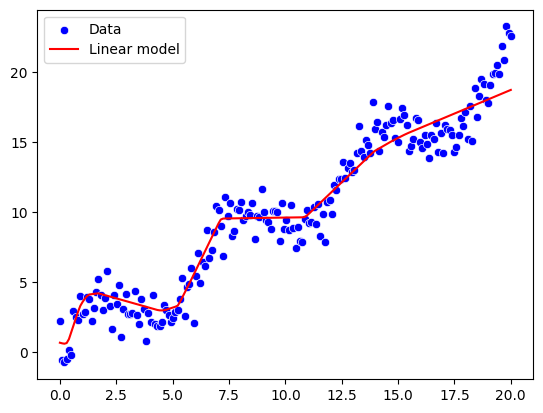

In [ ]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
